In [ ]:
!pip install pandas numpy matplotlib opencv-python-headless pillow scikit-learn tensorflow tqdm joblib


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

!cp /content/drive/My\ Drive/archive.zip /content/
!cp /content/drive/My\ Drive/styles.csv.zip /content/


In [ ]:
!unzip -q /content/archive.zip -d /content/fashion_small/
!unzip -q /content/styles.csv.zip -d /content/


In [ ]:
!ls /content/fashion_small/images | head


10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg


In [ ]:
import pandas as pd

# Updated parameter usage
styles_df = pd.read_csv("/content/styles.csv", on_bad_lines='skip', encoding='latin1')

# Display the first few rows to verify
print(styles_df.head())
print(styles_df.info())


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column         

In [ ]:
# Display column names
print(styles_df.columns)


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [ ]:
# Remove leading and trailing spaces from column names
styles_df.columns = styles_df.columns.str.strip()

# Verify column names again
print(styles_df.columns)


Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [ ]:
print(styles_df['masterCategory'].value_counts())


masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64


In [ ]:
print(styles_df.head())


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [ ]:
import os

image_dir = "/content/fashion_small/images/"  # Update this path as per your unzipped images location
styles_df['image_path'] = styles_df['id'].astype(str) + ".jpg"
styles_df['image_path'] = styles_df['image_path'].apply(lambda x: os.path.join(image_dir, x))


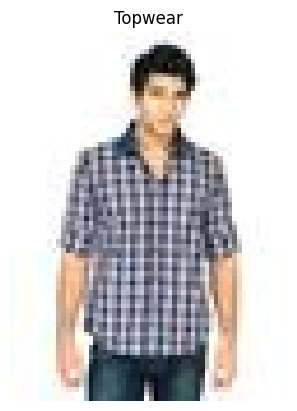

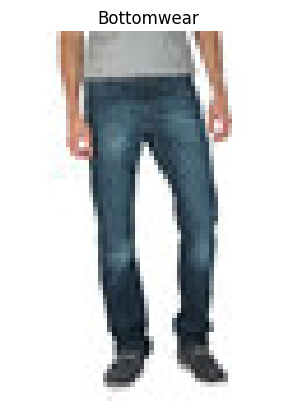

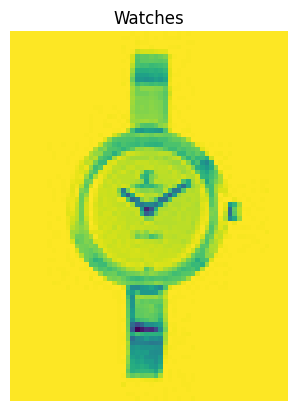

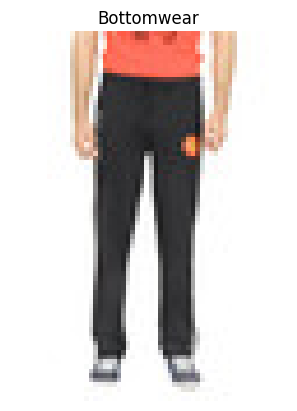

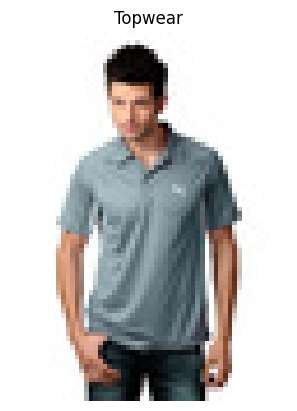

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

for i in range(5):
    img_path = styles_df.loc[i, 'image_path']
    label = styles_df.loc[i, 'subCategory']  # or 'masterCategory'

    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not found: {img_path}")


NameError: name 'styles_df' is not defined

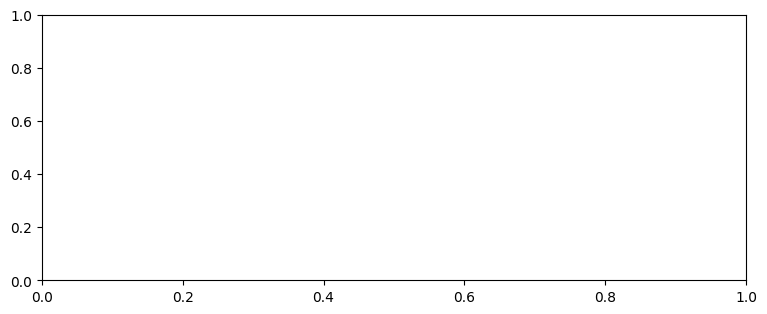

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Adjust the figure size to accommodate the grid of images
plt.figure(figsize=(20, 20))

# Display images from index 20 to 30
for i in range(20, 30):
    plt.subplot(5, 2, i - 20 + 1)  # 5 rows, 2 columns grid layout

    # Get the image path from the 'image_path' column
    img_path = styles_df.loc[i, 'image_path']

    # Read and display the image
    try:
        cloth_img = mpimg.imread(img_path)
        plt.imshow(cloth_img)
        plt.title(styles_df.loc[i, 'subCategory'])  # Display subCategory as the title
        plt.axis('off')
    except FileNotFoundError:
        print(f"Image not found: {img_path}")

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


In [ ]:
import pandas as pd

# Load the dataset (handling bad lines with on_bad_lines='skip')
styles_df = pd.read_csv("/content/styles.csv", nrows=6000, on_bad_lines='skip')

# Create the 'image' column with the format "<id>.jpg"
styles_df['image'] = styles_df['id'].astype(str) + ".jpg"

# Create 'image_path' by combining the image directory path with the image filename
image_dir = "/content/fashion_small/images/"
styles_df['image_path'] = styles_df['image'].apply(lambda x: os.path.join(image_dir, x))

# Display the shape of the dataframe
print(styles_df.shape)

# Display the first 10 rows
styles_df.head(10)


(6000, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/fashion_small/images/15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/fashion_small/images/39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg,/content/fashion_small/images/59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/fashion_small/images/21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg,/content/fashion_small/images/53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg,/content/fashion_small/images/1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg,/content/fashion_small/images/30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg,/content/fashion_small/images/26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg,/content/fashion_small/images/29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg,/content/fashion_small/images/30039.jpg


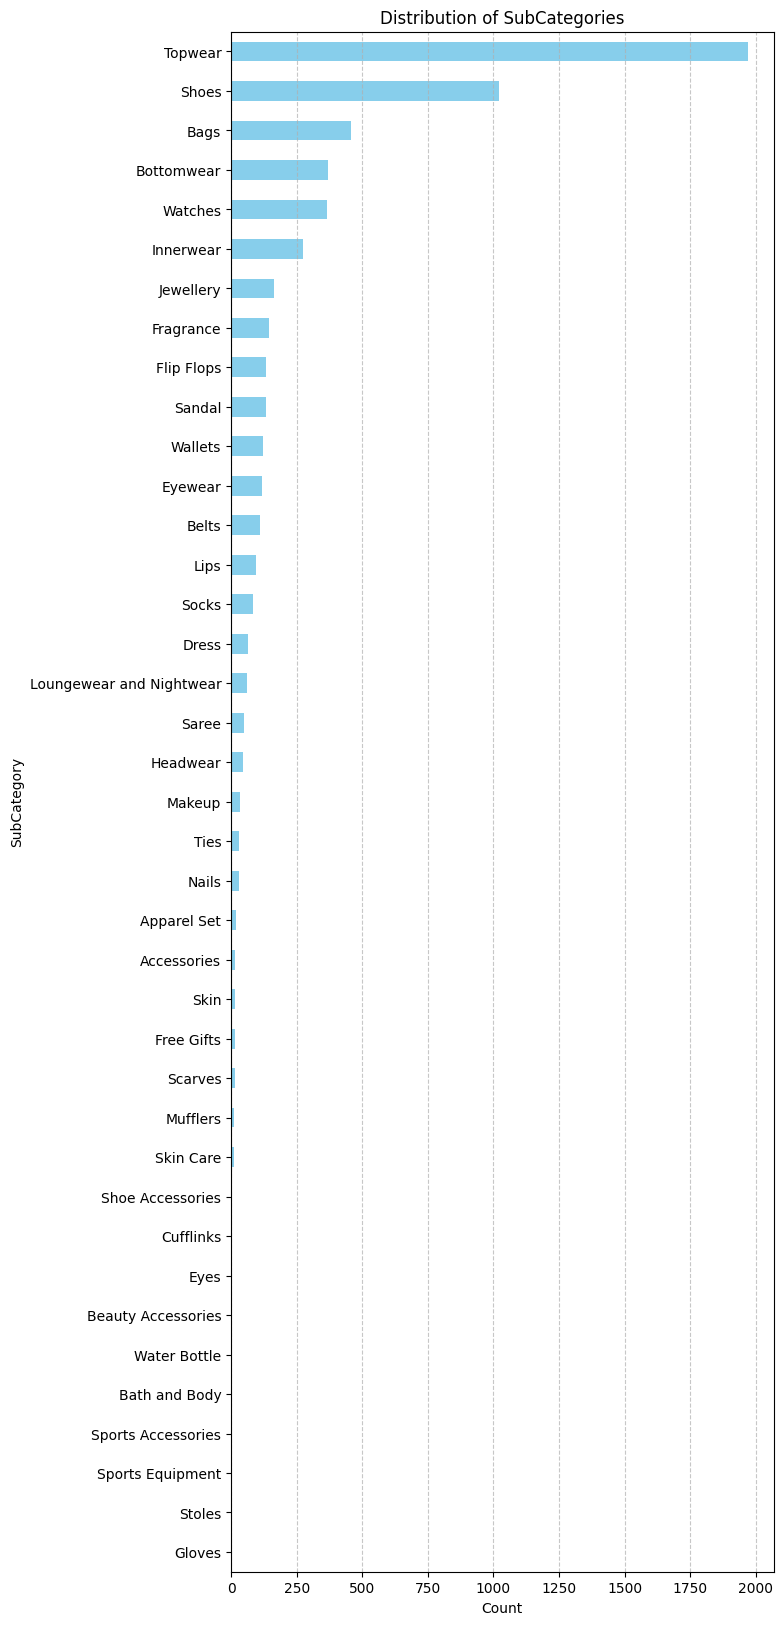

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of 'subCategory' in a horizontal bar chart
plt.figure(figsize=(7, 20))
styles_df['subCategory'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title("Distribution of SubCategories")
plt.xlabel("Count")
plt.ylabel("SubCategory")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print("Original dataset size:", len(styles_df))
styles_df = styles_df[styles_df['image_path'].apply(os.path.exists)].reset_index(drop=True)
print("Filtered dataset size:", len(styles_df))

Original dataset size: 6000
Filtered dataset size: 6000


In [ ]:
# STEP 4: Initialize ResNet50 Model

def create_resnet_model():
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,  # Remove classification layer
        pooling='avg'       # Global average pooling
    )
    return base_model

model = create_resnet_model()
print("ResNet50 model initialized with input shape:", model.input_shape)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
ResNet50 model initialized with input shape: (None, None, None, 3)


In [ ]:
# STEP 5: Feature Extraction Pipeline

def extract_features(img_path, model):
    """Extract features using ResNet50"""
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

    # Check for existing features
if os.path.exists('/content/features_resnet50.npy'):
    print("Loading precomputed features...")
    features_array = np.load('/content/features_resnet50.npy')
else:
    print("Extracting features from images...")
    features_list = []

    for img_path in tqdm(styles_df['image_path'], desc="Processing Images"):
        features = extract_features(img_path, model)
        features_list.append(features)

    features_array = np.array(features_list)
    np.save('/content/features_resnet50.npy', features_array)

print("Feature matrix shape:", features_array.shape)

Extracting features from images...


Processing Images:   0%|          | 0/6000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Processing Images:   0%|          | 1/6000 [00:06<10:40:04,  6.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing Images:   0%|          | 2/6000 [00:06<4:30:37,  2.71s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   0%|          | 4/6000 [00:06<1:46:03,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:   0%|          | 5/6000 [00:06<1:16:54,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing Images:   0%|          | 6/6000 [00:06<56:46,  1.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing Images:   0%|          | 7/6000 [00:07<42:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   0%|          | 8/6000 [00:07<33:12,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing Images:   0%|          | 9/6000 [00:07<26:55,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   0%|          | 11/6000 [00:07<18:49,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   0%|          | 13/6000 [00:07<15:01,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   0%|          | 15/6000 [00:07<13:06,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   0%|          | 17/6000 [00:08<11:27,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   0%|          | 19/6000 [00:08<10:26,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   0%|          | 21/6000 [00:08<10:48,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   0%|          | 23/6000 [00:08<10:19,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   0%|          | 25/6000 [00:08<09:43, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   0%|          | 27/6000 [00:08<09:24, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   0%|          | 29/6000 [00:09<09:55, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   1%|          | 31/6000 [00:09<09:51, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   1%|          | 33/6000 [00:09<09:46, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   1%|          | 35/6000 [00:09<09:10, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   1%|          | 37/6000 [00:09<09:35, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   1%|          | 39/6000 [00:10<09:33, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   1%|          | 41/6000 [00:10<09:31, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   1%|          | 43/6000 [00:10<09:04, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing Images:   1%|          | 45/6000 [00:10<08:34, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing Images:   1%|          | 47/6000 [00:10<08:14, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   1%|          | 49/6000 [00:10<08:48, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   1%|          | 51/6000 [00:11<08:41, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:   1%|          | 53/6000 [00:11<09:32, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   1%|          | 55/6000 [00:11<09:33, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   1%|          | 57/6000 [00:11<09:35, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   1%|          | 59/6000 [00:11<09:38, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   1%|          | 61/6000 [00:12<09:39, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   1%|          | 63/6000 [00:12<09:40, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   1%|          | 65/6000 [00:12<09:08, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   1%|          | 67/6000 [00:12<08:48, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   1%|          | 69/6000 [00:12<08:58, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   1%|          | 71/6000 [00:13<08:46, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   1%|          | 73/6000 [00:13<09:07, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:   1%|▏         | 75/6000 [00:13<09:50, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   1%|▏         | 77/6000 [00:13<10:44,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   1%|▏         | 78/6000 [00:13<10:41,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:   1%|▏         | 79/6000 [00:13<10:50,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   1%|▏         | 80/6000 [00:14<10:55,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   1%|▏         | 81/6000 [00:14<11:26,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   1%|▏         | 82/6000 [00:14<11:15,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:   1%|▏         | 83/6000 [00:14<11:32,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   1%|▏         | 84/6000 [00:14<12:25,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:   1%|▏         | 85/6000 [00:14<12:43,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:   1%|▏         | 86/6000 [00:14<12:44,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   1%|▏         | 87/6000 [00:14<12:50,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   1%|▏         | 88/6000 [00:15<12:49,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:   1%|▏         | 89/6000 [00:15<12:49,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   2%|▏         | 90/6000 [00:15<13:07,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:   2%|▏         | 91/6000 [00:15<12:33,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   2%|▏         | 92/6000 [00:15<12:48,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:   2%|▏         | 93/6000 [00:15<12:47,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:   2%|▏         | 94/6000 [00:15<12:51,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:   2%|▏         | 95/6000 [00:16<12:43,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   2%|▏         | 96/6000 [00:16<12:34,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:   2%|▏         | 97/6000 [00:16<12:19,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   2%|▏         | 98/6000 [00:16<12:27,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:   2%|▏         | 99/6000 [00:16<12:44,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 100/6000 [00:16<11:56,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 101/6000 [00:16<11:31,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   2%|▏         | 102/6000 [00:16<11:16,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 104/6000 [00:17<10:15,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 106/6000 [00:17<09:46, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   2%|▏         | 107/6000 [00:17<09:54,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   2%|▏         | 109/6000 [00:17<09:15, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   2%|▏         | 111/6000 [00:17<08:59, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 113/6000 [00:17<08:31, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   2%|▏         | 115/6000 [00:17<08:12, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   2%|▏         | 117/6000 [00:18<08:11, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   2%|▏         | 119/6000 [00:18<08:27, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 121/6000 [00:18<09:00, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   2%|▏         | 123/6000 [00:18<09:44, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 125/6000 [00:18<09:38, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   2%|▏         | 127/6000 [00:19<09:30, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   2%|▏         | 129/6000 [00:19<09:02, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 131/6000 [00:19<09:08, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   2%|▏         | 133/6000 [00:19<09:49,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   2%|▏         | 135/6000 [00:19<09:18, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 137/6000 [00:20<09:18, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   2%|▏         | 139/6000 [00:20<08:53, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 141/6000 [00:20<09:03, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   2%|▏         | 143/6000 [00:20<09:12, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   2%|▏         | 145/6000 [00:20<09:01, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   2%|▏         | 147/6000 [00:20<09:04, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   2%|▏         | 149/6000 [00:21<09:09, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   3%|▎         | 151/6000 [00:21<08:44, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   3%|▎         | 153/6000 [00:21<08:28, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   3%|▎         | 155/6000 [00:21<08:41, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   3%|▎         | 157/6000 [00:21<09:32, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   3%|▎         | 159/6000 [00:22<09:24, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   3%|▎         | 161/6000 [00:22<08:55, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   3%|▎         | 163/6000 [00:22<08:59, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   3%|▎         | 165/6000 [00:22<09:26, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   3%|▎         | 167/6000 [00:22<09:32, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   3%|▎         | 169/6000 [00:23<09:30, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   3%|▎         | 171/6000 [00:23<09:24, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   3%|▎         | 173/6000 [00:23<09:04, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   3%|▎         | 175/6000 [00:23<09:11, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   3%|▎         | 177/6000 [00:23<09:13, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   3%|▎         | 179/6000 [00:24<09:10, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:   3%|▎         | 181/6000 [00:24<09:16, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   3%|▎         | 183/6000 [00:24<08:52, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   3%|▎         | 185/6000 [00:24<08:57, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   3%|▎         | 187/6000 [00:24<09:10, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   3%|▎         | 189/6000 [00:24<09:18, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   3%|▎         | 191/6000 [00:25<09:43,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   3%|▎         | 193/6000 [00:25<09:42,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   3%|▎         | 195/6000 [00:25<09:07, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   3%|▎         | 197/6000 [00:25<09:09, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:   3%|▎         | 199/6000 [00:25<08:51, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   3%|▎         | 201/6000 [00:26<08:58, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   3%|▎         | 203/6000 [00:26<09:27, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   3%|▎         | 205/6000 [00:26<09:33, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   3%|▎         | 207/6000 [00:26<10:16,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:   3%|▎         | 208/6000 [00:26<10:50,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   3%|▎         | 209/6000 [00:27<11:17,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:   4%|▎         | 210/6000 [00:27<11:40,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   4%|▎         | 211/6000 [00:27<12:00,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:   4%|▎         | 212/6000 [00:27<11:59,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:   4%|▎         | 213/6000 [00:27<11:41,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   4%|▎         | 214/6000 [00:27<12:10,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:   4%|▎         | 215/6000 [00:27<12:19,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:   4%|▎         | 216/6000 [00:27<12:33,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:   4%|▎         | 217/6000 [00:28<12:52,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:   4%|▎         | 218/6000 [00:28<12:33,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   4%|▎         | 219/6000 [00:28<12:27,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   4%|▎         | 220/6000 [00:28<11:52,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   4%|▎         | 221/6000 [00:28<12:16,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   4%|▎         | 222/6000 [00:28<12:02,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   4%|▎         | 223/6000 [00:28<11:36,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   4%|▎         | 224/6000 [00:28<11:56,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:   4%|▍         | 225/6000 [00:29<12:24,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   4%|▍         | 226/6000 [00:29<12:37,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   4%|▍         | 227/6000 [00:29<11:59,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:   4%|▍         | 228/6000 [00:29<12:25,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:   4%|▍         | 229/6000 [00:29<12:53,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:   4%|▍         | 230/6000 [00:29<12:56,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:   4%|▍         | 231/6000 [00:29<13:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:   4%|▍         | 233/6000 [00:30<11:12,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 234/6000 [00:30<11:11,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 236/6000 [00:30<10:25,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   4%|▍         | 237/6000 [00:30<10:25,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 239/6000 [00:30<10:07,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   4%|▍         | 240/6000 [00:30<10:23,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 242/6000 [00:31<10:07,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   4%|▍         | 243/6000 [00:31<10:14,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:   4%|▍         | 244/6000 [00:31<10:22,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 245/6000 [00:31<10:33,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   4%|▍         | 246/6000 [00:31<10:38,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   4%|▍         | 248/6000 [00:31<10:05,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   4%|▍         | 249/6000 [00:31<10:15,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   4%|▍         | 251/6000 [00:31<09:27, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 252/6000 [00:32<09:46,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   4%|▍         | 253/6000 [00:32<10:00,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   4%|▍         | 255/6000 [00:32<09:47,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:   4%|▍         | 256/6000 [00:32<10:05,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 257/6000 [00:32<10:18,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   4%|▍         | 258/6000 [00:32<10:22,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   4%|▍         | 259/6000 [00:32<10:27,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   4%|▍         | 260/6000 [00:32<10:31,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   4%|▍         | 261/6000 [00:33<10:36,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:   4%|▍         | 263/6000 [00:33<09:38,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   4%|▍         | 264/6000 [00:33<10:03,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   4%|▍         | 265/6000 [00:33<10:16,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   4%|▍         | 266/6000 [00:33<10:25,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 267/6000 [00:33<10:33,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   4%|▍         | 268/6000 [00:33<10:43,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   4%|▍         | 269/6000 [00:33<10:45,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   4%|▍         | 270/6000 [00:34<10:55,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   5%|▍         | 271/6000 [00:34<10:50,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:   5%|▍         | 272/6000 [00:34<10:59,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   5%|▍         | 274/6000 [00:34<09:34,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:   5%|▍         | 276/6000 [00:34<09:05, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   5%|▍         | 278/6000 [00:34<09:22, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   5%|▍         | 280/6000 [00:35<09:31, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   5%|▍         | 282/6000 [00:35<09:07, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   5%|▍         | 284/6000 [00:35<09:46,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   5%|▍         | 286/6000 [00:35<09:31, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   5%|▍         | 288/6000 [00:35<09:02, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   5%|▍         | 290/6000 [00:35<09:04, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   5%|▍         | 292/6000 [00:36<08:40, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   5%|▍         | 294/6000 [00:36<09:18, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   5%|▍         | 296/6000 [00:36<09:08, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   5%|▍         | 298/6000 [00:36<09:05, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   5%|▌         | 300/6000 [00:36<09:28, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 302/6000 [00:37<09:44,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 303/6000 [00:37<09:51,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 304/6000 [00:37<10:13,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   5%|▌         | 305/6000 [00:37<10:14,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   5%|▌         | 306/6000 [00:37<10:16,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   5%|▌         | 307/6000 [00:37<10:18,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   5%|▌         | 308/6000 [00:37<10:22,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   5%|▌         | 309/6000 [00:37<10:21,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   5%|▌         | 310/6000 [00:38<10:19,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   5%|▌         | 311/6000 [00:38<10:16,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   5%|▌         | 313/6000 [00:38<09:48,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   5%|▌         | 314/6000 [00:38<10:01,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 316/6000 [00:38<09:41,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:   5%|▌         | 318/6000 [00:38<09:35,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 319/6000 [00:39<09:51,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 320/6000 [00:39<10:04,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   5%|▌         | 321/6000 [00:39<10:14,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   5%|▌         | 322/6000 [00:39<10:16,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   5%|▌         | 323/6000 [00:39<10:36,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 324/6000 [00:39<10:38,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   5%|▌         | 325/6000 [00:39<10:36,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   5%|▌         | 327/6000 [00:39<09:29,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   5%|▌         | 328/6000 [00:39<09:52,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   5%|▌         | 329/6000 [00:40<10:37,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:   6%|▌         | 330/6000 [00:40<11:14,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:   6%|▌         | 331/6000 [00:40<11:10,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:   6%|▌         | 332/6000 [00:40<11:42,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:   6%|▌         | 333/6000 [00:40<12:05,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:   6%|▌         | 334/6000 [00:40<12:29,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   6%|▌         | 335/6000 [00:40<12:48,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   6%|▌         | 336/6000 [00:41<12:48,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:   6%|▌         | 337/6000 [00:41<12:54,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   6%|▌         | 338/6000 [00:41<12:57,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:   6%|▌         | 339/6000 [00:41<12:24,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   6%|▌         | 340/6000 [00:41<12:06,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   6%|▌         | 341/6000 [00:41<11:32,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   6%|▌         | 342/6000 [00:41<11:23,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   6%|▌         | 343/6000 [00:41<11:03,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   6%|▌         | 344/6000 [00:42<11:44,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   6%|▌         | 345/6000 [00:42<11:19,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   6%|▌         | 346/6000 [00:42<10:51,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:   6%|▌         | 347/6000 [00:42<11:05,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   6%|▌         | 348/6000 [00:42<11:51,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:   6%|▌         | 349/6000 [00:42<12:07,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:   6%|▌         | 350/6000 [00:42<12:21,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:   6%|▌         | 351/6000 [00:42<12:42,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   6%|▌         | 352/6000 [00:43<12:47,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:   6%|▌         | 353/6000 [00:43<13:11,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   6%|▌         | 354/6000 [00:43<12:32,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   6%|▌         | 355/6000 [00:43<11:57,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   6%|▌         | 357/6000 [00:43<10:21,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   6%|▌         | 358/6000 [00:43<10:27,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   6%|▌         | 359/6000 [00:43<10:25,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   6%|▌         | 360/6000 [00:43<10:28,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   6%|▌         | 361/6000 [00:44<10:27,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:   6%|▌         | 362/6000 [00:44<10:36,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   6%|▌         | 363/6000 [00:44<10:36,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   6%|▌         | 364/6000 [00:44<10:37,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:   6%|▌         | 366/6000 [00:44<09:59,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   6%|▌         | 367/6000 [00:44<10:13,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   6%|▌         | 369/6000 [00:44<09:08, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   6%|▌         | 371/6000 [00:45<09:01, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:   6%|▌         | 373/6000 [00:45<09:12, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   6%|▋         | 375/6000 [00:45<09:38,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   6%|▋         | 377/6000 [00:45<09:11, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   6%|▋         | 379/6000 [00:45<08:43, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   6%|▋         | 381/6000 [00:46<09:08, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   6%|▋         | 383/6000 [00:46<09:12, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   6%|▋         | 385/6000 [00:46<09:19, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:   6%|▋         | 387/6000 [00:46<09:23,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   6%|▋         | 389/6000 [00:46<09:22,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   7%|▋         | 391/6000 [00:47<09:23,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   7%|▋         | 393/6000 [00:47<09:22,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 394/6000 [00:47<09:32,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 395/6000 [00:47<09:40,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 396/6000 [00:47<09:58,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   7%|▋         | 397/6000 [00:47<10:11,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   7%|▋         | 398/6000 [00:47<10:15,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   7%|▋         | 400/6000 [00:48<09:50,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   7%|▋         | 402/6000 [00:48<09:14, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 403/6000 [00:48<09:29,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 404/6000 [00:48<09:39,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 405/6000 [00:48<09:48,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 406/6000 [00:48<10:01,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   7%|▋         | 407/6000 [00:48<10:20,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   7%|▋         | 408/6000 [00:48<10:29,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   7%|▋         | 409/6000 [00:49<10:12,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   7%|▋         | 410/6000 [00:49<10:22,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 412/6000 [00:49<09:10, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 413/6000 [00:49<09:25,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 414/6000 [00:49<09:38,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   7%|▋         | 416/6000 [00:49<09:16, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   7%|▋         | 417/6000 [00:49<09:27,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 418/6000 [00:49<09:40,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   7%|▋         | 419/6000 [00:50<09:48,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   7%|▋         | 420/6000 [00:50<10:03,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 422/6000 [00:50<09:39,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   7%|▋         | 423/6000 [00:50<09:50,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 424/6000 [00:50<10:00,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 425/6000 [00:50<10:07,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 426/6000 [00:50<10:12,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 427/6000 [00:50<10:31,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 428/6000 [00:51<10:25,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   7%|▋         | 429/6000 [00:51<10:19,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   7%|▋         | 430/6000 [00:51<10:15,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 432/6000 [00:51<09:40,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   7%|▋         | 433/6000 [00:51<09:50,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 434/6000 [00:51<09:56,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   7%|▋         | 436/6000 [00:51<09:05, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 437/6000 [00:51<09:38,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   7%|▋         | 438/6000 [00:52<09:43,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 440/6000 [00:52<09:23,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   7%|▋         | 442/6000 [00:52<09:08, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 443/6000 [00:52<09:22,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   7%|▋         | 444/6000 [00:52<09:39,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   7%|▋         | 446/6000 [00:52<08:52, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   7%|▋         | 448/6000 [00:53<09:28,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:   8%|▊         | 450/6000 [00:53<09:05, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   8%|▊         | 452/6000 [00:53<09:29,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   8%|▊         | 453/6000 [00:53<10:00,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   8%|▊         | 454/6000 [00:53<10:08,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   8%|▊         | 455/6000 [00:53<10:14,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:   8%|▊         | 456/6000 [00:53<10:57,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   8%|▊         | 457/6000 [00:54<11:06,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:   8%|▊         | 458/6000 [00:54<11:19,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:   8%|▊         | 459/6000 [00:54<11:22,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:   8%|▊         | 460/6000 [00:54<11:05,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:   8%|▊         | 461/6000 [00:54<11:36,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:   8%|▊         | 462/6000 [00:54<11:41,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:   8%|▊         | 463/6000 [00:54<12:18,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:   8%|▊         | 464/6000 [00:55<12:20,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:   8%|▊         | 465/6000 [00:55<12:42,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:   8%|▊         | 466/6000 [00:55<12:36,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:   8%|▊         | 467/6000 [00:55<12:00,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:   8%|▊         | 468/6000 [00:55<12:29,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:   8%|▊         | 469/6000 [00:55<12:17,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   8%|▊         | 470/6000 [00:55<12:22,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:   8%|▊         | 471/6000 [00:55<12:26,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:   8%|▊         | 472/6000 [00:56<12:26,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:   8%|▊         | 473/6000 [00:56<12:54,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:   8%|▊         | 474/6000 [00:56<12:44,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:   8%|▊         | 475/6000 [00:56<13:05,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:   8%|▊         | 476/6000 [00:56<13:10,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:   8%|▊         | 477/6000 [00:56<13:10,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   8%|▊         | 479/6000 [00:57<11:21,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:   8%|▊         | 481/6000 [00:57<10:52,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:   8%|▊         | 482/6000 [00:57<10:46,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   8%|▊         | 484/6000 [00:57<10:05,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   8%|▊         | 485/6000 [00:57<10:05,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   8%|▊         | 487/6000 [00:57<09:42,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   8%|▊         | 489/6000 [00:58<09:23,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   8%|▊         | 490/6000 [00:58<09:34,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   8%|▊         | 491/6000 [00:58<09:54,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   8%|▊         | 492/6000 [00:58<10:12,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   8%|▊         | 493/6000 [00:58<10:11,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   8%|▊         | 494/6000 [00:58<10:04,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   8%|▊         | 496/6000 [00:58<08:55, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   8%|▊         | 498/6000 [00:59<09:20,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   8%|▊         | 500/6000 [00:59<09:10, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   8%|▊         | 501/6000 [00:59<09:39,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Images:   8%|▊         | 502/6000 [00:59<09:46,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   8%|▊         | 503/6000 [00:59<09:49,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   8%|▊         | 504/6000 [00:59<09:54,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   8%|▊         | 506/6000 [00:59<09:30,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   8%|▊         | 507/6000 [00:59<09:39,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   8%|▊         | 508/6000 [01:00<09:48,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:   8%|▊         | 509/6000 [01:00<09:56,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:   8%|▊         | 510/6000 [01:00<09:59,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   9%|▊         | 511/6000 [01:00<10:12,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   9%|▊         | 512/6000 [01:00<10:21,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Images:   9%|▊         | 513/6000 [01:00<10:14,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   9%|▊         | 515/6000 [01:00<09:08, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   9%|▊         | 517/6000 [01:01<09:11,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   9%|▊         | 518/6000 [01:01<09:24,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   9%|▊         | 520/6000 [01:01<09:22,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   9%|▊         | 521/6000 [01:01<09:35,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   9%|▊         | 522/6000 [01:01<09:44,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   9%|▊         | 523/6000 [01:01<09:54,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   9%|▉         | 525/6000 [01:01<09:27,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   9%|▉         | 527/6000 [01:02<08:46, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:   9%|▉         | 529/6000 [01:02<09:20,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:   9%|▉         | 530/6000 [01:02<09:30,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   9%|▉         | 532/6000 [01:02<08:52, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   9%|▉         | 534/6000 [01:02<08:54, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:   9%|▉         | 536/6000 [01:02<09:25,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   9%|▉         | 537/6000 [01:03<09:36,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   9%|▉         | 538/6000 [01:03<09:47,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   9%|▉         | 539/6000 [01:03<10:01,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   9%|▉         | 541/6000 [01:03<09:19,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   9%|▉         | 543/6000 [01:03<08:44, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   9%|▉         | 545/6000 [01:03<08:46, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   9%|▉         | 547/6000 [01:04<08:25, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   9%|▉         | 549/6000 [01:04<08:57, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:   9%|▉         | 551/6000 [01:04<09:27,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   9%|▉         | 553/6000 [01:04<09:01, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:   9%|▉         | 555/6000 [01:04<09:21,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:   9%|▉         | 557/6000 [01:05<09:10,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   9%|▉         | 559/6000 [01:05<08:47, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:   9%|▉         | 561/6000 [01:05<09:14,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:   9%|▉         | 562/6000 [01:05<09:22,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:   9%|▉         | 564/6000 [01:05<09:20,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:   9%|▉         | 566/6000 [01:05<08:48, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:   9%|▉         | 568/6000 [01:06<08:56, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:  10%|▉         | 570/6000 [01:06<09:13,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  10%|▉         | 571/6000 [01:06<09:20,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  10%|▉         | 572/6000 [01:06<09:29,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  10%|▉         | 573/6000 [01:06<09:40,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  10%|▉         | 575/6000 [01:06<09:17,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  10%|▉         | 576/6000 [01:07<10:03,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  10%|▉         | 577/6000 [01:07<10:38,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  10%|▉         | 578/6000 [01:07<11:08,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  10%|▉         | 579/6000 [01:07<11:15,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  10%|▉         | 580/6000 [01:07<12:32,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  10%|▉         | 581/6000 [01:07<12:08,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  10%|▉         | 582/6000 [01:07<12:06,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  10%|▉         | 583/6000 [01:08<11:59,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  10%|▉         | 584/6000 [01:08<12:04,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  10%|▉         | 585/6000 [01:08<12:19,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  10%|▉         | 586/6000 [01:08<12:12,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  10%|▉         | 587/6000 [01:08<12:15,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  10%|▉         | 588/6000 [01:08<12:43,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  10%|▉         | 589/6000 [01:08<12:38,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  10%|▉         | 590/6000 [01:09<12:34,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  10%|▉         | 591/6000 [01:09<12:14,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  10%|▉         | 592/6000 [01:09<12:15,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  10%|▉         | 593/6000 [01:09<12:38,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  10%|▉         | 594/6000 [01:09<11:51,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  10%|▉         | 595/6000 [01:09<11:54,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  10%|▉         | 596/6000 [01:09<12:08,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  10%|▉         | 597/6000 [01:09<12:11,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  10%|▉         | 598/6000 [01:10<11:53,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  10%|▉         | 599/6000 [01:10<12:11,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  10%|█         | 600/6000 [01:10<12:19,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  10%|█         | 601/6000 [01:10<12:36,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  10%|█         | 602/6000 [01:10<12:01,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  10%|█         | 603/6000 [01:10<11:29,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  10%|█         | 605/6000 [01:10<09:51,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  10%|█         | 607/6000 [01:11<09:05,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  10%|█         | 608/6000 [01:11<09:22,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:  10%|█         | 609/6000 [01:11<09:29,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  10%|█         | 611/6000 [01:11<09:15,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  10%|█         | 612/6000 [01:11<09:29,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  10%|█         | 614/6000 [01:11<09:36,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:  10%|█         | 615/6000 [01:11<09:39,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  10%|█         | 616/6000 [01:12<09:42,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  10%|█         | 617/6000 [01:12<09:46,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  10%|█         | 618/6000 [01:12<10:01,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  10%|█         | 619/6000 [01:12<10:00,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  10%|█         | 621/6000 [01:12<09:24,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  10%|█         | 622/6000 [01:12<09:32,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  10%|█         | 623/6000 [01:12<09:46,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  10%|█         | 624/6000 [01:12<09:55,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  10%|█         | 625/6000 [01:13<09:53,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  10%|█         | 626/6000 [01:13<09:56,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  10%|█         | 628/6000 [01:13<09:29,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  10%|█         | 629/6000 [01:13<09:37,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  10%|█         | 630/6000 [01:13<09:50,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  11%|█         | 631/6000 [01:13<09:54,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  11%|█         | 632/6000 [01:13<09:56,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  11%|█         | 633/6000 [01:13<09:41,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█         | 635/6000 [01:14<09:13,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█         | 636/6000 [01:14<09:36,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  11%|█         | 638/6000 [01:14<08:57,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  11%|█         | 640/6000 [01:14<08:52, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  11%|█         | 642/6000 [01:14<08:27, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  11%|█         | 644/6000 [01:15<08:38, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█         | 646/6000 [01:15<09:03,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  11%|█         | 648/6000 [01:15<09:03,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  11%|█         | 650/6000 [01:15<08:46, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█         | 652/6000 [01:15<09:13,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  11%|█         | 653/6000 [01:15<09:27,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█         | 655/6000 [01:16<08:50, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:  11%|█         | 657/6000 [01:16<08:29, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  11%|█         | 659/6000 [01:16<08:38, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█         | 661/6000 [01:16<08:48, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█         | 663/6000 [01:16<09:08,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  11%|█         | 665/6000 [01:17<09:06,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  11%|█         | 666/6000 [01:17<09:16,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  11%|█         | 668/6000 [01:17<09:12,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  11%|█         | 669/6000 [01:17<09:24,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:  11%|█         | 671/6000 [01:17<09:09,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  11%|█         | 673/6000 [01:17<09:11,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  11%|█▏        | 675/6000 [01:18<08:38, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  11%|█▏        | 677/6000 [01:18<08:24, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  11%|█▏        | 679/6000 [01:18<08:28, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  11%|█▏        | 681/6000 [01:18<08:55,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  11%|█▏        | 683/6000 [01:18<08:54,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  11%|█▏        | 684/6000 [01:19<09:29,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  11%|█▏        | 685/6000 [01:19<09:36,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  11%|█▏        | 686/6000 [01:19<09:48,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  11%|█▏        | 688/6000 [01:19<09:30,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  12%|█▏        | 690/6000 [01:19<09:22,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  12%|█▏        | 691/6000 [01:19<09:32,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Images:  12%|█▏        | 693/6000 [01:20<09:18,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  12%|█▏        | 694/6000 [01:20<09:25,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  12%|█▏        | 695/6000 [01:20<09:27,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  12%|█▏        | 696/6000 [01:20<09:42,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  12%|█▏        | 697/6000 [01:20<09:55,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  12%|█▏        | 698/6000 [01:20<10:19,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  12%|█▏        | 699/6000 [01:20<11:04,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  12%|█▏        | 700/6000 [01:20<11:11,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  12%|█▏        | 701/6000 [01:21<10:43,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  12%|█▏        | 702/6000 [01:21<11:15,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  12%|█▏        | 703/6000 [01:21<10:42,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  12%|█▏        | 704/6000 [01:21<11:18,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  12%|█▏        | 705/6000 [01:21<11:08,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  12%|█▏        | 706/6000 [01:21<11:31,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  12%|█▏        | 707/6000 [01:21<11:34,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  12%|█▏        | 708/6000 [01:21<12:07,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  12%|█▏        | 709/6000 [01:22<12:25,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  12%|█▏        | 710/6000 [01:22<12:46,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  12%|█▏        | 711/6000 [01:22<12:33,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  12%|█▏        | 712/6000 [01:22<11:43,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  12%|█▏        | 713/6000 [01:22<11:58,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  12%|█▏        | 714/6000 [01:22<14:20,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  12%|█▏        | 715/6000 [01:23<13:29,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  12%|█▏        | 716/6000 [01:23<13:13,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  12%|█▏        | 717/6000 [01:23<13:09,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  12%|█▏        | 718/6000 [01:23<13:08,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  12%|█▏        | 719/6000 [01:23<12:37,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  12%|█▏        | 720/6000 [01:23<12:25,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  12%|█▏        | 721/6000 [01:24<20:49,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  12%|█▏        | 722/6000 [01:24<17:36,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  12%|█▏        | 724/6000 [01:24<13:31,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  12%|█▏        | 726/6000 [01:24<11:32,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  12%|█▏        | 727/6000 [01:24<11:07,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  12%|█▏        | 728/6000 [01:24<10:48,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  12%|█▏        | 730/6000 [01:25<09:30,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  12%|█▏        | 731/6000 [01:25<09:35,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  12%|█▏        | 733/6000 [01:25<09:33,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  12%|█▏        | 734/6000 [01:25<09:39,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  12%|█▏        | 735/6000 [01:25<09:45,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  12%|█▏        | 736/6000 [01:25<09:55,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  12%|█▏        | 738/6000 [01:25<08:53,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  12%|█▏        | 739/6000 [01:26<09:09,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  12%|█▏        | 741/6000 [01:26<08:29, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  12%|█▏        | 743/6000 [01:26<08:30, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  12%|█▏        | 745/6000 [01:26<08:33, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  12%|█▏        | 747/6000 [01:26<08:38, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  12%|█▏        | 749/6000 [01:26<08:19, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  13%|█▎        | 751/6000 [01:27<08:48,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  13%|█▎        | 753/6000 [01:27<08:34, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  13%|█▎        | 755/6000 [01:27<09:06,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  13%|█▎        | 757/6000 [01:27<08:39, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 759/6000 [01:28<08:43, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  13%|█▎        | 761/6000 [01:28<08:55,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  13%|█▎        | 762/6000 [01:28<09:04,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  13%|█▎        | 764/6000 [01:28<08:50,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  13%|█▎        | 765/6000 [01:28<09:05,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 766/6000 [01:28<09:15,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  13%|█▎        | 768/6000 [01:28<08:31, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  13%|█▎        | 770/6000 [01:29<08:14, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  13%|█▎        | 772/6000 [01:29<08:10, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  13%|█▎        | 774/6000 [01:29<08:39, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  13%|█▎        | 776/6000 [01:29<09:03,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  13%|█▎        | 777/6000 [01:29<09:12,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  13%|█▎        | 778/6000 [01:29<09:17,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  13%|█▎        | 780/6000 [01:30<09:09,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  13%|█▎        | 781/6000 [01:30<09:21,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 782/6000 [01:30<09:26,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  13%|█▎        | 784/6000 [01:30<09:28,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  13%|█▎        | 785/6000 [01:30<09:30,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 786/6000 [01:30<09:30,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  13%|█▎        | 788/6000 [01:31<08:54,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  13%|█▎        | 789/6000 [01:31<09:15,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  13%|█▎        | 790/6000 [01:31<09:31,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  13%|█▎        | 792/6000 [01:31<09:19,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  13%|█▎        | 793/6000 [01:31<09:39,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 794/6000 [01:31<09:46,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 796/6000 [01:31<09:02,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  13%|█▎        | 797/6000 [01:32<09:17,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  13%|█▎        | 798/6000 [01:32<09:25,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  13%|█▎        | 799/6000 [01:32<09:38,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  13%|█▎        | 801/6000 [01:32<08:51,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  13%|█▎        | 802/6000 [01:32<09:11,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  13%|█▎        | 803/6000 [01:32<09:22,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  13%|█▎        | 804/6000 [01:32<09:33,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 806/6000 [01:32<08:51,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  13%|█▎        | 807/6000 [01:33<09:04,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  13%|█▎        | 808/6000 [01:33<09:17,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  14%|█▎        | 810/6000 [01:33<08:34, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  14%|█▎        | 812/6000 [01:33<08:39,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  14%|█▎        | 813/6000 [01:33<08:52,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  14%|█▎        | 815/6000 [01:33<08:53,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  14%|█▎        | 817/6000 [01:34<08:57,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  14%|█▎        | 818/6000 [01:34<09:29,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  14%|█▎        | 819/6000 [01:34<10:08,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  14%|█▎        | 820/6000 [01:34<09:59,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  14%|█▎        | 821/6000 [01:34<10:24,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  14%|█▎        | 822/6000 [01:34<10:41,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  14%|█▎        | 823/6000 [01:34<11:08,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  14%|█▎        | 824/6000 [01:35<10:58,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  14%|█▍        | 825/6000 [01:35<11:06,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  14%|█▍        | 826/6000 [01:35<11:29,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  14%|█▍        | 827/6000 [01:35<11:37,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  14%|█▍        | 828/6000 [01:35<11:33,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  14%|█▍        | 829/6000 [01:35<11:49,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  14%|█▍        | 830/6000 [01:35<11:44,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  14%|█▍        | 831/6000 [01:35<12:16,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  14%|█▍        | 832/6000 [01:36<11:24,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  14%|█▍        | 833/6000 [01:36<11:36,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  14%|█▍        | 834/6000 [01:36<11:08,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  14%|█▍        | 835/6000 [01:36<11:06,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  14%|█▍        | 836/6000 [01:36<11:09,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  14%|█▍        | 837/6000 [01:36<11:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  14%|█▍        | 838/6000 [01:36<11:35,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  14%|█▍        | 839/6000 [01:37<11:30,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  14%|█▍        | 840/6000 [01:37<11:42,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  14%|█▍        | 841/6000 [01:37<11:46,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  14%|█▍        | 842/6000 [01:37<12:09,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  14%|█▍        | 843/6000 [01:37<12:12,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  14%|█▍        | 844/6000 [01:37<11:19,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  14%|█▍        | 845/6000 [01:37<10:53,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  14%|█▍        | 846/6000 [01:37<10:33,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  14%|█▍        | 848/6000 [01:38<09:32,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  14%|█▍        | 850/6000 [01:38<08:54,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  14%|█▍        | 851/6000 [01:38<09:06,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  14%|█▍        | 852/6000 [01:38<09:17,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  14%|█▍        | 854/6000 [01:38<08:44,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  14%|█▍        | 856/6000 [01:38<08:42,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  14%|█▍        | 858/6000 [01:39<08:46,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  14%|█▍        | 860/6000 [01:39<08:19, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  14%|█▍        | 862/6000 [01:39<08:28, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  14%|█▍        | 864/6000 [01:39<08:27, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  14%|█▍        | 866/6000 [01:39<08:11, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  14%|█▍        | 868/6000 [01:40<08:40,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  14%|█▍        | 869/6000 [01:40<09:00,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▍        | 871/6000 [01:40<08:28, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▍        | 873/6000 [01:40<08:49,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  15%|█▍        | 874/6000 [01:40<09:00,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  15%|█▍        | 876/6000 [01:40<08:51,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  15%|█▍        | 877/6000 [01:41<08:56,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▍        | 879/6000 [01:41<08:25, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  15%|█▍        | 881/6000 [01:41<08:53,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  15%|█▍        | 883/6000 [01:41<08:50,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▍        | 884/6000 [01:41<08:59,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  15%|█▍        | 886/6000 [01:41<08:22, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  15%|█▍        | 888/6000 [01:42<08:47,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  15%|█▍        | 889/6000 [01:42<09:12,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  15%|█▍        | 890/6000 [01:42<09:23,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▍        | 892/6000 [01:42<09:12,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▍        | 894/6000 [01:42<09:02,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▍        | 896/6000 [01:43<09:00,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▍        | 897/6000 [01:43<09:28,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▍        | 899/6000 [01:43<08:44,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  15%|█▌        | 901/6000 [01:43<08:55,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  15%|█▌        | 902/6000 [01:43<09:16,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  15%|█▌        | 904/6000 [01:43<08:39,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▌        | 905/6000 [01:44<08:58,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▌        | 906/6000 [01:44<09:08,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  15%|█▌        | 908/6000 [01:44<08:36,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▌        | 909/6000 [01:44<08:58,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▌        | 910/6000 [01:44<09:06,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▌        | 911/6000 [01:44<09:16,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  15%|█▌        | 913/6000 [01:44<09:04,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  15%|█▌        | 914/6000 [01:44<09:29,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  15%|█▌        | 915/6000 [01:45<09:35,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  15%|█▌        | 916/6000 [01:45<09:23,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  15%|█▌        | 917/6000 [01:45<09:31,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  15%|█▌        | 918/6000 [01:45<09:31,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  15%|█▌        | 919/6000 [01:45<09:47,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▌        | 921/6000 [01:45<08:47,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▌        | 922/6000 [01:45<09:05,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  15%|█▌        | 924/6000 [01:46<08:42,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  15%|█▌        | 925/6000 [01:46<08:57,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  15%|█▌        | 926/6000 [01:46<09:21,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  15%|█▌        | 928/6000 [01:46<09:07,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  16%|█▌        | 930/6000 [01:46<09:00,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  16%|█▌        | 931/6000 [01:46<09:04,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  16%|█▌        | 932/6000 [01:46<08:59,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  16%|█▌        | 933/6000 [01:47<09:10,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  16%|█▌        | 934/6000 [01:47<09:14,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  16%|█▌        | 935/6000 [01:47<09:16,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  16%|█▌        | 937/6000 [01:47<08:31,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  16%|█▌        | 938/6000 [01:47<08:55,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  16%|█▌        | 939/6000 [01:47<09:05,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  16%|█▌        | 940/6000 [01:47<09:41,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  16%|█▌        | 941/6000 [01:47<10:15,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  16%|█▌        | 942/6000 [01:48<10:24,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  16%|█▌        | 943/6000 [01:48<10:48,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  16%|█▌        | 944/6000 [01:48<11:24,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  16%|█▌        | 945/6000 [01:48<11:13,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  16%|█▌        | 946/6000 [01:48<11:32,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  16%|█▌        | 947/6000 [01:48<10:55,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  16%|█▌        | 948/6000 [01:48<11:10,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  16%|█▌        | 949/6000 [01:49<11:13,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  16%|█▌        | 950/6000 [01:49<11:39,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  16%|█▌        | 951/6000 [01:49<11:05,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  16%|█▌        | 952/6000 [01:49<11:54,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  16%|█▌        | 953/6000 [01:49<12:16,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  16%|█▌        | 954/6000 [01:49<11:54,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  16%|█▌        | 955/6000 [01:49<11:29,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  16%|█▌        | 956/6000 [01:50<11:21,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  16%|█▌        | 957/6000 [01:50<11:15,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  16%|█▌        | 958/6000 [01:50<10:43,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  16%|█▌        | 959/6000 [01:50<10:59,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  16%|█▌        | 960/6000 [01:50<11:21,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  16%|█▌        | 961/6000 [01:50<11:50,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  16%|█▌        | 962/6000 [01:50<11:25,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  16%|█▌        | 963/6000 [01:50<11:30,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  16%|█▌        | 964/6000 [01:51<11:33,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  16%|█▌        | 965/6000 [01:51<11:36,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  16%|█▌        | 966/6000 [01:51<13:37,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  16%|█▌        | 967/6000 [01:51<12:39,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  16%|█▌        | 969/6000 [01:51<10:11,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  16%|█▌        | 970/6000 [01:51<10:03,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  16%|█▌        | 971/6000 [01:51<09:47,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  16%|█▌        | 972/6000 [01:52<09:40,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  16%|█▌        | 974/6000 [01:52<08:52,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  16%|█▋        | 976/6000 [01:52<08:16, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  16%|█▋        | 977/6000 [01:52<08:36,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  16%|█▋        | 978/6000 [01:52<08:46,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  16%|█▋        | 980/6000 [01:52<08:20, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  16%|█▋        | 982/6000 [01:53<08:32,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  16%|█▋        | 984/6000 [01:53<08:28,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  16%|█▋        | 986/6000 [01:53<08:38,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  16%|█▋        | 987/6000 [01:53<08:49,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  16%|█▋        | 989/6000 [01:53<08:21,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  17%|█▋        | 991/6000 [01:54<08:28,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 993/6000 [01:54<08:06, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  17%|█▋        | 995/6000 [01:54<08:25,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  17%|█▋        | 996/6000 [01:54<08:34,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  17%|█▋        | 998/6000 [01:54<08:53,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  17%|█▋        | 999/6000 [01:54<09:02,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  17%|█▋        | 1000/6000 [01:54<09:14,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  17%|█▋        | 1002/6000 [01:55<08:38,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  17%|█▋        | 1003/6000 [01:55<08:52,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  17%|█▋        | 1004/6000 [01:55<09:00,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 1006/6000 [01:55<08:19, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  17%|█▋        | 1008/6000 [01:55<08:44,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  17%|█▋        | 1009/6000 [01:55<08:56,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  17%|█▋        | 1010/6000 [01:56<09:04,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  17%|█▋        | 1011/6000 [01:56<09:10,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  17%|█▋        | 1013/6000 [01:56<08:54,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 1015/6000 [01:56<08:19,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  17%|█▋        | 1016/6000 [01:56<08:37,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  17%|█▋        | 1017/6000 [01:56<08:48,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  17%|█▋        | 1018/6000 [01:56<09:03,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  17%|█▋        | 1020/6000 [01:57<08:46,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  17%|█▋        | 1022/6000 [01:57<08:22,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 1023/6000 [01:57<08:38,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  17%|█▋        | 1024/6000 [01:57<08:50,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  17%|█▋        | 1026/6000 [01:57<08:37,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  17%|█▋        | 1027/6000 [01:57<08:46,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  17%|█▋        | 1028/6000 [01:57<09:04,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  17%|█▋        | 1030/6000 [01:58<08:56,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  17%|█▋        | 1032/6000 [01:58<08:20,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  17%|█▋        | 1034/6000 [01:58<08:34,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 1036/6000 [01:58<08:15, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  17%|█▋        | 1037/6000 [01:58<08:34,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  17%|█▋        | 1039/6000 [01:59<08:09, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  17%|█▋        | 1040/6000 [01:59<08:29,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  17%|█▋        | 1041/6000 [01:59<08:40,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 1042/6000 [01:59<09:02,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 1044/6000 [01:59<08:17,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  17%|█▋        | 1046/6000 [01:59<08:34,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  17%|█▋        | 1047/6000 [01:59<08:47,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  17%|█▋        | 1048/6000 [01:59<08:58,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  17%|█▋        | 1049/6000 [02:00<09:03,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1050/6000 [02:00<09:19,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  18%|█▊        | 1051/6000 [02:00<09:37,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1052/6000 [02:00<09:42,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  18%|█▊        | 1054/6000 [02:00<08:50,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1056/6000 [02:00<08:46,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  18%|█▊        | 1057/6000 [02:00<08:49,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  18%|█▊        | 1058/6000 [02:01<09:00,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  18%|█▊        | 1059/6000 [02:01<08:50,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  18%|█▊        | 1060/6000 [02:01<08:43,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  18%|█▊        | 1061/6000 [02:01<09:02,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  18%|█▊        | 1062/6000 [02:01<11:41,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  18%|█▊        | 1063/6000 [02:01<11:23,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  18%|█▊        | 1064/6000 [02:01<11:13,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  18%|█▊        | 1065/6000 [02:02<11:32,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  18%|█▊        | 1066/6000 [02:02<11:33,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  18%|█▊        | 1067/6000 [02:02<10:53,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  18%|█▊        | 1068/6000 [02:02<11:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  18%|█▊        | 1069/6000 [02:02<11:40,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  18%|█▊        | 1070/6000 [02:02<11:44,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  18%|█▊        | 1071/6000 [02:02<11:38,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  18%|█▊        | 1072/6000 [02:03<11:30,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  18%|█▊        | 1073/6000 [02:03<11:31,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  18%|█▊        | 1074/6000 [02:03<11:58,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  18%|█▊        | 1075/6000 [02:03<11:51,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  18%|█▊        | 1076/6000 [02:03<11:30,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  18%|█▊        | 1077/6000 [02:03<11:27,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  18%|█▊        | 1078/6000 [02:03<11:29,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  18%|█▊        | 1079/6000 [02:04<11:45,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  18%|█▊        | 1080/6000 [02:04<11:46,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  18%|█▊        | 1081/6000 [02:04<12:06,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  18%|█▊        | 1082/6000 [02:04<12:21,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  18%|█▊        | 1083/6000 [02:04<12:09,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  18%|█▊        | 1084/6000 [02:04<12:17,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  18%|█▊        | 1085/6000 [02:05<14:18,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  18%|█▊        | 1086/6000 [02:05<13:30,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  18%|█▊        | 1087/6000 [02:05<12:38,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  18%|█▊        | 1088/6000 [02:05<11:41,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1089/6000 [02:05<10:59,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1090/6000 [02:05<10:48,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  18%|█▊        | 1091/6000 [02:05<10:23,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1092/6000 [02:05<10:07,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  18%|█▊        | 1094/6000 [02:06<09:34,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  18%|█▊        | 1095/6000 [02:06<09:39,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  18%|█▊        | 1096/6000 [02:06<09:53,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1097/6000 [02:06<09:47,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1099/6000 [02:06<09:17,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  18%|█▊        | 1101/6000 [02:06<08:35,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  18%|█▊        | 1102/6000 [02:06<08:50,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  18%|█▊        | 1103/6000 [02:07<09:04,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  18%|█▊        | 1105/6000 [02:07<08:44,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  18%|█▊        | 1106/6000 [02:07<08:57,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  18%|█▊        | 1107/6000 [02:07<09:02,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  18%|█▊        | 1109/6000 [02:07<08:53,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▊        | 1111/6000 [02:07<08:40,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▊        | 1112/6000 [02:08<08:51,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▊        | 1113/6000 [02:08<08:57,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  19%|█▊        | 1115/6000 [02:08<08:50,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  19%|█▊        | 1116/6000 [02:08<09:03,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  19%|█▊        | 1118/6000 [02:08<09:11,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  19%|█▊        | 1120/6000 [02:08<08:41,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▊        | 1121/6000 [02:09<08:58,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  19%|█▊        | 1122/6000 [02:09<09:12,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  19%|█▊        | 1124/6000 [02:09<09:05,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▉        | 1125/6000 [02:09<09:06,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▉        | 1127/6000 [02:09<08:40,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1129/6000 [02:09<08:11,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▉        | 1130/6000 [02:10<08:26,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1131/6000 [02:10<08:34,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1133/6000 [02:10<08:29,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  19%|█▉        | 1134/6000 [02:10<08:51,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▉        | 1136/6000 [02:10<08:13,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  19%|█▉        | 1138/6000 [02:10<08:00, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  19%|█▉        | 1139/6000 [02:10<08:18,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  19%|█▉        | 1141/6000 [02:11<08:23,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1143/6000 [02:11<08:09,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  19%|█▉        | 1144/6000 [02:11<08:35,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▉        | 1145/6000 [02:11<08:42,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▉        | 1146/6000 [02:11<08:49,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1148/6000 [02:11<08:10,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  19%|█▉        | 1149/6000 [02:11<08:32,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▉        | 1151/6000 [02:12<08:18,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  19%|█▉        | 1153/6000 [02:12<08:31,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1154/6000 [02:12<09:00,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▉        | 1155/6000 [02:12<09:11,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  19%|█▉        | 1157/6000 [02:12<08:49,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1159/6000 [02:13<08:16,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▉        | 1160/6000 [02:13<08:29,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  19%|█▉        | 1162/6000 [02:13<08:23,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1163/6000 [02:13<08:33,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▉        | 1164/6000 [02:13<08:47,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1166/6000 [02:13<08:39,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  19%|█▉        | 1168/6000 [02:14<08:31,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  19%|█▉        | 1169/6000 [02:14<08:38,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  20%|█▉        | 1170/6000 [02:14<08:43,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  20%|█▉        | 1171/6000 [02:14<08:57,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  20%|█▉        | 1173/6000 [02:14<08:47,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  20%|█▉        | 1174/6000 [02:14<08:53,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  20%|█▉        | 1176/6000 [02:14<08:33,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  20%|█▉        | 1177/6000 [02:15<08:52,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  20%|█▉        | 1178/6000 [02:15<09:16,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  20%|█▉        | 1179/6000 [02:15<09:56,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  20%|█▉        | 1180/6000 [02:15<10:22,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  20%|█▉        | 1181/6000 [02:15<10:12,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  20%|█▉        | 1182/6000 [02:15<10:36,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  20%|█▉        | 1183/6000 [02:15<10:42,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  20%|█▉        | 1184/6000 [02:15<10:40,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  20%|█▉        | 1185/6000 [02:16<10:20,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  20%|█▉        | 1186/6000 [02:16<10:28,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  20%|█▉        | 1187/6000 [02:16<10:34,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  20%|█▉        | 1188/6000 [02:16<10:15,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  20%|█▉        | 1189/6000 [02:16<10:57,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  20%|█▉        | 1190/6000 [02:16<11:13,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  20%|█▉        | 1191/6000 [02:16<10:47,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  20%|█▉        | 1192/6000 [02:17<10:57,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  20%|█▉        | 1193/6000 [02:17<10:23,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  20%|█▉        | 1194/6000 [02:17<10:25,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  20%|█▉        | 1195/6000 [02:17<11:06,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  20%|█▉        | 1196/6000 [02:17<11:04,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  20%|█▉        | 1197/6000 [02:17<11:14,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  20%|█▉        | 1198/6000 [02:17<11:45,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  20%|█▉        | 1199/6000 [02:18<11:40,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  20%|██        | 1200/6000 [02:18<11:45,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  20%|██        | 1201/6000 [02:18<11:52,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  20%|██        | 1202/6000 [02:18<11:11,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  20%|██        | 1203/6000 [02:18<11:33,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  20%|██        | 1204/6000 [02:18<11:29,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  20%|██        | 1205/6000 [02:18<11:51,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  20%|██        | 1206/6000 [02:19<11:51,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  20%|██        | 1207/6000 [02:19<11:08,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  20%|██        | 1208/6000 [02:19<10:40,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  20%|██        | 1209/6000 [02:19<10:23,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  20%|██        | 1211/6000 [02:19<09:23,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  20%|██        | 1212/6000 [02:19<09:29,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  20%|██        | 1213/6000 [02:19<09:35,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  20%|██        | 1214/6000 [02:20<10:04,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  20%|██        | 1216/6000 [02:20<09:30,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  20%|██        | 1217/6000 [02:20<09:31,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  20%|██        | 1218/6000 [02:20<09:34,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  20%|██        | 1220/6000 [02:20<09:07,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  20%|██        | 1221/6000 [02:20<09:13,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  20%|██        | 1223/6000 [02:21<09:04,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  20%|██        | 1224/6000 [02:21<09:05,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  20%|██        | 1225/6000 [02:21<09:12,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  20%|██        | 1227/6000 [02:21<08:25,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  20%|██        | 1228/6000 [02:21<08:38,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  20%|██        | 1229/6000 [02:21<08:46,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  20%|██        | 1230/6000 [02:21<08:58,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  21%|██        | 1232/6000 [02:22<08:30,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  21%|██        | 1234/6000 [02:22<08:20,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1236/6000 [02:22<07:51, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  21%|██        | 1237/6000 [02:22<08:16,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  21%|██        | 1239/6000 [02:22<08:15,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  21%|██        | 1240/6000 [02:22<08:22,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  21%|██        | 1242/6000 [02:23<08:02,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  21%|██        | 1243/6000 [02:23<08:27,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  21%|██        | 1244/6000 [02:23<08:33,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  21%|██        | 1245/6000 [02:23<08:36,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  21%|██        | 1246/6000 [02:23<08:42,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  21%|██        | 1248/6000 [02:23<08:18,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1249/6000 [02:23<08:31,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  21%|██        | 1250/6000 [02:23<08:42,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1251/6000 [02:24<08:50,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1252/6000 [02:24<08:40,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1254/6000 [02:24<08:01,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1255/6000 [02:24<08:22,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  21%|██        | 1256/6000 [02:24<08:36,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  21%|██        | 1257/6000 [02:24<08:43,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1259/6000 [02:24<08:21,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  21%|██        | 1260/6000 [02:24<08:32,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1261/6000 [02:25<08:46,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1262/6000 [02:25<08:55,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  21%|██        | 1264/6000 [02:25<08:38,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1265/6000 [02:25<08:42,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  21%|██        | 1266/6000 [02:25<08:49,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  21%|██        | 1268/6000 [02:25<08:35,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  21%|██        | 1270/6000 [02:26<07:51, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  21%|██        | 1271/6000 [02:26<07:59,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  21%|██        | 1272/6000 [02:26<08:28,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██        | 1273/6000 [02:26<08:48,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  21%|██        | 1274/6000 [02:26<08:55,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██▏       | 1275/6000 [02:26<08:56,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  21%|██▏       | 1277/6000 [02:26<08:03,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  21%|██▏       | 1279/6000 [02:27<07:48, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  21%|██▏       | 1280/6000 [02:27<08:08,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  21%|██▏       | 1282/6000 [02:27<08:10,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  21%|██▏       | 1284/6000 [02:27<08:06,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  21%|██▏       | 1285/6000 [02:27<08:22,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  21%|██▏       | 1286/6000 [02:27<08:30,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  21%|██▏       | 1287/6000 [02:27<08:57,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  21%|██▏       | 1289/6000 [02:28<08:33,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  22%|██▏       | 1290/6000 [02:28<08:43,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  22%|██▏       | 1292/6000 [02:28<08:05,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1293/6000 [02:28<08:25,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1295/6000 [02:28<08:23,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1297/6000 [02:28<08:23,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  22%|██▏       | 1299/6000 [02:29<08:30,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  22%|██▏       | 1300/6000 [02:29<08:52,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  22%|██▏       | 1301/6000 [02:29<09:12,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  22%|██▏       | 1302/6000 [02:29<09:34,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  22%|██▏       | 1303/6000 [02:29<09:52,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  22%|██▏       | 1304/6000 [02:29<10:17,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  22%|██▏       | 1305/6000 [02:30<10:22,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  22%|██▏       | 1306/6000 [02:30<10:36,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  22%|██▏       | 1307/6000 [02:30<09:57,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  22%|██▏       | 1308/6000 [02:30<10:49,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  22%|██▏       | 1309/6000 [02:30<11:10,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  22%|██▏       | 1310/6000 [02:30<11:24,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  22%|██▏       | 1311/6000 [02:30<11:18,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  22%|██▏       | 1312/6000 [02:30<10:43,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  22%|██▏       | 1313/6000 [02:31<10:35,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  22%|██▏       | 1314/6000 [02:31<11:00,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  22%|██▏       | 1315/6000 [02:31<11:13,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  22%|██▏       | 1316/6000 [02:31<11:17,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  22%|██▏       | 1317/6000 [02:31<11:04,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  22%|██▏       | 1318/6000 [02:31<11:01,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  22%|██▏       | 1319/6000 [02:31<10:49,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  22%|██▏       | 1320/6000 [02:32<11:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  22%|██▏       | 1321/6000 [02:32<11:33,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  22%|██▏       | 1322/6000 [02:32<11:30,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  22%|██▏       | 1323/6000 [02:32<11:51,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  22%|██▏       | 1324/6000 [02:32<11:41,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  22%|██▏       | 1325/6000 [02:32<11:39,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  22%|██▏       | 1326/6000 [02:33<11:41,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1327/6000 [02:33<10:44,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1328/6000 [02:33<10:21,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1329/6000 [02:33<09:50,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  22%|██▏       | 1330/6000 [02:33<09:40,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1331/6000 [02:33<09:43,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  22%|██▏       | 1332/6000 [02:33<09:26,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  22%|██▏       | 1333/6000 [02:33<09:28,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  22%|██▏       | 1334/6000 [02:33<09:21,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1335/6000 [02:34<09:19,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  22%|██▏       | 1336/6000 [02:34<09:17,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  22%|██▏       | 1337/6000 [02:34<09:14,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  22%|██▏       | 1338/6000 [02:34<09:06,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  22%|██▏       | 1339/6000 [02:34<08:59,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  22%|██▏       | 1340/6000 [02:34<08:37,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  22%|██▏       | 1341/6000 [02:34<08:45,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  22%|██▏       | 1343/6000 [02:34<07:48,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  22%|██▏       | 1344/6000 [02:35<08:09,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  22%|██▏       | 1345/6000 [02:35<08:22,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1346/6000 [02:35<08:35,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  22%|██▏       | 1348/6000 [02:35<07:51,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  22%|██▎       | 1350/6000 [02:35<07:45,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  23%|██▎       | 1351/6000 [02:35<08:07,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1353/6000 [02:35<07:33, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1355/6000 [02:36<07:16, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1357/6000 [02:36<07:29, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  23%|██▎       | 1359/6000 [02:36<07:39, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1361/6000 [02:36<07:55,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  23%|██▎       | 1363/6000 [02:36<07:35, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1365/6000 [02:37<08:01,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1366/6000 [02:37<08:14,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  23%|██▎       | 1367/6000 [02:37<08:25,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  23%|██▎       | 1369/6000 [02:37<07:50,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  23%|██▎       | 1370/6000 [02:37<08:03,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1371/6000 [02:37<08:13,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1373/6000 [02:38<08:09,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1375/6000 [02:38<08:03,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1376/6000 [02:38<08:12,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Images:  23%|██▎       | 1378/6000 [02:38<07:35, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1380/6000 [02:38<07:19, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  23%|██▎       | 1382/6000 [02:38<07:45,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1383/6000 [02:39<07:57,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  23%|██▎       | 1384/6000 [02:39<08:08,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  23%|██▎       | 1386/6000 [02:39<07:42,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1388/6000 [02:39<07:50,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  23%|██▎       | 1389/6000 [02:39<08:01,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  23%|██▎       | 1390/6000 [02:39<08:16,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1391/6000 [02:39<08:33,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1392/6000 [02:40<08:37,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  23%|██▎       | 1393/6000 [02:40<08:45,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  23%|██▎       | 1395/6000 [02:40<07:57,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  23%|██▎       | 1397/6000 [02:40<07:37, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  23%|██▎       | 1398/6000 [02:40<08:02,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  23%|██▎       | 1400/6000 [02:40<08:04,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  23%|██▎       | 1401/6000 [02:40<08:17,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  23%|██▎       | 1403/6000 [02:41<07:41,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  23%|██▎       | 1404/6000 [02:41<08:03,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  23%|██▎       | 1405/6000 [02:41<08:16,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  23%|██▎       | 1406/6000 [02:41<08:21,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  23%|██▎       | 1407/6000 [02:41<08:27,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  23%|██▎       | 1409/6000 [02:41<07:49,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  24%|██▎       | 1410/6000 [02:41<08:21,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  24%|██▎       | 1412/6000 [02:42<07:43,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  24%|██▎       | 1413/6000 [02:42<08:03,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  24%|██▎       | 1414/6000 [02:42<08:15,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  24%|██▎       | 1416/6000 [02:42<07:37, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  24%|██▎       | 1418/6000 [02:42<07:32, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  24%|██▎       | 1419/6000 [02:42<07:50,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  24%|██▎       | 1420/6000 [02:42<08:01,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  24%|██▎       | 1421/6000 [02:43<07:58,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  24%|██▎       | 1422/6000 [02:43<08:10,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  24%|██▎       | 1423/6000 [02:43<08:59,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  24%|██▎       | 1424/6000 [02:43<09:35,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  24%|██▍       | 1425/6000 [02:43<09:53,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  24%|██▍       | 1426/6000 [02:43<10:19,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  24%|██▍       | 1427/6000 [02:43<10:26,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  24%|██▍       | 1428/6000 [02:44<10:18,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  24%|██▍       | 1429/6000 [02:44<10:58,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  24%|██▍       | 1430/6000 [02:44<11:03,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  24%|██▍       | 1431/6000 [02:44<10:47,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  24%|██▍       | 1432/6000 [02:44<11:14,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  24%|██▍       | 1433/6000 [02:44<11:02,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  24%|██▍       | 1434/6000 [02:44<11:13,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  24%|██▍       | 1435/6000 [02:45<11:26,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  24%|██▍       | 1436/6000 [02:45<11:35,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  24%|██▍       | 1437/6000 [02:45<11:12,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  24%|██▍       | 1438/6000 [02:45<10:51,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  24%|██▍       | 1439/6000 [02:45<10:36,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  24%|██▍       | 1440/6000 [02:45<10:46,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  24%|██▍       | 1441/6000 [02:45<10:54,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  24%|██▍       | 1442/6000 [02:46<10:41,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  24%|██▍       | 1443/6000 [02:46<10:20,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  24%|██▍       | 1444/6000 [02:46<10:31,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  24%|██▍       | 1445/6000 [02:46<10:46,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  24%|██▍       | 1446/6000 [02:46<10:21,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  24%|██▍       | 1447/6000 [02:46<10:32,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  24%|██▍       | 1448/6000 [02:46<10:54,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  24%|██▍       | 1449/6000 [02:47<10:53,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  24%|██▍       | 1450/6000 [02:47<10:45,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  24%|██▍       | 1451/6000 [02:47<10:08,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  24%|██▍       | 1452/6000 [02:47<09:42,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  24%|██▍       | 1453/6000 [02:47<09:32,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  24%|██▍       | 1454/6000 [02:47<09:25,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  24%|██▍       | 1455/6000 [02:47<09:19,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  24%|██▍       | 1456/6000 [02:47<09:10,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  24%|██▍       | 1458/6000 [02:48<08:25,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  24%|██▍       | 1459/6000 [02:48<08:30,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  24%|██▍       | 1461/6000 [02:48<08:12,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  24%|██▍       | 1463/6000 [02:48<07:58,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  24%|██▍       | 1464/6000 [02:48<08:07,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  24%|██▍       | 1465/6000 [02:48<08:18,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  24%|██▍       | 1467/6000 [02:49<08:09,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  24%|██▍       | 1468/6000 [02:49<08:02,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  24%|██▍       | 1469/6000 [02:49<08:04,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▍       | 1471/6000 [02:49<08:01,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▍       | 1472/6000 [02:49<08:10,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▍       | 1473/6000 [02:49<08:21,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▍       | 1474/6000 [02:49<08:22,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  25%|██▍       | 1476/6000 [02:50<07:57,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  25%|██▍       | 1477/6000 [02:50<08:16,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  25%|██▍       | 1478/6000 [02:50<08:25,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  25%|██▍       | 1479/6000 [02:50<09:14,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  25%|██▍       | 1481/6000 [02:50<08:18,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  25%|██▍       | 1483/6000 [02:50<07:47,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  25%|██▍       | 1485/6000 [02:50<07:35,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  25%|██▍       | 1487/6000 [02:51<07:36,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  25%|██▍       | 1488/6000 [02:51<07:46,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  25%|██▍       | 1489/6000 [02:51<08:13,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  25%|██▍       | 1490/6000 [02:51<08:25,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  25%|██▍       | 1492/6000 [02:51<08:06,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▍       | 1494/6000 [02:51<07:37,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  25%|██▍       | 1495/6000 [02:52<07:55,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  25%|██▍       | 1497/6000 [02:52<07:27, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  25%|██▍       | 1498/6000 [02:52<07:44,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▍       | 1499/6000 [02:52<08:00,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▌       | 1500/6000 [02:52<08:10,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  25%|██▌       | 1501/6000 [02:52<08:26,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  25%|██▌       | 1503/6000 [02:52<08:09,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  25%|██▌       | 1504/6000 [02:53<08:18,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  25%|██▌       | 1505/6000 [02:53<08:18,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  25%|██▌       | 1507/6000 [02:53<08:05,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  25%|██▌       | 1508/6000 [02:53<08:31,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  25%|██▌       | 1509/6000 [02:53<08:31,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  25%|██▌       | 1510/6000 [02:53<08:35,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  25%|██▌       | 1511/6000 [02:53<08:32,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  25%|██▌       | 1513/6000 [02:54<07:58,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  25%|██▌       | 1515/6000 [02:54<08:03,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  25%|██▌       | 1517/6000 [02:54<07:55,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  25%|██▌       | 1518/6000 [02:54<08:09,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  25%|██▌       | 1520/6000 [02:54<07:56,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  25%|██▌       | 1521/6000 [02:54<08:05,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  25%|██▌       | 1522/6000 [02:55<08:09,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  25%|██▌       | 1524/6000 [02:55<07:59,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  25%|██▌       | 1525/6000 [02:55<08:23,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  25%|██▌       | 1526/6000 [02:55<08:40,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  25%|██▌       | 1528/6000 [02:55<08:05,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  25%|██▌       | 1529/6000 [02:55<08:21,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  26%|██▌       | 1530/6000 [02:55<08:29,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  26%|██▌       | 1531/6000 [02:56<08:31,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  26%|██▌       | 1532/6000 [02:56<08:39,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  26%|██▌       | 1533/6000 [02:56<08:40,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  26%|██▌       | 1534/6000 [02:56<08:37,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  26%|██▌       | 1535/6000 [02:56<08:43,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  26%|██▌       | 1536/6000 [02:56<08:47,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  26%|██▌       | 1538/6000 [02:56<08:23,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  26%|██▌       | 1539/6000 [02:56<08:34,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  26%|██▌       | 1540/6000 [02:57<08:37,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  26%|██▌       | 1541/6000 [02:57<08:57,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  26%|██▌       | 1542/6000 [02:57<09:19,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  26%|██▌       | 1543/6000 [02:57<09:17,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  26%|██▌       | 1544/6000 [02:57<09:45,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  26%|██▌       | 1545/6000 [02:57<09:52,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  26%|██▌       | 1546/6000 [02:57<09:13,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  26%|██▌       | 1547/6000 [02:57<09:23,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  26%|██▌       | 1548/6000 [02:58<09:30,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  26%|██▌       | 1549/6000 [02:58<10:17,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  26%|██▌       | 1550/6000 [02:58<10:27,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  26%|██▌       | 1551/6000 [02:58<10:49,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  26%|██▌       | 1552/6000 [02:58<11:16,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  26%|██▌       | 1553/6000 [02:58<11:10,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  26%|██▌       | 1554/6000 [02:59<10:55,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  26%|██▌       | 1555/6000 [02:59<10:05,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  26%|██▌       | 1556/6000 [02:59<10:03,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  26%|██▌       | 1557/6000 [02:59<10:20,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  26%|██▌       | 1558/6000 [02:59<10:09,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  26%|██▌       | 1559/6000 [02:59<12:22,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  26%|██▌       | 1560/6000 [02:59<11:26,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  26%|██▌       | 1561/6000 [03:00<11:18,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  26%|██▌       | 1562/6000 [03:00<11:14,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  26%|██▌       | 1563/6000 [03:00<11:02,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  26%|██▌       | 1564/6000 [03:00<10:49,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  26%|██▌       | 1565/6000 [03:00<10:37,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  26%|██▌       | 1566/6000 [03:00<10:28,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  26%|██▌       | 1567/6000 [03:00<10:20,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  26%|██▌       | 1568/6000 [03:01<10:37,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  26%|██▌       | 1569/6000 [03:01<10:30,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  26%|██▌       | 1570/6000 [03:01<09:54,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  26%|██▌       | 1571/6000 [03:01<09:28,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  26%|██▌       | 1572/6000 [03:01<09:14,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  26%|██▌       | 1574/6000 [03:01<08:14,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  26%|██▋       | 1575/6000 [03:01<08:23,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  26%|██▋       | 1576/6000 [03:02<08:40,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  26%|██▋       | 1577/6000 [03:02<08:44,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  26%|██▋       | 1578/6000 [03:02<08:30,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  26%|██▋       | 1579/6000 [03:02<08:40,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  26%|██▋       | 1580/6000 [03:02<08:45,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  26%|██▋       | 1581/6000 [03:02<08:42,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  26%|██▋       | 1582/6000 [03:02<08:19,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  26%|██▋       | 1584/6000 [03:02<08:02,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  26%|██▋       | 1585/6000 [03:03<08:26,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  26%|██▋       | 1586/6000 [03:03<08:40,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  26%|██▋       | 1587/6000 [03:03<08:46,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  26%|██▋       | 1589/6000 [03:03<08:29,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  27%|██▋       | 1591/6000 [03:03<08:13,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  27%|██▋       | 1593/6000 [03:03<08:13,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  27%|██▋       | 1594/6000 [03:04<08:19,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  27%|██▋       | 1595/6000 [03:04<08:21,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  27%|██▋       | 1596/6000 [03:04<08:25,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1597/6000 [03:04<08:39,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  27%|██▋       | 1598/6000 [03:04<08:21,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1599/6000 [03:04<08:52,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  27%|██▋       | 1600/6000 [03:04<08:28,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1601/6000 [03:04<08:12,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  27%|██▋       | 1602/6000 [03:05<08:41,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  27%|██▋       | 1603/6000 [03:05<09:02,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  27%|██▋       | 1604/6000 [03:05<08:55,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  27%|██▋       | 1605/6000 [03:05<09:03,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1607/6000 [03:05<08:09,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1609/6000 [03:05<08:15,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  27%|██▋       | 1610/6000 [03:05<08:32,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  27%|██▋       | 1611/6000 [03:06<08:35,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1612/6000 [03:06<08:44,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  27%|██▋       | 1613/6000 [03:06<08:47,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  27%|██▋       | 1614/6000 [03:06<08:25,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1615/6000 [03:06<08:07,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1616/6000 [03:06<08:01,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1617/6000 [03:06<08:19,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1619/6000 [03:06<08:05,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  27%|██▋       | 1620/6000 [03:07<07:54,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  27%|██▋       | 1621/6000 [03:07<08:21,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  27%|██▋       | 1622/6000 [03:07<08:38,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  27%|██▋       | 1623/6000 [03:07<08:44,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  27%|██▋       | 1624/6000 [03:07<09:00,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  27%|██▋       | 1625/6000 [03:07<09:00,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  27%|██▋       | 1626/6000 [03:07<09:04,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1627/6000 [03:07<09:01,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  27%|██▋       | 1628/6000 [03:08<08:56,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1629/6000 [03:08<08:41,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  27%|██▋       | 1630/6000 [03:08<08:17,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  27%|██▋       | 1631/6000 [03:08<08:28,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1632/6000 [03:08<08:39,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  27%|██▋       | 1633/6000 [03:08<08:37,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  27%|██▋       | 1634/6000 [03:08<08:58,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  27%|██▋       | 1635/6000 [03:08<08:57,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  27%|██▋       | 1636/6000 [03:09<08:57,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  27%|██▋       | 1637/6000 [03:09<08:58,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1638/6000 [03:09<08:33,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  27%|██▋       | 1639/6000 [03:09<08:13,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1640/6000 [03:09<08:27,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  27%|██▋       | 1641/6000 [03:09<08:30,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  27%|██▋       | 1642/6000 [03:09<08:36,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  27%|██▋       | 1644/6000 [03:09<08:11,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1645/6000 [03:10<08:24,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  27%|██▋       | 1646/6000 [03:10<08:32,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  27%|██▋       | 1647/6000 [03:10<08:41,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  27%|██▋       | 1648/6000 [03:10<08:41,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  27%|██▋       | 1649/6000 [03:10<08:43,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  28%|██▊       | 1650/6000 [03:10<08:50,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  28%|██▊       | 1651/6000 [03:10<08:53,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  28%|██▊       | 1652/6000 [03:10<08:47,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  28%|██▊       | 1654/6000 [03:11<07:53,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  28%|██▊       | 1655/6000 [03:11<08:18,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  28%|██▊       | 1656/6000 [03:11<08:44,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  28%|██▊       | 1657/6000 [03:11<09:29,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  28%|██▊       | 1658/6000 [03:11<11:24,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  28%|██▊       | 1659/6000 [03:11<11:18,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  28%|██▊       | 1660/6000 [03:12<11:18,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  28%|██▊       | 1661/6000 [03:12<12:46,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  28%|██▊       | 1662/6000 [03:12<12:03,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  28%|██▊       | 1663/6000 [03:12<11:55,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  28%|██▊       | 1664/6000 [03:12<13:23,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  28%|██▊       | 1665/6000 [03:12<12:33,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  28%|██▊       | 1666/6000 [03:13<12:02,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  28%|██▊       | 1667/6000 [03:13<11:41,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  28%|██▊       | 1668/6000 [03:13<11:25,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  28%|██▊       | 1669/6000 [03:13<11:58,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  28%|██▊       | 1670/6000 [03:13<11:50,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  28%|██▊       | 1671/6000 [03:13<11:30,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  28%|██▊       | 1672/6000 [03:14<11:25,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  28%|██▊       | 1673/6000 [03:14<11:21,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  28%|██▊       | 1674/6000 [03:14<13:03,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  28%|██▊       | 1675/6000 [03:14<12:37,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  28%|██▊       | 1676/6000 [03:14<13:46,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  28%|██▊       | 1677/6000 [03:15<12:47,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  28%|██▊       | 1678/6000 [03:15<11:32,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  28%|██▊       | 1679/6000 [03:15<10:46,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  28%|██▊       | 1681/6000 [03:15<09:16,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  28%|██▊       | 1682/6000 [03:15<08:54,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  28%|██▊       | 1683/6000 [03:15<08:31,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  28%|██▊       | 1684/6000 [03:15<08:28,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  28%|██▊       | 1685/6000 [03:15<08:13,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  28%|██▊       | 1686/6000 [03:15<08:02,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  28%|██▊       | 1687/6000 [03:16<08:19,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  28%|██▊       | 1688/6000 [03:16<08:34,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  28%|██▊       | 1689/6000 [03:16<09:02,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  28%|██▊       | 1690/6000 [03:16<08:40,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  28%|██▊       | 1691/6000 [03:16<08:56,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  28%|██▊       | 1692/6000 [03:16<08:51,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  28%|██▊       | 1693/6000 [03:16<09:09,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  28%|██▊       | 1694/6000 [03:16<08:34,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  28%|██▊       | 1695/6000 [03:17<08:22,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  28%|██▊       | 1696/6000 [03:17<08:06,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  28%|██▊       | 1697/6000 [03:17<08:24,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  28%|██▊       | 1698/6000 [03:17<08:16,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  28%|██▊       | 1699/6000 [03:17<08:29,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  28%|██▊       | 1701/6000 [03:17<08:06,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  28%|██▊       | 1702/6000 [03:17<08:13,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  28%|██▊       | 1703/6000 [03:18<08:23,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  28%|██▊       | 1704/6000 [03:18<08:21,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  28%|██▊       | 1705/6000 [03:18<08:20,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  28%|██▊       | 1706/6000 [03:18<08:11,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  28%|██▊       | 1707/6000 [03:18<08:27,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  28%|██▊       | 1708/6000 [03:18<08:32,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  28%|██▊       | 1709/6000 [03:18<08:09,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  28%|██▊       | 1710/6000 [03:18<07:58,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  29%|██▊       | 1711/6000 [03:18<08:26,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  29%|██▊       | 1712/6000 [03:19<08:33,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  29%|██▊       | 1713/6000 [03:19<08:32,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  29%|██▊       | 1714/6000 [03:19<08:13,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  29%|██▊       | 1715/6000 [03:19<08:26,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  29%|██▊       | 1716/6000 [03:19<08:31,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  29%|██▊       | 1717/6000 [03:19<08:22,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  29%|██▊       | 1718/6000 [03:19<08:48,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  29%|██▊       | 1719/6000 [03:19<08:55,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▊       | 1720/6000 [03:20<08:54,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  29%|██▊       | 1721/6000 [03:20<08:50,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  29%|██▊       | 1722/6000 [03:20<08:26,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▊       | 1723/6000 [03:20<08:38,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  29%|██▊       | 1724/6000 [03:20<08:16,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  29%|██▉       | 1725/6000 [03:20<08:37,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  29%|██▉       | 1726/6000 [03:20<09:20,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  29%|██▉       | 1727/6000 [03:20<09:08,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  29%|██▉       | 1728/6000 [03:21<08:59,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  29%|██▉       | 1729/6000 [03:21<08:53,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1730/6000 [03:21<08:55,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  29%|██▉       | 1731/6000 [03:21<08:23,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1732/6000 [03:21<08:41,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  29%|██▉       | 1733/6000 [03:21<08:22,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  29%|██▉       | 1734/6000 [03:21<08:58,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1735/6000 [03:21<08:30,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1736/6000 [03:22<08:35,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  29%|██▉       | 1737/6000 [03:22<08:32,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1738/6000 [03:22<08:32,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  29%|██▉       | 1739/6000 [03:22<08:25,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  29%|██▉       | 1740/6000 [03:22<08:26,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  29%|██▉       | 1741/6000 [03:22<08:26,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  29%|██▉       | 1742/6000 [03:22<08:37,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  29%|██▉       | 1743/6000 [03:22<08:51,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  29%|██▉       | 1744/6000 [03:22<08:54,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1745/6000 [03:23<09:04,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1746/6000 [03:23<08:29,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  29%|██▉       | 1747/6000 [03:23<08:40,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  29%|██▉       | 1749/6000 [03:23<07:46,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  29%|██▉       | 1750/6000 [03:23<07:38,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1751/6000 [03:23<08:01,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  29%|██▉       | 1752/6000 [03:23<08:30,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  29%|██▉       | 1753/6000 [03:24<08:35,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1754/6000 [03:24<08:17,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  29%|██▉       | 1755/6000 [03:24<08:00,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  29%|██▉       | 1756/6000 [03:24<08:12,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  29%|██▉       | 1757/6000 [03:24<08:22,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  29%|██▉       | 1758/6000 [03:24<08:22,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  29%|██▉       | 1759/6000 [03:24<08:45,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  29%|██▉       | 1760/6000 [03:24<08:44,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  29%|██▉       | 1761/6000 [03:24<08:15,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  29%|██▉       | 1762/6000 [03:25<08:22,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  29%|██▉       | 1763/6000 [03:25<08:58,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  29%|██▉       | 1764/6000 [03:25<09:25,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  29%|██▉       | 1765/6000 [03:25<09:23,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  29%|██▉       | 1766/6000 [03:25<09:38,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  29%|██▉       | 1767/6000 [03:25<09:55,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  29%|██▉       | 1768/6000 [03:25<10:24,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  29%|██▉       | 1769/6000 [03:26<10:38,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  30%|██▉       | 1770/6000 [03:26<10:57,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  30%|██▉       | 1771/6000 [03:26<11:01,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  30%|██▉       | 1772/6000 [03:26<10:51,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  30%|██▉       | 1773/6000 [03:26<10:47,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  30%|██▉       | 1774/6000 [03:26<10:22,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  30%|██▉       | 1775/6000 [03:27<10:29,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  30%|██▉       | 1776/6000 [03:27<10:44,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing Images:  30%|██▉       | 1777/6000 [03:27<12:47,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  30%|██▉       | 1778/6000 [03:27<12:19,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  30%|██▉       | 1779/6000 [03:27<11:52,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  30%|██▉       | 1780/6000 [03:27<11:34,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  30%|██▉       | 1781/6000 [03:28<11:12,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  30%|██▉       | 1782/6000 [03:28<11:19,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  30%|██▉       | 1783/6000 [03:28<11:11,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  30%|██▉       | 1784/6000 [03:28<10:48,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  30%|██▉       | 1785/6000 [03:28<11:02,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  30%|██▉       | 1786/6000 [03:28<10:50,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  30%|██▉       | 1787/6000 [03:29<10:48,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  30%|██▉       | 1788/6000 [03:29<10:30,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  30%|██▉       | 1789/6000 [03:29<10:30,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  30%|██▉       | 1790/6000 [03:29<09:58,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  30%|██▉       | 1791/6000 [03:29<09:41,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  30%|██▉       | 1792/6000 [03:29<09:19,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  30%|██▉       | 1794/6000 [03:29<08:16,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  30%|██▉       | 1795/6000 [03:29<08:21,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  30%|██▉       | 1796/6000 [03:30<08:21,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  30%|██▉       | 1797/6000 [03:30<08:30,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  30%|██▉       | 1798/6000 [03:30<08:14,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  30%|██▉       | 1799/6000 [03:30<08:22,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  30%|███       | 1800/6000 [03:30<08:27,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  30%|███       | 1801/6000 [03:30<08:26,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  30%|███       | 1802/6000 [03:30<08:37,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  30%|███       | 1803/6000 [03:30<08:35,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  30%|███       | 1804/6000 [03:31<08:12,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  30%|███       | 1805/6000 [03:31<08:21,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  30%|███       | 1806/6000 [03:31<08:23,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  30%|███       | 1807/6000 [03:31<08:28,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  30%|███       | 1809/6000 [03:31<08:05,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  30%|███       | 1811/6000 [03:31<07:50,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  30%|███       | 1812/6000 [03:31<08:02,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  30%|███       | 1813/6000 [03:32<08:06,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  30%|███       | 1814/6000 [03:32<08:20,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  30%|███       | 1815/6000 [03:32<08:14,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  30%|███       | 1816/6000 [03:32<08:19,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  30%|███       | 1817/6000 [03:32<07:59,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  30%|███       | 1818/6000 [03:32<08:21,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  30%|███       | 1819/6000 [03:32<08:27,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  30%|███       | 1820/6000 [03:32<08:29,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  30%|███       | 1821/6000 [03:33<08:27,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  30%|███       | 1822/6000 [03:33<08:10,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  30%|███       | 1823/6000 [03:33<08:21,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  30%|███       | 1824/6000 [03:33<08:32,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  30%|███       | 1826/6000 [03:33<07:42,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  30%|███       | 1827/6000 [03:33<07:38,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  30%|███       | 1828/6000 [03:33<08:03,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  30%|███       | 1830/6000 [03:34<07:39,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  31%|███       | 1831/6000 [03:34<07:34,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  31%|███       | 1832/6000 [03:34<08:02,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  31%|███       | 1833/6000 [03:34<08:23,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  31%|███       | 1834/6000 [03:34<08:19,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  31%|███       | 1835/6000 [03:34<08:14,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1836/6000 [03:34<08:11,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1838/6000 [03:35<07:58,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1839/6000 [03:35<08:06,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  31%|███       | 1840/6000 [03:35<08:11,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1841/6000 [03:35<08:17,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  31%|███       | 1842/6000 [03:35<08:35,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1843/6000 [03:35<08:29,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  31%|███       | 1844/6000 [03:35<08:03,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1845/6000 [03:35<07:51,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  31%|███       | 1846/6000 [03:35<08:01,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1847/6000 [03:36<07:47,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  31%|███       | 1848/6000 [03:36<08:03,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  31%|███       | 1849/6000 [03:36<08:01,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  31%|███       | 1850/6000 [03:36<08:18,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1851/6000 [03:36<08:35,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  31%|███       | 1852/6000 [03:36<08:35,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1853/6000 [03:36<08:29,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1854/6000 [03:36<08:27,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  31%|███       | 1856/6000 [03:37<07:47,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1857/6000 [03:37<08:00,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1859/6000 [03:37<07:42,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  31%|███       | 1860/6000 [03:37<07:52,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  31%|███       | 1861/6000 [03:37<07:57,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  31%|███       | 1862/6000 [03:37<08:05,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1863/6000 [03:37<08:10,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  31%|███       | 1864/6000 [03:38<08:20,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  31%|███       | 1865/6000 [03:38<08:20,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1866/6000 [03:38<08:28,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1867/6000 [03:38<08:20,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  31%|███       | 1868/6000 [03:38<08:37,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1869/6000 [03:38<08:30,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  31%|███       | 1870/6000 [03:38<08:28,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  31%|███       | 1871/6000 [03:38<08:40,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  31%|███       | 1872/6000 [03:39<08:25,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  31%|███       | 1873/6000 [03:39<08:27,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  31%|███       | 1874/6000 [03:39<09:06,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  31%|███▏      | 1875/6000 [03:39<09:06,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  31%|███▏      | 1876/6000 [03:39<09:40,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  31%|███▏      | 1877/6000 [03:39<09:43,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  31%|███▏      | 1878/6000 [03:39<09:58,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  31%|███▏      | 1879/6000 [03:40<09:57,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  31%|███▏      | 1880/6000 [03:40<10:23,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  31%|███▏      | 1881/6000 [03:40<10:36,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  31%|███▏      | 1882/6000 [03:40<10:28,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  31%|███▏      | 1883/6000 [03:40<10:45,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  31%|███▏      | 1884/6000 [03:40<10:36,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  31%|███▏      | 1885/6000 [03:41<10:26,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  31%|███▏      | 1886/6000 [03:41<10:22,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  31%|███▏      | 1887/6000 [03:41<10:16,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  31%|███▏      | 1888/6000 [03:41<10:32,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  31%|███▏      | 1889/6000 [03:41<10:25,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  32%|███▏      | 1890/6000 [03:41<10:33,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  32%|███▏      | 1891/6000 [03:41<10:32,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  32%|███▏      | 1892/6000 [03:42<10:14,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  32%|███▏      | 1893/6000 [03:42<10:37,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  32%|███▏      | 1894/6000 [03:42<10:30,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  32%|███▏      | 1895/6000 [03:42<10:28,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  32%|███▏      | 1896/6000 [03:42<10:23,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  32%|███▏      | 1897/6000 [03:42<10:28,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  32%|███▏      | 1898/6000 [03:43<10:41,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  32%|███▏      | 1899/6000 [03:43<10:32,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  32%|███▏      | 1900/6000 [03:43<12:24,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  32%|███▏      | 1901/6000 [03:43<11:18,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  32%|███▏      | 1902/6000 [03:43<10:08,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  32%|███▏      | 1903/6000 [03:43<09:42,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  32%|███▏      | 1904/6000 [03:43<09:40,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  32%|███▏      | 1905/6000 [03:44<09:13,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  32%|███▏      | 1906/6000 [03:44<09:05,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  32%|███▏      | 1907/6000 [03:44<08:48,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  32%|███▏      | 1908/6000 [03:44<08:41,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1909/6000 [03:44<08:12,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1910/6000 [03:44<08:00,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1911/6000 [03:44<08:16,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1912/6000 [03:44<07:50,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  32%|███▏      | 1913/6000 [03:45<08:13,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  32%|███▏      | 1914/6000 [03:45<08:04,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  32%|███▏      | 1915/6000 [03:45<08:23,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  32%|███▏      | 1916/6000 [03:45<08:27,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▏      | 1917/6000 [03:45<08:23,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1919/6000 [03:45<07:29,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▏      | 1920/6000 [03:45<07:21,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  32%|███▏      | 1921/6000 [03:45<07:35,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  32%|███▏      | 1922/6000 [03:46<07:46,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  32%|███▏      | 1923/6000 [03:46<08:00,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1924/6000 [03:46<08:05,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  32%|███▏      | 1925/6000 [03:46<08:10,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1926/6000 [03:46<08:13,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  32%|███▏      | 1927/6000 [03:46<07:51,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▏      | 1928/6000 [03:46<08:03,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  32%|███▏      | 1930/6000 [03:47<07:49,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▏      | 1931/6000 [03:47<08:00,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▏      | 1932/6000 [03:47<08:00,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  32%|███▏      | 1934/6000 [03:47<07:23,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  32%|███▏      | 1935/6000 [03:47<07:23,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1936/6000 [03:47<07:43,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  32%|███▏      | 1937/6000 [03:47<07:51,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  32%|███▏      | 1938/6000 [03:47<07:55,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▏      | 1939/6000 [03:48<07:59,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1940/6000 [03:48<08:09,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  32%|███▏      | 1941/6000 [03:48<08:08,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▏      | 1943/6000 [03:48<07:46,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  32%|███▏      | 1944/6000 [03:48<07:40,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  32%|███▏      | 1945/6000 [03:48<07:59,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  32%|███▏      | 1946/6000 [03:48<07:43,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1947/6000 [03:48<08:11,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  32%|███▏      | 1948/6000 [03:49<09:43,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  32%|███▏      | 1949/6000 [03:49<09:21,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  32%|███▎      | 1950/6000 [03:49<09:05,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  33%|███▎      | 1951/6000 [03:49<08:52,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  33%|███▎      | 1952/6000 [03:49<08:40,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1953/6000 [03:49<08:32,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  33%|███▎      | 1954/6000 [03:49<08:25,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1955/6000 [03:50<08:14,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  33%|███▎      | 1956/6000 [03:50<08:15,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  33%|███▎      | 1957/6000 [03:50<08:14,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  33%|███▎      | 1958/6000 [03:50<08:22,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  33%|███▎      | 1959/6000 [03:50<08:13,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  33%|███▎      | 1960/6000 [03:50<08:24,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  33%|███▎      | 1961/6000 [03:50<08:33,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  33%|███▎      | 1962/6000 [03:50<08:04,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  33%|███▎      | 1963/6000 [03:51<08:48,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  33%|███▎      | 1964/6000 [03:51<08:49,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  33%|███▎      | 1966/6000 [03:51<08:06,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  33%|███▎      | 1968/6000 [03:51<07:25,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1969/6000 [03:51<07:41,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1970/6000 [03:51<07:48,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1971/6000 [03:51<07:53,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  33%|███▎      | 1973/6000 [03:52<07:21,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  33%|███▎      | 1974/6000 [03:52<07:37,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  33%|███▎      | 1975/6000 [03:52<07:34,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  33%|███▎      | 1976/6000 [03:52<07:55,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1977/6000 [03:52<07:38,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1978/6000 [03:52<07:28,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  33%|███▎      | 1979/6000 [03:52<07:50,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  33%|███▎      | 1980/6000 [03:53<07:55,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  33%|███▎      | 1981/6000 [03:53<07:55,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  33%|███▎      | 1982/6000 [03:53<07:45,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  33%|███▎      | 1983/6000 [03:53<08:05,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  33%|███▎      | 1984/6000 [03:53<08:09,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  33%|███▎      | 1985/6000 [03:53<08:23,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  33%|███▎      | 1986/6000 [03:53<09:14,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  33%|███▎      | 1987/6000 [03:54<10:50,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  33%|███▎      | 1988/6000 [03:54<10:23,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  33%|███▎      | 1989/6000 [03:54<10:45,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  33%|███▎      | 1990/6000 [03:54<12:13,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  33%|███▎      | 1991/6000 [03:54<11:19,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  33%|███▎      | 1992/6000 [03:54<12:11,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  33%|███▎      | 1993/6000 [03:55<11:16,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  33%|███▎      | 1994/6000 [03:55<11:09,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  33%|███▎      | 1995/6000 [03:55<11:06,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  33%|███▎      | 1996/6000 [03:55<10:58,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  33%|███▎      | 1997/6000 [03:55<12:20,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  33%|███▎      | 1998/6000 [03:56<13:22,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  33%|███▎      | 1999/6000 [03:56<12:19,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  33%|███▎      | 2000/6000 [03:56<12:11,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  33%|███▎      | 2001/6000 [03:56<11:37,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  33%|███▎      | 2002/6000 [03:56<11:33,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  33%|███▎      | 2003/6000 [03:56<10:51,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  33%|███▎      | 2004/6000 [03:56<10:46,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  33%|███▎      | 2005/6000 [03:57<10:23,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  33%|███▎      | 2006/6000 [03:57<10:20,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  33%|███▎      | 2007/6000 [03:57<10:42,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  33%|███▎      | 2008/6000 [03:57<10:11,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  33%|███▎      | 2009/6000 [03:57<09:35,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  34%|███▎      | 2010/6000 [03:57<09:22,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  34%|███▎      | 2011/6000 [03:57<08:33,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▎      | 2012/6000 [03:58<08:31,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▎      | 2013/6000 [03:58<08:20,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  34%|███▎      | 2014/6000 [03:58<08:17,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  34%|███▎      | 2015/6000 [03:58<07:57,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▎      | 2016/6000 [03:58<08:04,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  34%|███▎      | 2017/6000 [03:58<07:59,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  34%|███▎      | 2018/6000 [03:58<07:55,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  34%|███▎      | 2019/6000 [03:58<08:10,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▎      | 2020/6000 [03:59<08:05,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  34%|███▎      | 2021/6000 [03:59<08:00,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  34%|███▎      | 2023/6000 [03:59<07:38,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  34%|███▎      | 2024/6000 [03:59<07:47,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  34%|███▍      | 2025/6000 [03:59<07:49,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2026/6000 [03:59<07:55,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  34%|███▍      | 2027/6000 [03:59<07:35,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  34%|███▍      | 2028/6000 [03:59<07:55,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  34%|███▍      | 2029/6000 [04:00<07:53,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  34%|███▍      | 2030/6000 [04:00<07:57,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  34%|███▍      | 2031/6000 [04:00<08:00,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  34%|███▍      | 2032/6000 [04:00<08:06,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  34%|███▍      | 2033/6000 [04:00<08:04,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2034/6000 [04:00<07:41,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  34%|███▍      | 2035/6000 [04:00<08:03,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  34%|███▍      | 2036/6000 [04:00<08:01,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  34%|███▍      | 2038/6000 [04:01<07:34,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2039/6000 [04:01<07:39,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  34%|███▍      | 2041/6000 [04:01<07:34,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2042/6000 [04:01<07:42,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  34%|███▍      | 2043/6000 [04:01<07:27,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  34%|███▍      | 2044/6000 [04:01<07:51,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2045/6000 [04:01<07:31,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  34%|███▍      | 2046/6000 [04:02<07:55,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  34%|███▍      | 2047/6000 [04:02<07:36,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  34%|███▍      | 2048/6000 [04:02<07:27,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2049/6000 [04:02<07:43,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  34%|███▍      | 2051/6000 [04:02<07:12,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  34%|███▍      | 2052/6000 [04:02<07:05,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  34%|███▍      | 2053/6000 [04:02<07:29,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  34%|███▍      | 2054/6000 [04:02<07:54,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  34%|███▍      | 2055/6000 [04:03<07:55,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  34%|███▍      | 2056/6000 [04:03<07:59,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  34%|███▍      | 2057/6000 [04:03<07:48,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  34%|███▍      | 2058/6000 [04:03<07:58,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2059/6000 [04:03<07:35,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  34%|███▍      | 2060/6000 [04:03<07:54,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  34%|███▍      | 2061/6000 [04:03<07:57,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  34%|███▍      | 2062/6000 [04:03<08:17,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  34%|███▍      | 2063/6000 [04:04<08:08,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  34%|███▍      | 2064/6000 [04:04<07:42,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  34%|███▍      | 2065/6000 [04:04<07:58,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  34%|███▍      | 2066/6000 [04:04<08:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  34%|███▍      | 2068/6000 [04:04<07:42,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  34%|███▍      | 2069/6000 [04:04<07:49,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  34%|███▍      | 2070/6000 [04:04<07:51,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  35%|███▍      | 2071/6000 [04:05<08:07,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  35%|███▍      | 2072/6000 [04:05<08:10,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  35%|███▍      | 2073/6000 [04:05<08:11,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  35%|███▍      | 2074/6000 [04:05<08:04,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  35%|███▍      | 2076/6000 [04:05<07:30,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  35%|███▍      | 2077/6000 [04:05<07:43,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  35%|███▍      | 2078/6000 [04:05<07:50,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  35%|███▍      | 2079/6000 [04:05<07:44,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  35%|███▍      | 2080/6000 [04:06<07:59,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  35%|███▍      | 2081/6000 [04:06<07:34,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  35%|███▍      | 2082/6000 [04:06<07:17,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  35%|███▍      | 2083/6000 [04:06<07:06,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  35%|███▍      | 2084/6000 [04:06<07:29,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  35%|███▍      | 2086/6000 [04:06<07:14,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  35%|███▍      | 2087/6000 [04:06<07:23,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  35%|███▍      | 2088/6000 [04:06<07:19,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  35%|███▍      | 2089/6000 [04:07<07:27,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  35%|███▍      | 2090/6000 [04:07<07:46,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  35%|███▍      | 2091/6000 [04:07<07:28,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  35%|███▍      | 2092/6000 [04:07<07:48,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  35%|███▍      | 2093/6000 [04:07<08:03,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  35%|███▍      | 2094/6000 [04:07<08:50,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  35%|███▍      | 2095/6000 [04:07<09:23,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  35%|███▍      | 2096/6000 [04:08<09:31,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  35%|███▍      | 2097/6000 [04:08<09:28,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  35%|███▍      | 2098/6000 [04:08<09:32,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  35%|███▍      | 2099/6000 [04:08<09:29,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  35%|███▌      | 2100/6000 [04:08<09:15,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  35%|███▌      | 2101/6000 [04:08<09:06,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  35%|███▌      | 2102/6000 [04:09<11:15,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  35%|███▌      | 2103/6000 [04:09<12:30,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  35%|███▌      | 2104/6000 [04:09<11:22,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  35%|███▌      | 2105/6000 [04:09<10:55,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  35%|███▌      | 2106/6000 [04:09<12:05,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  35%|███▌      | 2107/6000 [04:09<11:22,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  35%|███▌      | 2108/6000 [04:10<10:42,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  35%|███▌      | 2109/6000 [04:10<09:55,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  35%|███▌      | 2110/6000 [04:10<10:04,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  35%|███▌      | 2111/6000 [04:10<10:08,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  35%|███▌      | 2112/6000 [04:10<09:54,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  35%|███▌      | 2113/6000 [04:10<11:23,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  35%|███▌      | 2114/6000 [04:11<10:48,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  35%|███▌      | 2115/6000 [04:11<10:23,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  35%|███▌      | 2116/6000 [04:11<11:50,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  35%|███▌      | 2117/6000 [04:11<12:34,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  35%|███▌      | 2118/6000 [04:11<11:07,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  35%|███▌      | 2119/6000 [04:11<10:05,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  35%|███▌      | 2120/6000 [04:12<09:20,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  35%|███▌      | 2121/6000 [04:12<08:51,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  35%|███▌      | 2122/6000 [04:12<08:38,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  35%|███▌      | 2124/6000 [04:12<07:38,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  35%|███▌      | 2125/6000 [04:12<07:41,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  35%|███▌      | 2126/6000 [04:12<07:52,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  35%|███▌      | 2127/6000 [04:12<08:05,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  35%|███▌      | 2128/6000 [04:12<07:59,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  35%|███▌      | 2129/6000 [04:13<07:53,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  36%|███▌      | 2130/6000 [04:13<07:30,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  36%|███▌      | 2131/6000 [04:13<07:19,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  36%|███▌      | 2132/6000 [04:13<07:12,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  36%|███▌      | 2133/6000 [04:13<07:24,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  36%|███▌      | 2134/6000 [04:13<07:10,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  36%|███▌      | 2135/6000 [04:13<07:23,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  36%|███▌      | 2136/6000 [04:13<07:28,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  36%|███▌      | 2137/6000 [04:13<07:32,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▌      | 2138/6000 [04:14<07:36,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  36%|███▌      | 2139/6000 [04:14<07:48,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  36%|███▌      | 2140/6000 [04:14<07:51,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  36%|███▌      | 2141/6000 [04:14<07:47,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  36%|███▌      | 2142/6000 [04:14<07:51,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  36%|███▌      | 2143/6000 [04:14<07:46,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  36%|███▌      | 2145/6000 [04:14<07:08,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  36%|███▌      | 2146/6000 [04:15<07:20,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▌      | 2147/6000 [04:15<07:25,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  36%|███▌      | 2148/6000 [04:15<07:31,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  36%|███▌      | 2150/6000 [04:15<06:55,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  36%|███▌      | 2151/6000 [04:15<07:24,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▌      | 2153/6000 [04:15<07:11,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▌      | 2155/6000 [04:16<07:00,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▌      | 2157/6000 [04:16<07:01,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  36%|███▌      | 2158/6000 [04:16<07:17,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▌      | 2159/6000 [04:16<07:19,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  36%|███▌      | 2160/6000 [04:16<07:36,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▌      | 2161/6000 [04:16<07:32,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▌      | 2162/6000 [04:16<07:35,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▌      | 2163/6000 [04:17<07:31,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▌      | 2164/6000 [04:17<07:35,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▌      | 2165/6000 [04:17<07:37,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▌      | 2166/6000 [04:17<07:16,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  36%|███▌      | 2167/6000 [04:17<07:31,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▌      | 2168/6000 [04:17<07:43,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  36%|███▌      | 2169/6000 [04:17<07:49,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  36%|███▌      | 2170/6000 [04:17<07:44,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  36%|███▌      | 2172/6000 [04:18<06:50,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  36%|███▌      | 2173/6000 [04:18<07:10,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  36%|███▌      | 2174/6000 [04:18<07:22,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▋      | 2176/6000 [04:18<07:16,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  36%|███▋      | 2177/6000 [04:18<07:20,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▋      | 2178/6000 [04:18<07:19,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  36%|███▋      | 2179/6000 [04:18<07:27,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  36%|███▋      | 2180/6000 [04:18<07:28,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  36%|███▋      | 2181/6000 [04:19<07:35,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▋      | 2183/6000 [04:19<07:12,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  36%|███▋      | 2185/6000 [04:19<07:03,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  36%|███▋      | 2186/6000 [04:19<07:05,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  36%|███▋      | 2187/6000 [04:19<07:44,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  36%|███▋      | 2188/6000 [04:19<07:39,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  36%|███▋      | 2190/6000 [04:20<07:04,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  37%|███▋      | 2191/6000 [04:20<07:24,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  37%|███▋      | 2192/6000 [04:20<07:10,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  37%|███▋      | 2193/6000 [04:20<07:22,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  37%|███▋      | 2194/6000 [04:20<07:22,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  37%|███▋      | 2195/6000 [04:20<07:20,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  37%|███▋      | 2196/6000 [04:20<07:31,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  37%|███▋      | 2197/6000 [04:20<07:29,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  37%|███▋      | 2198/6000 [04:21<07:12,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  37%|███▋      | 2199/6000 [04:21<07:35,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  37%|███▋      | 2200/6000 [04:21<07:59,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  37%|███▋      | 2201/6000 [04:21<08:00,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  37%|███▋      | 2202/6000 [04:21<07:32,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  37%|███▋      | 2203/6000 [04:21<07:50,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  37%|███▋      | 2204/6000 [04:21<08:06,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  37%|███▋      | 2205/6000 [04:21<08:29,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  37%|███▋      | 2206/6000 [04:22<08:56,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  37%|███▋      | 2207/6000 [04:22<09:12,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  37%|███▋      | 2208/6000 [04:22<09:10,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  37%|███▋      | 2209/6000 [04:22<08:49,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  37%|███▋      | 2210/6000 [04:22<09:10,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  37%|███▋      | 2211/6000 [04:22<09:11,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  37%|███▋      | 2212/6000 [04:23<11:01,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  37%|███▋      | 2213/6000 [04:23<10:35,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  37%|███▋      | 2214/6000 [04:23<10:23,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  37%|███▋      | 2215/6000 [04:23<10:26,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  37%|███▋      | 2216/6000 [04:23<10:29,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  37%|███▋      | 2217/6000 [04:23<09:55,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  37%|███▋      | 2218/6000 [04:24<09:44,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  37%|███▋      | 2219/6000 [04:24<09:40,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  37%|███▋      | 2220/6000 [04:24<09:28,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  37%|███▋      | 2221/6000 [04:24<09:04,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  37%|███▋      | 2222/6000 [04:24<09:18,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  37%|███▋      | 2223/6000 [04:24<09:14,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  37%|███▋      | 2224/6000 [04:24<09:53,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  37%|███▋      | 2225/6000 [04:25<11:12,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  37%|███▋      | 2226/6000 [04:25<10:40,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  37%|███▋      | 2227/6000 [04:25<10:19,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  37%|███▋      | 2228/6000 [04:25<10:24,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  37%|███▋      | 2229/6000 [04:25<10:12,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  37%|███▋      | 2230/6000 [04:25<09:55,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  37%|███▋      | 2231/6000 [04:26<09:27,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  37%|███▋      | 2232/6000 [04:26<08:53,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  37%|███▋      | 2233/6000 [04:26<08:39,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  37%|███▋      | 2234/6000 [04:26<08:30,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  37%|███▋      | 2235/6000 [04:26<08:17,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  37%|███▋      | 2236/6000 [04:26<08:01,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  37%|███▋      | 2237/6000 [04:26<07:51,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  37%|███▋      | 2238/6000 [04:26<07:50,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  37%|███▋      | 2239/6000 [04:27<07:43,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  37%|███▋      | 2240/6000 [04:27<07:43,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  37%|███▋      | 2241/6000 [04:27<07:55,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  37%|███▋      | 2242/6000 [04:27<07:53,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  37%|███▋      | 2244/6000 [04:27<07:18,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  37%|███▋      | 2246/6000 [04:27<06:49,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  37%|███▋      | 2247/6000 [04:27<06:43,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  37%|███▋      | 2248/6000 [04:28<07:03,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  38%|███▊      | 2250/6000 [04:28<07:06,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  38%|███▊      | 2251/6000 [04:28<07:12,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2252/6000 [04:28<07:18,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  38%|███▊      | 2253/6000 [04:28<07:17,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  38%|███▊      | 2255/6000 [04:28<07:02,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  38%|███▊      | 2256/6000 [04:29<07:04,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  38%|███▊      | 2257/6000 [04:29<07:07,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  38%|███▊      | 2258/6000 [04:29<07:15,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  38%|███▊      | 2259/6000 [04:29<07:05,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  38%|███▊      | 2260/6000 [04:29<06:55,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  38%|███▊      | 2261/6000 [04:29<07:13,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  38%|███▊      | 2263/6000 [04:29<07:00,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  38%|███▊      | 2264/6000 [04:29<07:11,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  38%|███▊      | 2265/6000 [04:30<07:20,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  38%|███▊      | 2266/6000 [04:30<07:22,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  38%|███▊      | 2267/6000 [04:30<07:20,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  38%|███▊      | 2268/6000 [04:30<07:36,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  38%|███▊      | 2269/6000 [04:30<07:33,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2270/6000 [04:30<07:12,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  38%|███▊      | 2271/6000 [04:30<07:30,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  38%|███▊      | 2272/6000 [04:30<07:13,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  38%|███▊      | 2273/6000 [04:31<07:31,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  38%|███▊      | 2274/6000 [04:31<07:10,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  38%|███▊      | 2275/6000 [04:31<07:31,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  38%|███▊      | 2276/6000 [04:31<07:33,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  38%|███▊      | 2277/6000 [04:31<07:44,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  38%|███▊      | 2278/6000 [04:31<07:50,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2279/6000 [04:31<07:43,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  38%|███▊      | 2280/6000 [04:31<07:45,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2282/6000 [04:32<06:59,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  38%|███▊      | 2283/6000 [04:32<07:12,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  38%|███▊      | 2284/6000 [04:32<07:21,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  38%|███▊      | 2285/6000 [04:32<07:17,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  38%|███▊      | 2286/6000 [04:32<07:31,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  38%|███▊      | 2287/6000 [04:32<07:15,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  38%|███▊      | 2288/6000 [04:32<07:45,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  38%|███▊      | 2289/6000 [04:32<07:40,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  38%|███▊      | 2290/6000 [04:33<07:36,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  38%|███▊      | 2291/6000 [04:33<07:38,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  38%|███▊      | 2293/6000 [04:33<07:13,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  38%|███▊      | 2294/6000 [04:33<07:11,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  38%|███▊      | 2295/6000 [04:33<07:02,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  38%|███▊      | 2296/6000 [04:33<07:19,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  38%|███▊      | 2297/6000 [04:33<07:06,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  38%|███▊      | 2298/6000 [04:33<07:20,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  38%|███▊      | 2299/6000 [04:34<07:27,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2301/6000 [04:34<07:13,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2303/6000 [04:34<07:13,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  38%|███▊      | 2304/6000 [04:34<07:11,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  38%|███▊      | 2305/6000 [04:34<07:10,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2306/6000 [04:34<06:57,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  38%|███▊      | 2307/6000 [04:35<07:11,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  38%|███▊      | 2308/6000 [04:35<07:12,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  38%|███▊      | 2309/6000 [04:35<07:17,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  38%|███▊      | 2310/6000 [04:35<07:16,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  39%|███▊      | 2311/6000 [04:35<07:17,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  39%|███▊      | 2312/6000 [04:35<07:33,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  39%|███▊      | 2313/6000 [04:35<07:38,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  39%|███▊      | 2314/6000 [04:35<07:31,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  39%|███▊      | 2315/6000 [04:36<07:39,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  39%|███▊      | 2316/6000 [04:36<07:43,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  39%|███▊      | 2317/6000 [04:36<09:43,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  39%|███▊      | 2318/6000 [04:36<11:18,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  39%|███▊      | 2319/6000 [04:36<10:53,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  39%|███▊      | 2320/6000 [04:36<10:09,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  39%|███▊      | 2321/6000 [04:37<09:35,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  39%|███▊      | 2322/6000 [04:37<09:22,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  39%|███▊      | 2323/6000 [04:37<09:16,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  39%|███▊      | 2324/6000 [04:37<09:15,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  39%|███▉      | 2325/6000 [04:37<09:28,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  39%|███▉      | 2326/6000 [04:37<09:36,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  39%|███▉      | 2327/6000 [04:37<09:39,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  39%|███▉      | 2328/6000 [04:38<09:24,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  39%|███▉      | 2329/6000 [04:38<09:20,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  39%|███▉      | 2330/6000 [04:38<09:26,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  39%|███▉      | 2331/6000 [04:38<09:32,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  39%|███▉      | 2332/6000 [04:38<09:54,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  39%|███▉      | 2333/6000 [04:38<09:47,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  39%|███▉      | 2334/6000 [04:39<10:58,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  39%|███▉      | 2335/6000 [04:39<10:20,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  39%|███▉      | 2336/6000 [04:39<10:20,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  39%|███▉      | 2337/6000 [04:39<10:04,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  39%|███▉      | 2338/6000 [04:39<09:49,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  39%|███▉      | 2339/6000 [04:39<09:50,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  39%|███▉      | 2340/6000 [04:40<09:51,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  39%|███▉      | 2341/6000 [04:40<09:39,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  39%|███▉      | 2342/6000 [04:40<09:04,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  39%|███▉      | 2344/6000 [04:40<07:32,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  39%|███▉      | 2345/6000 [04:40<07:38,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  39%|███▉      | 2346/6000 [04:40<07:29,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  39%|███▉      | 2347/6000 [04:40<07:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  39%|███▉      | 2348/6000 [04:41<07:23,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  39%|███▉      | 2349/6000 [04:41<07:27,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  39%|███▉      | 2351/6000 [04:41<07:02,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  39%|███▉      | 2352/6000 [04:41<07:05,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  39%|███▉      | 2354/6000 [04:41<06:41,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  39%|███▉      | 2355/6000 [04:41<06:57,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  39%|███▉      | 2356/6000 [04:41<07:09,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  39%|███▉      | 2357/6000 [04:42<06:53,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  39%|███▉      | 2358/6000 [04:42<07:16,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  39%|███▉      | 2359/6000 [04:42<07:22,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  39%|███▉      | 2360/6000 [04:42<07:25,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  39%|███▉      | 2362/6000 [04:42<07:00,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  39%|███▉      | 2364/6000 [04:42<06:47,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  39%|███▉      | 2365/6000 [04:43<06:50,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  39%|███▉      | 2366/6000 [04:43<07:02,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  39%|███▉      | 2368/6000 [04:43<06:49,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  39%|███▉      | 2369/6000 [04:43<06:55,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  40%|███▉      | 2371/6000 [04:43<06:47,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|███▉      | 2372/6000 [04:43<06:55,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|███▉      | 2373/6000 [04:43<06:57,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|███▉      | 2374/6000 [04:44<06:48,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  40%|███▉      | 2375/6000 [04:44<07:05,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  40%|███▉      | 2376/6000 [04:44<07:07,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|███▉      | 2378/6000 [04:44<06:39,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  40%|███▉      | 2379/6000 [04:44<06:37,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  40%|███▉      | 2380/6000 [04:44<06:55,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  40%|███▉      | 2381/6000 [04:44<06:59,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  40%|███▉      | 2382/6000 [04:44<06:46,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  40%|███▉      | 2383/6000 [04:45<07:01,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  40%|███▉      | 2384/6000 [04:45<07:27,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  40%|███▉      | 2385/6000 [04:45<07:31,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|███▉      | 2387/6000 [04:45<07:05,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  40%|███▉      | 2388/6000 [04:45<07:03,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  40%|███▉      | 2389/6000 [04:45<07:01,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|███▉      | 2390/6000 [04:45<07:05,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  40%|███▉      | 2391/6000 [04:46<07:07,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  40%|███▉      | 2392/6000 [04:46<07:08,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  40%|███▉      | 2393/6000 [04:46<07:23,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  40%|███▉      | 2394/6000 [04:46<07:33,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  40%|███▉      | 2395/6000 [04:46<07:33,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|███▉      | 2396/6000 [04:46<07:24,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|███▉      | 2397/6000 [04:46<07:27,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  40%|███▉      | 2398/6000 [04:46<07:22,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|███▉      | 2399/6000 [04:47<07:19,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  40%|████      | 2401/6000 [04:47<06:46,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|████      | 2402/6000 [04:47<07:04,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  40%|████      | 2403/6000 [04:47<07:03,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|████      | 2404/6000 [04:47<07:04,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  40%|████      | 2405/6000 [04:47<07:10,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  40%|████      | 2406/6000 [04:47<07:25,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|████      | 2407/6000 [04:47<07:18,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  40%|████      | 2408/6000 [04:48<07:27,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|████      | 2409/6000 [04:48<07:24,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|████      | 2410/6000 [04:48<07:34,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  40%|████      | 2412/6000 [04:48<06:57,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  40%|████      | 2413/6000 [04:48<07:08,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  40%|████      | 2414/6000 [04:48<07:17,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  40%|████      | 2415/6000 [04:48<07:19,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  40%|████      | 2416/6000 [04:49<07:19,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  40%|████      | 2417/6000 [04:49<07:16,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  40%|████      | 2418/6000 [04:49<07:07,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  40%|████      | 2419/6000 [04:49<07:07,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  40%|████      | 2420/6000 [04:49<07:14,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  40%|████      | 2421/6000 [04:49<07:08,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  40%|████      | 2422/6000 [04:49<07:09,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  40%|████      | 2424/6000 [04:50<06:42,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  40%|████      | 2425/6000 [04:50<06:46,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  40%|████      | 2426/6000 [04:50<06:36,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  40%|████      | 2427/6000 [04:50<07:03,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  40%|████      | 2428/6000 [04:50<07:32,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  40%|████      | 2429/6000 [04:50<09:25,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  40%|████      | 2430/6000 [04:50<09:04,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  41%|████      | 2431/6000 [04:51<09:15,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  41%|████      | 2432/6000 [04:51<10:39,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  41%|████      | 2433/6000 [04:51<10:13,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  41%|████      | 2434/6000 [04:51<09:49,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing Images:  41%|████      | 2435/6000 [04:51<09:58,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  41%|████      | 2436/6000 [04:51<09:32,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  41%|████      | 2437/6000 [04:52<09:22,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  41%|████      | 2438/6000 [04:52<09:16,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  41%|████      | 2439/6000 [04:52<09:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  41%|████      | 2440/6000 [04:52<09:06,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  41%|████      | 2441/6000 [04:52<09:13,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  41%|████      | 2442/6000 [04:52<09:16,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  41%|████      | 2443/6000 [04:52<09:12,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  41%|████      | 2444/6000 [04:53<09:17,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  41%|████      | 2445/6000 [04:53<09:25,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  41%|████      | 2446/6000 [04:53<09:12,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing Images:  41%|████      | 2447/6000 [04:53<09:45,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  41%|████      | 2448/6000 [04:53<09:32,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  41%|████      | 2449/6000 [04:53<09:04,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  41%|████      | 2450/6000 [04:54<09:25,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  41%|████      | 2451/6000 [04:54<09:36,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  41%|████      | 2452/6000 [04:54<11:10,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  41%|████      | 2453/6000 [04:54<10:12,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  41%|████      | 2454/6000 [04:54<09:05,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  41%|████      | 2455/6000 [04:54<08:39,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  41%|████      | 2456/6000 [04:55<08:07,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  41%|████      | 2458/6000 [04:55<07:17,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  41%|████      | 2459/6000 [04:55<07:12,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Images:  41%|████      | 2460/6000 [04:55<07:07,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  41%|████      | 2462/6000 [04:55<06:34,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  41%|████      | 2463/6000 [04:55<06:45,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  41%|████      | 2464/6000 [04:55<06:59,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  41%|████      | 2465/6000 [04:56<07:03,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  41%|████      | 2466/6000 [04:56<06:52,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  41%|████      | 2467/6000 [04:56<06:49,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  41%|████      | 2468/6000 [04:56<07:12,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  41%|████      | 2469/6000 [04:56<07:10,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  41%|████      | 2471/6000 [04:56<06:49,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  41%|████      | 2472/6000 [04:56<07:01,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  41%|████      | 2474/6000 [04:57<06:33,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  41%|████▏     | 2475/6000 [04:57<06:55,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  41%|████▏     | 2476/6000 [04:57<07:02,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  41%|████▏     | 2477/6000 [04:57<07:08,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  41%|████▏     | 2478/6000 [04:57<07:05,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  41%|████▏     | 2479/6000 [04:57<06:47,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  41%|████▏     | 2480/6000 [04:57<07:00,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  41%|████▏     | 2481/6000 [04:57<06:46,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  41%|████▏     | 2482/6000 [04:58<06:39,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  41%|████▏     | 2483/6000 [04:58<06:50,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  41%|████▏     | 2485/6000 [04:58<06:34,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  41%|████▏     | 2486/6000 [04:58<06:44,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  41%|████▏     | 2488/6000 [04:58<06:34,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  41%|████▏     | 2489/6000 [04:58<06:40,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  42%|████▏     | 2490/6000 [04:58<06:35,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  42%|████▏     | 2491/6000 [04:59<06:32,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  42%|████▏     | 2492/6000 [04:59<06:48,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  42%|████▏     | 2493/6000 [04:59<06:53,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  42%|████▏     | 2494/6000 [04:59<06:37,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  42%|████▏     | 2495/6000 [04:59<06:54,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  42%|████▏     | 2496/6000 [04:59<06:52,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  42%|████▏     | 2497/6000 [04:59<06:57,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  42%|████▏     | 2498/6000 [04:59<07:07,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  42%|████▏     | 2499/6000 [05:00<07:22,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  42%|████▏     | 2500/6000 [05:00<06:56,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  42%|████▏     | 2501/6000 [05:00<07:12,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  42%|████▏     | 2502/6000 [05:00<07:10,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  42%|████▏     | 2503/6000 [05:00<07:09,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  42%|████▏     | 2504/6000 [05:00<06:48,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  42%|████▏     | 2505/6000 [05:00<07:04,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  42%|████▏     | 2507/6000 [05:00<06:37,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  42%|████▏     | 2508/6000 [05:01<06:41,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  42%|████▏     | 2509/6000 [05:01<06:56,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  42%|████▏     | 2510/6000 [05:01<06:59,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  42%|████▏     | 2511/6000 [05:01<07:09,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  42%|████▏     | 2512/6000 [05:01<07:05,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  42%|████▏     | 2514/6000 [05:01<06:42,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  42%|████▏     | 2516/6000 [05:01<06:19,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  42%|████▏     | 2517/6000 [05:02<06:45,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  42%|████▏     | 2518/6000 [05:02<06:50,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  42%|████▏     | 2520/6000 [05:02<06:34,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  42%|████▏     | 2521/6000 [05:02<06:42,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  42%|████▏     | 2522/6000 [05:02<06:31,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  42%|████▏     | 2523/6000 [05:02<06:50,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  42%|████▏     | 2524/6000 [05:02<06:49,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  42%|████▏     | 2525/6000 [05:03<06:48,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  42%|████▏     | 2526/6000 [05:03<07:03,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  42%|████▏     | 2527/6000 [05:03<07:06,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  42%|████▏     | 2528/6000 [05:03<07:08,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  42%|████▏     | 2529/6000 [05:03<07:05,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  42%|████▏     | 2530/6000 [05:03<07:02,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  42%|████▏     | 2532/6000 [05:03<06:38,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  42%|████▏     | 2533/6000 [05:04<06:41,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  42%|████▏     | 2534/6000 [05:04<06:49,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  42%|████▏     | 2535/6000 [05:04<07:00,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  42%|████▏     | 2536/6000 [05:04<06:43,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  42%|████▏     | 2537/6000 [05:04<06:41,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  42%|████▏     | 2538/6000 [05:04<07:05,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  42%|████▏     | 2539/6000 [05:04<07:35,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  42%|████▏     | 2540/6000 [05:04<08:03,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  42%|████▏     | 2541/6000 [05:05<08:12,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  42%|████▏     | 2542/6000 [05:05<08:33,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  42%|████▏     | 2543/6000 [05:05<08:26,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  42%|████▏     | 2544/6000 [05:05<08:13,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  42%|████▏     | 2545/6000 [05:05<09:50,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  42%|████▏     | 2546/6000 [05:05<09:28,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  42%|████▏     | 2547/6000 [05:06<09:06,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  42%|████▏     | 2548/6000 [05:06<08:58,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  42%|████▏     | 2549/6000 [05:06<09:00,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  42%|████▎     | 2550/6000 [05:06<10:19,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  43%|████▎     | 2551/6000 [05:06<09:59,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  43%|████▎     | 2552/6000 [05:06<10:44,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  43%|████▎     | 2553/6000 [05:07<10:01,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  43%|████▎     | 2554/6000 [05:07<09:28,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  43%|████▎     | 2555/6000 [05:07<10:38,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  43%|████▎     | 2556/6000 [05:07<10:00,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  43%|████▎     | 2557/6000 [05:07<09:54,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  43%|████▎     | 2558/6000 [05:07<09:32,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  43%|████▎     | 2559/6000 [05:08<09:07,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  43%|████▎     | 2560/6000 [05:08<09:04,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  43%|████▎     | 2561/6000 [05:08<09:16,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  43%|████▎     | 2562/6000 [05:08<09:17,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  43%|████▎     | 2563/6000 [05:08<10:45,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  43%|████▎     | 2564/6000 [05:09<10:05,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  43%|████▎     | 2565/6000 [05:09<09:24,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  43%|████▎     | 2566/6000 [05:09<08:30,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  43%|████▎     | 2567/6000 [05:09<08:19,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  43%|████▎     | 2568/6000 [05:09<07:56,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  43%|████▎     | 2569/6000 [05:09<07:44,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  43%|████▎     | 2570/6000 [05:09<07:35,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  43%|████▎     | 2571/6000 [05:09<07:27,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  43%|████▎     | 2572/6000 [05:10<07:19,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  43%|████▎     | 2573/6000 [05:10<07:11,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  43%|████▎     | 2574/6000 [05:10<07:08,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  43%|████▎     | 2575/6000 [05:10<06:45,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  43%|████▎     | 2576/6000 [05:10<06:55,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  43%|████▎     | 2577/6000 [05:10<07:18,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  43%|████▎     | 2578/6000 [05:10<07:12,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  43%|████▎     | 2579/6000 [05:10<07:07,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  43%|████▎     | 2581/6000 [05:11<06:22,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  43%|████▎     | 2582/6000 [05:11<06:40,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  43%|████▎     | 2583/6000 [05:11<06:48,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  43%|████▎     | 2584/6000 [05:11<06:57,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  43%|████▎     | 2585/6000 [05:11<06:57,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  43%|████▎     | 2586/6000 [05:11<06:45,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  43%|████▎     | 2587/6000 [05:11<07:03,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  43%|████▎     | 2589/6000 [05:12<06:42,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  43%|████▎     | 2590/6000 [05:12<06:43,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  43%|████▎     | 2591/6000 [05:12<06:44,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  43%|████▎     | 2592/6000 [05:12<06:47,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  43%|████▎     | 2593/6000 [05:12<06:52,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  43%|████▎     | 2594/6000 [05:12<06:44,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  43%|████▎     | 2595/6000 [05:12<07:05,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  43%|████▎     | 2596/6000 [05:12<07:02,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  43%|████▎     | 2597/6000 [05:13<06:57,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  43%|████▎     | 2598/6000 [05:13<07:07,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  43%|████▎     | 2599/6000 [05:13<07:05,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  43%|████▎     | 2600/6000 [05:13<07:11,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  43%|████▎     | 2601/6000 [05:13<06:46,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  43%|████▎     | 2602/6000 [05:13<06:59,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  43%|████▎     | 2603/6000 [05:13<07:11,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  43%|████▎     | 2604/6000 [05:13<07:04,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  43%|████▎     | 2605/6000 [05:14<07:02,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  43%|████▎     | 2606/6000 [05:14<07:02,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  43%|████▎     | 2607/6000 [05:14<07:00,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  43%|████▎     | 2608/6000 [05:14<07:05,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  43%|████▎     | 2609/6000 [05:14<07:01,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  44%|████▎     | 2610/6000 [05:14<06:57,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  44%|████▎     | 2611/6000 [05:14<06:59,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  44%|████▎     | 2612/6000 [05:14<06:52,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  44%|████▎     | 2613/6000 [05:15<06:39,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  44%|████▎     | 2614/6000 [05:15<06:55,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  44%|████▎     | 2615/6000 [05:15<06:55,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  44%|████▎     | 2616/6000 [05:15<06:58,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  44%|████▎     | 2617/6000 [05:15<06:52,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  44%|████▎     | 2618/6000 [05:15<06:38,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  44%|████▎     | 2619/6000 [05:15<06:56,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  44%|████▎     | 2620/6000 [05:15<07:08,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  44%|████▎     | 2621/6000 [05:15<06:46,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  44%|████▎     | 2622/6000 [05:16<06:55,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  44%|████▎     | 2624/6000 [05:16<06:35,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  44%|████▍     | 2625/6000 [05:16<06:26,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  44%|████▍     | 2626/6000 [05:16<06:26,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  44%|████▍     | 2627/6000 [05:16<06:48,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  44%|████▍     | 2628/6000 [05:16<06:48,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  44%|████▍     | 2629/6000 [05:16<06:52,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  44%|████▍     | 2630/6000 [05:17<06:59,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  44%|████▍     | 2631/6000 [05:17<06:52,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  44%|████▍     | 2632/6000 [05:17<06:54,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  44%|████▍     | 2633/6000 [05:17<06:55,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  44%|████▍     | 2634/6000 [05:17<06:53,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  44%|████▍     | 2635/6000 [05:17<06:51,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  44%|████▍     | 2636/6000 [05:17<06:51,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  44%|████▍     | 2637/6000 [05:17<06:59,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  44%|████▍     | 2638/6000 [05:18<06:58,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  44%|████▍     | 2639/6000 [05:18<06:53,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  44%|████▍     | 2641/6000 [05:18<06:31,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  44%|████▍     | 2642/6000 [05:18<06:29,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  44%|████▍     | 2643/6000 [05:18<06:40,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  44%|████▍     | 2644/6000 [05:18<06:42,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  44%|████▍     | 2645/6000 [05:18<06:51,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  44%|████▍     | 2646/6000 [05:18<06:33,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  44%|████▍     | 2647/6000 [05:19<07:06,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  44%|████▍     | 2648/6000 [05:19<07:32,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  44%|████▍     | 2649/6000 [05:19<07:45,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  44%|████▍     | 2650/6000 [05:19<08:19,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  44%|████▍     | 2651/6000 [05:19<09:49,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  44%|████▍     | 2652/6000 [05:20<09:22,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  44%|████▍     | 2653/6000 [05:20<09:35,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  44%|████▍     | 2654/6000 [05:20<09:50,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  44%|████▍     | 2655/6000 [05:20<09:39,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  44%|████▍     | 2656/6000 [05:20<09:30,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  44%|████▍     | 2657/6000 [05:20<09:23,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  44%|████▍     | 2658/6000 [05:21<09:03,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  44%|████▍     | 2659/6000 [05:21<10:17,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  44%|████▍     | 2660/6000 [05:21<09:42,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  44%|████▍     | 2661/6000 [05:21<09:26,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  44%|████▍     | 2662/6000 [05:21<09:04,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  44%|████▍     | 2663/6000 [05:21<08:52,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  44%|████▍     | 2664/6000 [05:22<08:43,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  44%|████▍     | 2665/6000 [05:22<09:55,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  44%|████▍     | 2666/6000 [05:22<09:24,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  44%|████▍     | 2667/6000 [05:22<08:44,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  44%|████▍     | 2668/6000 [05:22<08:38,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing Images:  44%|████▍     | 2669/6000 [05:22<10:19,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  44%|████▍     | 2670/6000 [05:23<09:27,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  45%|████▍     | 2671/6000 [05:23<10:29,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  45%|████▍     | 2672/6000 [05:23<09:54,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  45%|████▍     | 2673/6000 [05:23<09:13,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  45%|████▍     | 2674/6000 [05:23<08:10,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  45%|████▍     | 2675/6000 [05:23<07:30,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  45%|████▍     | 2676/6000 [05:23<07:26,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  45%|████▍     | 2677/6000 [05:24<07:09,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  45%|████▍     | 2678/6000 [05:24<07:10,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  45%|████▍     | 2679/6000 [05:24<07:17,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  45%|████▍     | 2680/6000 [05:24<07:09,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  45%|████▍     | 2681/6000 [05:24<06:58,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  45%|████▍     | 2682/6000 [05:24<06:47,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  45%|████▍     | 2683/6000 [05:24<06:55,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  45%|████▍     | 2684/6000 [05:24<06:34,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▍     | 2685/6000 [05:25<06:43,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  45%|████▍     | 2686/6000 [05:25<06:42,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  45%|████▍     | 2687/6000 [05:25<06:54,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▍     | 2688/6000 [05:25<06:53,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  45%|████▍     | 2689/6000 [05:25<06:50,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▍     | 2690/6000 [05:25<06:51,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▍     | 2691/6000 [05:25<06:50,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  45%|████▍     | 2692/6000 [05:25<06:47,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  45%|████▍     | 2693/6000 [05:26<06:27,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  45%|████▍     | 2694/6000 [05:26<06:41,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  45%|████▍     | 2695/6000 [05:26<06:41,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  45%|████▍     | 2696/6000 [05:26<06:44,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  45%|████▍     | 2697/6000 [05:26<07:00,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  45%|████▍     | 2698/6000 [05:26<06:51,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  45%|████▍     | 2699/6000 [05:26<06:27,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  45%|████▌     | 2700/6000 [05:26<06:21,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  45%|████▌     | 2701/6000 [05:26<06:34,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  45%|████▌     | 2702/6000 [05:27<06:44,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  45%|████▌     | 2703/6000 [05:27<06:44,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  45%|████▌     | 2704/6000 [05:27<06:44,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  45%|████▌     | 2705/6000 [05:27<06:55,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▌     | 2706/6000 [05:27<06:49,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  45%|████▌     | 2707/6000 [05:27<06:28,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  45%|████▌     | 2708/6000 [05:27<06:41,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  45%|████▌     | 2709/6000 [05:27<06:48,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  45%|████▌     | 2710/6000 [05:28<06:50,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  45%|████▌     | 2712/6000 [05:28<06:24,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  45%|████▌     | 2713/6000 [05:28<06:36,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  45%|████▌     | 2714/6000 [05:28<06:43,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▌     | 2715/6000 [05:28<06:40,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▌     | 2716/6000 [05:28<06:38,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  45%|████▌     | 2717/6000 [05:28<06:38,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  45%|████▌     | 2718/6000 [05:29<06:40,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  45%|████▌     | 2719/6000 [05:29<06:37,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▌     | 2720/6000 [05:29<06:37,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  45%|████▌     | 2721/6000 [05:29<06:38,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  45%|████▌     | 2722/6000 [05:29<06:45,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▌     | 2723/6000 [05:29<06:41,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  45%|████▌     | 2724/6000 [05:29<06:36,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  45%|████▌     | 2725/6000 [05:29<06:34,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  45%|████▌     | 2726/6000 [05:30<06:15,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  45%|████▌     | 2727/6000 [05:30<06:33,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  45%|████▌     | 2728/6000 [05:30<06:38,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  45%|████▌     | 2729/6000 [05:30<06:40,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  46%|████▌     | 2730/6000 [05:30<06:44,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  46%|████▌     | 2731/6000 [05:30<06:42,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  46%|████▌     | 2732/6000 [05:30<06:40,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  46%|████▌     | 2733/6000 [05:30<06:37,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  46%|████▌     | 2734/6000 [05:31<06:30,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  46%|████▌     | 2736/6000 [05:31<05:58,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▌     | 2737/6000 [05:31<06:12,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  46%|████▌     | 2738/6000 [05:31<06:01,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  46%|████▌     | 2739/6000 [05:31<06:17,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  46%|████▌     | 2740/6000 [05:31<06:33,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  46%|████▌     | 2741/6000 [05:31<06:32,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▌     | 2742/6000 [05:31<06:41,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▌     | 2744/6000 [05:32<06:27,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  46%|████▌     | 2745/6000 [05:32<06:31,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  46%|████▌     | 2746/6000 [05:32<06:33,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▌     | 2748/6000 [05:32<06:31,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  46%|████▌     | 2749/6000 [05:32<06:33,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▌     | 2750/6000 [05:32<06:36,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▌     | 2751/6000 [05:33<06:39,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  46%|████▌     | 2752/6000 [05:33<06:24,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  46%|████▌     | 2753/6000 [05:33<06:41,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  46%|████▌     | 2754/6000 [05:33<06:45,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  46%|████▌     | 2755/6000 [05:33<06:40,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  46%|████▌     | 2756/6000 [05:33<07:01,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  46%|████▌     | 2757/6000 [05:33<08:49,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  46%|████▌     | 2758/6000 [05:34<08:32,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  46%|████▌     | 2759/6000 [05:34<08:33,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  46%|████▌     | 2760/6000 [05:34<09:57,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  46%|████▌     | 2761/6000 [05:34<09:26,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  46%|████▌     | 2762/6000 [05:34<09:09,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  46%|████▌     | 2763/6000 [05:35<14:53,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing Images:  46%|████▌     | 2764/6000 [05:35<13:31,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  46%|████▌     | 2765/6000 [05:35<11:48,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  46%|████▌     | 2766/6000 [05:35<10:37,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  46%|████▌     | 2767/6000 [05:36<11:13,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  46%|████▌     | 2768/6000 [05:36<10:46,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  46%|████▌     | 2769/6000 [05:36<10:14,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  46%|████▌     | 2770/6000 [05:36<09:36,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  46%|████▌     | 2771/6000 [05:36<09:20,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  46%|████▌     | 2772/6000 [05:36<10:12,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  46%|████▌     | 2773/6000 [05:37<09:54,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  46%|████▌     | 2774/6000 [05:37<09:29,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  46%|████▋     | 2775/6000 [05:37<09:32,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  46%|████▋     | 2776/6000 [05:37<09:14,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  46%|████▋     | 2777/6000 [05:37<09:13,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  46%|████▋     | 2778/6000 [05:37<08:48,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  46%|████▋     | 2779/6000 [05:37<07:57,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  46%|████▋     | 2780/6000 [05:38<07:52,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  46%|████▋     | 2781/6000 [05:38<07:33,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  46%|████▋     | 2782/6000 [05:38<07:34,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▋     | 2783/6000 [05:38<07:15,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  46%|████▋     | 2784/6000 [05:38<07:08,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  46%|████▋     | 2785/6000 [05:38<06:37,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  46%|████▋     | 2786/6000 [05:38<06:34,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  46%|████▋     | 2787/6000 [05:39<06:49,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  46%|████▋     | 2788/6000 [05:39<07:02,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  46%|████▋     | 2789/6000 [05:39<06:32,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  46%|████▋     | 2790/6000 [05:39<06:41,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  47%|████▋     | 2791/6000 [05:39<06:44,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  47%|████▋     | 2793/6000 [05:39<06:20,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  47%|████▋     | 2794/6000 [05:39<06:32,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  47%|████▋     | 2796/6000 [05:40<06:17,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  47%|████▋     | 2797/6000 [05:40<06:33,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  47%|████▋     | 2798/6000 [05:40<06:31,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  47%|████▋     | 2799/6000 [05:40<06:21,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  47%|████▋     | 2800/6000 [05:40<06:17,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  47%|████▋     | 2801/6000 [05:40<06:30,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  47%|████▋     | 2802/6000 [05:40<06:28,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  47%|████▋     | 2803/6000 [05:40<06:31,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  47%|████▋     | 2804/6000 [05:41<06:12,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  47%|████▋     | 2805/6000 [05:41<06:27,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  47%|████▋     | 2806/6000 [05:41<06:41,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  47%|████▋     | 2807/6000 [05:41<06:38,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  47%|████▋     | 2808/6000 [05:41<06:34,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  47%|████▋     | 2810/6000 [05:41<06:15,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  47%|████▋     | 2811/6000 [05:41<06:23,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  47%|████▋     | 2812/6000 [05:42<06:24,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  47%|████▋     | 2813/6000 [05:42<06:09,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  47%|████▋     | 2814/6000 [05:42<06:17,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  47%|████▋     | 2815/6000 [05:42<06:27,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  47%|████▋     | 2816/6000 [05:42<06:13,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  47%|████▋     | 2817/6000 [05:42<06:24,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  47%|████▋     | 2818/6000 [05:42<06:29,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  47%|████▋     | 2819/6000 [05:42<06:10,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  47%|████▋     | 2820/6000 [05:43<06:23,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  47%|████▋     | 2821/6000 [05:43<06:24,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  47%|████▋     | 2823/6000 [05:43<06:05,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  47%|████▋     | 2824/6000 [05:43<06:03,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  47%|████▋     | 2825/6000 [05:43<06:18,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  47%|████▋     | 2826/6000 [05:43<06:21,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  47%|████▋     | 2827/6000 [05:43<06:21,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  47%|████▋     | 2828/6000 [05:43<06:30,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  47%|████▋     | 2829/6000 [05:44<06:14,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  47%|████▋     | 2830/6000 [05:44<06:31,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  47%|████▋     | 2831/6000 [05:44<06:33,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  47%|████▋     | 2832/6000 [05:44<06:46,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  47%|████▋     | 2833/6000 [05:44<06:20,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  47%|████▋     | 2834/6000 [05:44<06:27,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  47%|████▋     | 2835/6000 [05:44<06:12,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  47%|████▋     | 2836/6000 [05:44<06:32,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  47%|████▋     | 2837/6000 [05:45<06:32,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  47%|████▋     | 2838/6000 [05:45<06:12,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  47%|████▋     | 2839/6000 [05:45<06:23,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  47%|████▋     | 2840/6000 [05:45<06:31,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  47%|████▋     | 2841/6000 [05:45<06:32,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  47%|████▋     | 2842/6000 [05:45<06:12,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  47%|████▋     | 2843/6000 [05:45<06:25,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  47%|████▋     | 2844/6000 [05:45<06:25,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  47%|████▋     | 2845/6000 [05:46<06:26,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  47%|████▋     | 2846/6000 [05:46<06:28,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  47%|████▋     | 2847/6000 [05:46<06:12,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  47%|████▋     | 2848/6000 [05:46<06:25,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  47%|████▋     | 2849/6000 [05:46<06:38,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  48%|████▊     | 2850/6000 [05:46<06:38,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  48%|████▊     | 2851/6000 [05:46<06:19,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  48%|████▊     | 2852/6000 [05:46<06:32,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  48%|████▊     | 2853/6000 [05:47<06:32,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  48%|████▊     | 2854/6000 [05:47<06:13,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  48%|████▊     | 2855/6000 [05:47<06:23,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  48%|████▊     | 2856/6000 [05:47<06:05,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  48%|████▊     | 2857/6000 [05:47<06:08,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  48%|████▊     | 2858/6000 [05:47<06:27,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  48%|████▊     | 2859/6000 [05:47<06:34,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  48%|████▊     | 2860/6000 [05:47<06:48,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  48%|████▊     | 2861/6000 [05:48<07:23,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  48%|████▊     | 2862/6000 [05:48<07:22,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  48%|████▊     | 2863/6000 [05:48<07:47,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  48%|████▊     | 2864/6000 [05:48<07:37,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  48%|████▊     | 2865/6000 [05:48<07:34,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  48%|████▊     | 2866/6000 [05:48<07:25,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  48%|████▊     | 2867/6000 [05:48<07:34,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  48%|████▊     | 2868/6000 [05:49<07:40,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing Images:  48%|████▊     | 2869/6000 [05:49<09:25,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  48%|████▊     | 2870/6000 [05:49<09:05,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  48%|████▊     | 2871/6000 [05:49<08:54,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  48%|████▊     | 2872/6000 [05:49<08:51,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  48%|████▊     | 2873/6000 [05:49<08:31,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  48%|████▊     | 2874/6000 [05:50<08:40,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  48%|████▊     | 2875/6000 [05:50<08:13,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  48%|████▊     | 2876/6000 [05:50<09:20,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  48%|████▊     | 2877/6000 [05:50<09:01,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing Images:  48%|████▊     | 2878/6000 [05:50<09:19,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  48%|████▊     | 2879/6000 [05:51<10:11,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  48%|████▊     | 2880/6000 [05:51<09:20,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  48%|████▊     | 2881/6000 [05:51<10:02,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  48%|████▊     | 2882/6000 [05:51<09:43,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  48%|████▊     | 2883/6000 [05:51<09:32,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  48%|████▊     | 2884/6000 [05:52<09:36,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  48%|████▊     | 2885/6000 [05:52<08:56,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  48%|████▊     | 2886/6000 [05:52<08:50,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing Images:  48%|████▊     | 2887/6000 [05:52<10:22,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  48%|████▊     | 2888/6000 [05:52<09:28,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  48%|████▊     | 2889/6000 [05:52<08:30,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  48%|████▊     | 2890/6000 [05:52<08:04,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  48%|████▊     | 2891/6000 [05:53<07:34,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  48%|████▊     | 2892/6000 [05:53<07:15,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  48%|████▊     | 2893/6000 [05:53<07:04,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  48%|████▊     | 2894/6000 [05:53<06:58,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  48%|████▊     | 2895/6000 [05:53<06:52,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  48%|████▊     | 2896/6000 [05:53<06:51,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  48%|████▊     | 2897/6000 [05:53<06:38,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  48%|████▊     | 2898/6000 [05:53<06:26,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  48%|████▊     | 2899/6000 [05:54<06:33,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  48%|████▊     | 2900/6000 [05:54<06:42,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  48%|████▊     | 2901/6000 [05:54<06:36,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  48%|████▊     | 2902/6000 [05:54<06:32,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  48%|████▊     | 2903/6000 [05:54<06:13,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  48%|████▊     | 2904/6000 [05:54<06:04,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  48%|████▊     | 2905/6000 [05:54<06:20,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  48%|████▊     | 2906/6000 [05:54<06:17,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  48%|████▊     | 2907/6000 [05:55<06:13,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  48%|████▊     | 2908/6000 [05:55<06:11,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  48%|████▊     | 2909/6000 [05:55<06:29,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  48%|████▊     | 2910/6000 [05:55<06:11,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  49%|████▊     | 2911/6000 [05:55<06:23,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  49%|████▊     | 2912/6000 [05:55<06:30,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  49%|████▊     | 2913/6000 [05:55<06:31,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  49%|████▊     | 2914/6000 [05:55<06:41,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  49%|████▊     | 2915/6000 [05:56<06:16,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  49%|████▊     | 2916/6000 [05:56<06:24,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  49%|████▊     | 2917/6000 [05:56<06:22,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  49%|████▊     | 2918/6000 [05:56<06:23,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  49%|████▊     | 2919/6000 [05:56<06:08,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  49%|████▊     | 2920/6000 [05:56<06:21,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  49%|████▊     | 2921/6000 [05:56<06:21,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  49%|████▊     | 2922/6000 [05:56<06:20,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  49%|████▊     | 2923/6000 [05:57<06:33,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  49%|████▊     | 2924/6000 [05:57<06:33,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  49%|████▉     | 2925/6000 [05:57<06:33,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  49%|████▉     | 2926/6000 [05:57<06:28,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  49%|████▉     | 2927/6000 [05:57<06:30,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  49%|████▉     | 2928/6000 [05:57<06:06,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  49%|████▉     | 2929/6000 [05:57<06:03,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  49%|████▉     | 2930/6000 [05:57<06:15,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  49%|████▉     | 2931/6000 [05:58<06:36,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  49%|████▉     | 2932/6000 [05:58<06:39,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  49%|████▉     | 2933/6000 [05:58<06:18,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  49%|████▉     | 2934/6000 [05:58<06:09,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  49%|████▉     | 2935/6000 [05:58<06:23,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  49%|████▉     | 2936/6000 [05:58<06:26,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  49%|████▉     | 2937/6000 [05:58<06:06,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  49%|████▉     | 2938/6000 [05:58<06:18,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  49%|████▉     | 2939/6000 [05:59<06:13,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  49%|████▉     | 2940/6000 [05:59<06:23,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  49%|████▉     | 2941/6000 [05:59<06:09,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  49%|████▉     | 2942/6000 [05:59<06:21,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  49%|████▉     | 2943/6000 [05:59<06:11,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  49%|████▉     | 2944/6000 [05:59<06:05,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  49%|████▉     | 2945/6000 [05:59<06:17,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  49%|████▉     | 2946/6000 [05:59<06:23,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  49%|████▉     | 2947/6000 [06:00<06:13,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  49%|████▉     | 2948/6000 [06:00<06:34,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  49%|████▉     | 2949/6000 [06:00<06:36,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  49%|████▉     | 2950/6000 [06:00<06:14,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  49%|████▉     | 2951/6000 [06:00<06:27,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  49%|████▉     | 2952/6000 [06:00<06:28,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  49%|████▉     | 2953/6000 [06:00<06:09,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  49%|████▉     | 2954/6000 [06:00<06:03,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  49%|████▉     | 2955/6000 [06:01<06:19,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  49%|████▉     | 2956/6000 [06:01<06:24,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  49%|████▉     | 2957/6000 [06:01<06:32,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  49%|████▉     | 2958/6000 [06:01<06:38,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  49%|████▉     | 2959/6000 [06:01<06:38,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  49%|████▉     | 2960/6000 [06:01<07:03,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  49%|████▉     | 2961/6000 [06:01<06:49,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  49%|████▉     | 2962/6000 [06:02<06:42,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  49%|████▉     | 2963/6000 [06:02<06:30,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  49%|████▉     | 2964/6000 [06:02<06:42,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  49%|████▉     | 2965/6000 [06:02<06:36,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  49%|████▉     | 2967/6000 [06:02<05:55,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  49%|████▉     | 2968/6000 [06:02<07:12,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  49%|████▉     | 2969/6000 [06:02<07:13,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  50%|████▉     | 2970/6000 [06:03<07:09,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  50%|████▉     | 2971/6000 [06:03<07:25,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  50%|████▉     | 2972/6000 [06:03<07:21,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  50%|████▉     | 2973/6000 [06:03<07:47,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  50%|████▉     | 2974/6000 [06:03<09:17,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  50%|████▉     | 2975/6000 [06:03<08:32,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  50%|████▉     | 2976/6000 [06:04<07:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  50%|████▉     | 2977/6000 [06:04<08:07,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  50%|████▉     | 2978/6000 [06:04<08:21,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  50%|████▉     | 2979/6000 [06:04<08:15,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  50%|████▉     | 2980/6000 [06:04<07:58,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  50%|████▉     | 2981/6000 [06:04<07:51,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  50%|████▉     | 2982/6000 [06:05<07:50,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing Images:  50%|████▉     | 2983/6000 [06:05<08:13,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  50%|████▉     | 2984/6000 [06:05<08:30,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  50%|████▉     | 2985/6000 [06:05<08:11,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  50%|████▉     | 2986/6000 [06:05<08:04,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  50%|████▉     | 2987/6000 [06:05<07:41,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  50%|████▉     | 2988/6000 [06:05<07:14,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  50%|████▉     | 2989/6000 [06:06<08:42,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  50%|████▉     | 2990/6000 [06:06<09:36,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  50%|████▉     | 2991/6000 [06:06<09:27,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  50%|████▉     | 2992/6000 [06:06<08:51,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  50%|████▉     | 2993/6000 [06:06<08:35,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  50%|████▉     | 2994/6000 [06:07<08:13,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  50%|████▉     | 2995/6000 [06:07<08:17,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  50%|████▉     | 2996/6000 [06:07<08:08,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  50%|████▉     | 2997/6000 [06:07<07:57,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  50%|████▉     | 2998/6000 [06:07<07:40,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  50%|████▉     | 2999/6000 [06:07<07:24,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  50%|█████     | 3000/6000 [06:07<07:07,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  50%|█████     | 3001/6000 [06:08<06:53,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  50%|█████     | 3002/6000 [06:08<06:41,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  50%|█████     | 3003/6000 [06:08<06:32,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  50%|█████     | 3004/6000 [06:08<06:28,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  50%|█████     | 3005/6000 [06:08<06:20,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  50%|█████     | 3006/6000 [06:08<06:01,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  50%|█████     | 3007/6000 [06:08<06:10,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  50%|█████     | 3008/6000 [06:08<06:07,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  50%|█████     | 3009/6000 [06:09<06:10,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  50%|█████     | 3010/6000 [06:09<05:50,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  50%|█████     | 3011/6000 [06:09<06:04,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  50%|█████     | 3012/6000 [06:09<06:02,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  50%|█████     | 3013/6000 [06:09<06:09,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  50%|█████     | 3014/6000 [06:09<06:03,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  50%|█████     | 3015/6000 [06:09<06:15,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  50%|█████     | 3016/6000 [06:09<06:11,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  50%|█████     | 3017/6000 [06:10<06:12,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  50%|█████     | 3018/6000 [06:10<06:14,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  50%|█████     | 3019/6000 [06:10<06:12,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  50%|█████     | 3020/6000 [06:10<06:10,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  50%|█████     | 3021/6000 [06:10<06:11,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  50%|█████     | 3022/6000 [06:10<06:11,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  50%|█████     | 3023/6000 [06:10<06:17,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  50%|█████     | 3024/6000 [06:10<06:15,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  50%|█████     | 3025/6000 [06:11<06:23,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  50%|█████     | 3026/6000 [06:11<06:15,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  50%|█████     | 3027/6000 [06:11<05:56,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  50%|█████     | 3028/6000 [06:11<06:12,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  50%|█████     | 3029/6000 [06:11<06:15,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  50%|█████     | 3030/6000 [06:11<06:18,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  51%|█████     | 3031/6000 [06:11<06:18,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  51%|█████     | 3032/6000 [06:11<06:26,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  51%|█████     | 3033/6000 [06:12<06:22,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  51%|█████     | 3034/6000 [06:12<06:26,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  51%|█████     | 3035/6000 [06:12<06:20,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  51%|█████     | 3036/6000 [06:12<06:17,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  51%|█████     | 3037/6000 [06:12<06:22,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  51%|█████     | 3038/6000 [06:12<05:58,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  51%|█████     | 3039/6000 [06:12<06:37,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  51%|█████     | 3040/6000 [06:13<06:39,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  51%|█████     | 3041/6000 [06:13<06:26,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  51%|█████     | 3042/6000 [06:13<06:24,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  51%|█████     | 3043/6000 [06:13<05:59,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  51%|█████     | 3044/6000 [06:13<05:59,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  51%|█████     | 3045/6000 [06:13<06:09,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  51%|█████     | 3046/6000 [06:13<06:11,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  51%|█████     | 3047/6000 [06:13<06:10,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  51%|█████     | 3048/6000 [06:14<06:17,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  51%|█████     | 3049/6000 [06:14<06:14,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  51%|█████     | 3050/6000 [06:14<06:13,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  51%|█████     | 3051/6000 [06:14<05:51,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  51%|█████     | 3052/6000 [06:14<05:49,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  51%|█████     | 3053/6000 [06:14<06:01,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  51%|█████     | 3054/6000 [06:14<06:13,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  51%|█████     | 3055/6000 [06:14<06:19,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  51%|█████     | 3056/6000 [06:15<06:26,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  51%|█████     | 3057/6000 [06:15<06:16,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  51%|█████     | 3058/6000 [06:15<06:14,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  51%|█████     | 3059/6000 [06:15<06:16,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  51%|█████     | 3060/6000 [06:15<05:52,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  51%|█████     | 3061/6000 [06:15<06:01,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  51%|█████     | 3062/6000 [06:15<05:54,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  51%|█████     | 3063/6000 [06:15<06:11,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  51%|█████     | 3064/6000 [06:16<06:31,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  51%|█████     | 3065/6000 [06:16<06:26,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  51%|█████     | 3066/6000 [06:16<06:19,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  51%|█████     | 3067/6000 [06:16<06:19,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  51%|█████     | 3068/6000 [06:16<06:12,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  51%|█████     | 3069/6000 [06:16<06:23,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  51%|█████     | 3070/6000 [06:16<06:10,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  51%|█████     | 3071/6000 [06:16<06:17,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  51%|█████     | 3072/6000 [06:17<06:22,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  51%|█████     | 3073/6000 [06:17<06:17,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  51%|█████     | 3074/6000 [06:17<06:13,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  51%|█████▏    | 3075/6000 [06:17<06:12,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  51%|█████▏    | 3076/6000 [06:17<07:28,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  51%|█████▏    | 3077/6000 [06:17<08:46,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  51%|█████▏    | 3078/6000 [06:18<08:12,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  51%|█████▏    | 3079/6000 [06:18<09:08,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  51%|█████▏    | 3080/6000 [06:18<08:41,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  51%|█████▏    | 3081/6000 [06:18<09:20,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  51%|█████▏    | 3082/6000 [06:18<08:40,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  51%|█████▏    | 3083/6000 [06:19<09:21,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  51%|█████▏    | 3084/6000 [06:19<08:49,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  51%|█████▏    | 3085/6000 [06:19<08:18,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  51%|█████▏    | 3086/6000 [06:19<08:02,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing Images:  51%|█████▏    | 3087/6000 [06:19<08:31,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  51%|█████▏    | 3088/6000 [06:19<08:15,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  51%|█████▏    | 3089/6000 [06:19<08:07,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  52%|█████▏    | 3090/6000 [06:20<08:02,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  52%|█████▏    | 3091/6000 [06:20<07:56,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  52%|█████▏    | 3092/6000 [06:20<08:02,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  52%|█████▏    | 3093/6000 [06:20<07:50,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  52%|█████▏    | 3094/6000 [06:20<07:37,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  52%|█████▏    | 3095/6000 [06:20<07:31,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  52%|█████▏    | 3096/6000 [06:21<07:36,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  52%|█████▏    | 3097/6000 [06:21<08:47,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  52%|█████▏    | 3098/6000 [06:21<08:24,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  52%|█████▏    | 3099/6000 [06:21<08:12,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  52%|█████▏    | 3100/6000 [06:21<09:31,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  52%|█████▏    | 3101/6000 [06:22<08:47,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  52%|█████▏    | 3102/6000 [06:22<08:07,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  52%|█████▏    | 3103/6000 [06:22<07:38,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  52%|█████▏    | 3104/6000 [06:22<07:14,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  52%|█████▏    | 3105/6000 [06:22<07:01,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  52%|█████▏    | 3106/6000 [06:22<06:54,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  52%|█████▏    | 3107/6000 [06:22<06:49,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  52%|█████▏    | 3108/6000 [06:23<07:02,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  52%|█████▏    | 3109/6000 [06:23<06:49,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  52%|█████▏    | 3110/6000 [06:23<06:40,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  52%|█████▏    | 3111/6000 [06:23<06:49,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  52%|█████▏    | 3112/6000 [06:23<06:39,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  52%|█████▏    | 3113/6000 [06:23<06:33,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  52%|█████▏    | 3114/6000 [06:23<06:28,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  52%|█████▏    | 3115/6000 [06:23<06:25,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  52%|█████▏    | 3116/6000 [06:24<06:19,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  52%|█████▏    | 3117/6000 [06:24<06:15,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  52%|█████▏    | 3118/6000 [06:24<06:07,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  52%|█████▏    | 3119/6000 [06:24<06:04,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  52%|█████▏    | 3120/6000 [06:24<05:51,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  52%|█████▏    | 3121/6000 [06:24<06:01,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  52%|█████▏    | 3122/6000 [06:24<06:02,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  52%|█████▏    | 3123/6000 [06:24<05:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  52%|█████▏    | 3124/6000 [06:25<06:00,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  52%|█████▏    | 3125/6000 [06:25<06:04,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  52%|█████▏    | 3126/6000 [06:25<05:42,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  52%|█████▏    | 3127/6000 [06:25<05:55,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  52%|█████▏    | 3128/6000 [06:25<05:59,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  52%|█████▏    | 3129/6000 [06:25<06:04,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  52%|█████▏    | 3130/6000 [06:25<06:12,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  52%|█████▏    | 3131/6000 [06:25<06:11,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  52%|█████▏    | 3132/6000 [06:26<06:19,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  52%|█████▏    | 3133/6000 [06:26<06:16,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  52%|█████▏    | 3134/6000 [06:26<06:10,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  52%|█████▏    | 3135/6000 [06:26<06:16,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  52%|█████▏    | 3136/6000 [06:26<06:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  52%|█████▏    | 3137/6000 [06:26<06:13,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  52%|█████▏    | 3138/6000 [06:26<06:10,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  52%|█████▏    | 3139/6000 [06:26<05:50,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  52%|█████▏    | 3140/6000 [06:27<05:56,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  52%|█████▏    | 3141/6000 [06:27<06:05,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  52%|█████▏    | 3143/6000 [06:27<05:25,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  52%|█████▏    | 3144/6000 [06:27<05:33,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  52%|█████▏    | 3145/6000 [06:27<05:35,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  52%|█████▏    | 3146/6000 [06:27<05:45,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  52%|█████▏    | 3147/6000 [06:27<05:58,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  52%|█████▏    | 3148/6000 [06:28<06:01,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  52%|█████▏    | 3149/6000 [06:28<06:01,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  52%|█████▎    | 3150/6000 [06:28<06:10,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  53%|█████▎    | 3151/6000 [06:28<06:01,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  53%|█████▎    | 3152/6000 [06:28<06:04,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  53%|█████▎    | 3153/6000 [06:28<06:27,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  53%|█████▎    | 3154/6000 [06:28<06:07,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  53%|█████▎    | 3155/6000 [06:28<05:54,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  53%|█████▎    | 3156/6000 [06:29<05:46,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  53%|█████▎    | 3157/6000 [06:29<05:57,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  53%|█████▎    | 3158/6000 [06:29<05:53,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  53%|█████▎    | 3159/6000 [06:29<06:02,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  53%|█████▎    | 3160/6000 [06:29<05:53,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  53%|█████▎    | 3161/6000 [06:29<05:53,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  53%|█████▎    | 3162/6000 [06:29<05:50,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  53%|█████▎    | 3163/6000 [06:29<05:55,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  53%|█████▎    | 3164/6000 [06:30<06:03,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  53%|█████▎    | 3165/6000 [06:30<06:07,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  53%|█████▎    | 3166/6000 [06:30<06:03,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  53%|█████▎    | 3167/6000 [06:30<05:59,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  53%|█████▎    | 3168/6000 [06:30<05:40,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  53%|█████▎    | 3169/6000 [06:30<05:53,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  53%|█████▎    | 3170/6000 [06:30<05:58,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  53%|█████▎    | 3171/6000 [06:30<05:51,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  53%|█████▎    | 3172/6000 [06:31<05:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  53%|█████▎    | 3173/6000 [06:31<06:02,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  53%|█████▎    | 3174/6000 [06:31<06:01,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  53%|█████▎    | 3175/6000 [06:31<06:01,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  53%|█████▎    | 3176/6000 [06:31<06:01,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  53%|█████▎    | 3177/6000 [06:31<06:01,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  53%|█████▎    | 3178/6000 [06:31<06:20,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  53%|█████▎    | 3179/6000 [06:32<06:28,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  53%|█████▎    | 3180/6000 [06:32<06:47,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  53%|█████▎    | 3181/6000 [06:32<06:57,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  53%|█████▎    | 3182/6000 [06:32<07:06,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  53%|█████▎    | 3183/6000 [06:32<07:37,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  53%|█████▎    | 3184/6000 [06:32<08:26,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  53%|█████▎    | 3185/6000 [06:33<08:17,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  53%|█████▎    | 3186/6000 [06:33<07:52,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  53%|█████▎    | 3187/6000 [06:33<07:33,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  53%|█████▎    | 3188/6000 [06:33<07:10,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing Images:  53%|█████▎    | 3189/6000 [06:33<08:35,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  53%|█████▎    | 3190/6000 [06:33<08:23,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  53%|█████▎    | 3191/6000 [06:34<07:53,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  53%|█████▎    | 3192/6000 [06:34<08:07,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  53%|█████▎    | 3193/6000 [06:34<08:04,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  53%|█████▎    | 3194/6000 [06:34<07:52,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  53%|█████▎    | 3195/6000 [06:34<07:56,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  53%|█████▎    | 3196/6000 [06:34<07:55,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  53%|█████▎    | 3197/6000 [06:35<07:45,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  53%|█████▎    | 3198/6000 [06:35<07:35,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing Images:  53%|█████▎    | 3199/6000 [06:35<08:47,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  53%|█████▎    | 3200/6000 [06:35<09:27,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  53%|█████▎    | 3201/6000 [06:35<09:14,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  53%|█████▎    | 3202/6000 [06:36<09:48,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  53%|█████▎    | 3203/6000 [06:36<08:51,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  53%|█████▎    | 3204/6000 [06:36<08:18,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  53%|█████▎    | 3205/6000 [06:36<07:48,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  53%|█████▎    | 3206/6000 [06:36<07:14,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  53%|█████▎    | 3207/6000 [06:36<06:56,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  53%|█████▎    | 3208/6000 [06:37<06:43,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  53%|█████▎    | 3209/6000 [06:37<06:31,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  54%|█████▎    | 3210/6000 [06:37<06:11,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  54%|█████▎    | 3211/6000 [06:37<05:57,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  54%|█████▎    | 3212/6000 [06:37<06:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  54%|█████▎    | 3213/6000 [06:37<06:05,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  54%|█████▎    | 3214/6000 [06:37<05:46,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  54%|█████▎    | 3215/6000 [06:37<05:51,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  54%|█████▎    | 3216/6000 [06:38<05:59,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  54%|█████▎    | 3218/6000 [06:38<05:35,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  54%|█████▎    | 3219/6000 [06:38<06:00,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▎    | 3220/6000 [06:38<05:46,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  54%|█████▎    | 3221/6000 [06:38<05:50,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▎    | 3222/6000 [06:38<05:50,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  54%|█████▎    | 3223/6000 [06:38<05:47,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▎    | 3224/6000 [06:39<05:48,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  54%|█████▍    | 3225/6000 [06:39<05:30,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  54%|█████▍    | 3226/6000 [06:39<05:39,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  54%|█████▍    | 3227/6000 [06:39<05:27,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▍    | 3228/6000 [06:39<05:33,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  54%|█████▍    | 3229/6000 [06:39<05:19,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  54%|█████▍    | 3230/6000 [06:39<05:27,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  54%|█████▍    | 3231/6000 [06:39<05:42,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  54%|█████▍    | 3232/6000 [06:39<05:42,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  54%|█████▍    | 3233/6000 [06:40<05:25,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  54%|█████▍    | 3234/6000 [06:40<05:20,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  54%|█████▍    | 3235/6000 [06:40<05:35,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  54%|█████▍    | 3236/6000 [06:40<05:45,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  54%|█████▍    | 3237/6000 [06:40<05:28,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  54%|█████▍    | 3238/6000 [06:40<05:36,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  54%|█████▍    | 3239/6000 [06:40<05:40,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  54%|█████▍    | 3240/6000 [06:40<05:21,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  54%|█████▍    | 3241/6000 [06:41<05:38,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  54%|█████▍    | 3242/6000 [06:41<05:38,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  54%|█████▍    | 3243/6000 [06:41<05:41,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  54%|█████▍    | 3244/6000 [06:41<05:35,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  54%|█████▍    | 3245/6000 [06:41<05:42,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  54%|█████▍    | 3246/6000 [06:41<05:47,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  54%|█████▍    | 3247/6000 [06:41<05:45,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▍    | 3248/6000 [06:41<05:27,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  54%|█████▍    | 3249/6000 [06:42<05:35,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  54%|█████▍    | 3250/6000 [06:42<05:26,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  54%|█████▍    | 3251/6000 [06:42<05:36,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▍    | 3252/6000 [06:42<05:36,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  54%|█████▍    | 3253/6000 [06:42<05:21,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  54%|█████▍    | 3254/6000 [06:42<05:30,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▍    | 3255/6000 [06:42<05:35,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  54%|█████▍    | 3256/6000 [06:42<05:36,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▍    | 3257/6000 [06:43<05:37,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  54%|█████▍    | 3258/6000 [06:43<05:41,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  54%|█████▍    | 3259/6000 [06:43<05:37,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  54%|█████▍    | 3260/6000 [06:43<05:21,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  54%|█████▍    | 3261/6000 [06:43<05:28,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  54%|█████▍    | 3262/6000 [06:43<05:36,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  54%|█████▍    | 3263/6000 [06:43<05:42,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  54%|█████▍    | 3264/6000 [06:43<05:43,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  54%|█████▍    | 3265/6000 [06:44<05:42,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  54%|█████▍    | 3266/6000 [06:44<05:23,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  54%|█████▍    | 3267/6000 [06:44<05:38,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  54%|█████▍    | 3268/6000 [06:44<05:24,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  54%|█████▍    | 3269/6000 [06:44<05:32,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  55%|█████▍    | 3270/6000 [06:44<05:40,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  55%|█████▍    | 3271/6000 [06:44<05:50,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  55%|█████▍    | 3272/6000 [06:44<05:48,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  55%|█████▍    | 3273/6000 [06:45<05:46,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  55%|█████▍    | 3274/6000 [06:45<05:44,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Images:  55%|█████▍    | 3275/6000 [06:45<05:23,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  55%|█████▍    | 3276/6000 [06:45<05:15,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  55%|█████▍    | 3277/6000 [06:45<05:09,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  55%|█████▍    | 3278/6000 [06:45<05:34,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  55%|█████▍    | 3279/6000 [06:45<05:50,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  55%|█████▍    | 3280/6000 [06:45<05:31,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  55%|█████▍    | 3281/6000 [06:45<05:21,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  55%|█████▍    | 3282/6000 [06:46<05:30,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  55%|█████▍    | 3283/6000 [06:46<05:45,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  55%|█████▍    | 3284/6000 [06:46<05:34,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  55%|█████▍    | 3285/6000 [06:46<05:26,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  55%|█████▍    | 3286/6000 [06:46<05:21,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  55%|█████▍    | 3287/6000 [06:46<05:54,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  55%|█████▍    | 3288/6000 [06:46<06:19,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  55%|█████▍    | 3289/6000 [06:47<06:34,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing Images:  55%|█████▍    | 3290/6000 [06:47<07:18,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  55%|█████▍    | 3291/6000 [06:47<07:17,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing Images:  55%|█████▍    | 3292/6000 [06:47<08:14,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  55%|█████▍    | 3293/6000 [06:47<08:11,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  55%|█████▍    | 3294/6000 [06:47<07:45,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  55%|█████▍    | 3295/6000 [06:48<07:21,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  55%|█████▍    | 3296/6000 [06:48<07:32,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  55%|█████▍    | 3297/6000 [06:48<08:24,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  55%|█████▍    | 3298/6000 [06:48<08:12,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing Images:  55%|█████▍    | 3299/6000 [06:48<09:16,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  55%|█████▌    | 3300/6000 [06:49<08:33,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  55%|█████▌    | 3301/6000 [06:49<07:48,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  55%|█████▌    | 3302/6000 [06:49<07:16,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  55%|█████▌    | 3303/6000 [06:49<07:03,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing Images:  55%|█████▌    | 3304/6000 [06:49<07:31,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing Images:  55%|█████▌    | 3305/6000 [06:49<08:51,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  55%|█████▌    | 3306/6000 [06:50<08:23,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  55%|█████▌    | 3307/6000 [06:50<07:47,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  55%|█████▌    | 3308/6000 [06:50<09:00,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  55%|█████▌    | 3309/6000 [06:50<08:28,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  55%|█████▌    | 3310/6000 [06:50<07:57,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  55%|█████▌    | 3311/6000 [06:51<07:40,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  55%|█████▌    | 3312/6000 [06:51<08:44,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  55%|█████▌    | 3313/6000 [06:51<08:09,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  55%|█████▌    | 3314/6000 [06:51<07:42,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  55%|█████▌    | 3315/6000 [06:51<07:46,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  55%|█████▌    | 3316/6000 [06:51<08:37,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  55%|█████▌    | 3317/6000 [06:52<07:59,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  55%|█████▌    | 3318/6000 [06:52<07:23,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  55%|█████▌    | 3319/6000 [06:52<06:55,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  55%|█████▌    | 3320/6000 [06:52<06:35,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  55%|█████▌    | 3321/6000 [06:52<06:18,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  55%|█████▌    | 3322/6000 [06:52<06:09,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  55%|█████▌    | 3323/6000 [06:52<05:59,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  55%|█████▌    | 3324/6000 [06:53<05:54,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  55%|█████▌    | 3325/6000 [06:53<06:03,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  55%|█████▌    | 3326/6000 [06:53<06:00,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  55%|█████▌    | 3327/6000 [06:53<05:57,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  55%|█████▌    | 3328/6000 [06:53<05:48,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  55%|█████▌    | 3329/6000 [06:53<05:45,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  56%|█████▌    | 3330/6000 [06:53<05:54,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  56%|█████▌    | 3331/6000 [06:53<05:56,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  56%|█████▌    | 3332/6000 [06:54<05:35,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  56%|█████▌    | 3333/6000 [06:54<05:47,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  56%|█████▌    | 3334/6000 [06:54<05:47,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  56%|█████▌    | 3335/6000 [06:54<05:43,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  56%|█████▌    | 3336/6000 [06:54<05:40,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  56%|█████▌    | 3337/6000 [06:54<05:41,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  56%|█████▌    | 3338/6000 [06:54<05:43,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  56%|█████▌    | 3339/6000 [06:54<05:36,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  56%|█████▌    | 3340/6000 [06:55<05:44,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  56%|█████▌    | 3341/6000 [06:55<05:39,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  56%|█████▌    | 3342/6000 [06:55<05:41,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  56%|█████▌    | 3343/6000 [06:55<05:45,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  56%|█████▌    | 3344/6000 [06:55<05:47,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  56%|█████▌    | 3345/6000 [06:55<05:46,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  56%|█████▌    | 3346/6000 [06:55<05:46,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  56%|█████▌    | 3347/6000 [06:56<05:41,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  56%|█████▌    | 3348/6000 [06:56<05:39,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  56%|█████▌    | 3349/6000 [06:56<05:39,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  56%|█████▌    | 3350/6000 [06:56<05:46,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  56%|█████▌    | 3351/6000 [06:56<05:45,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  56%|█████▌    | 3352/6000 [06:56<05:24,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  56%|█████▌    | 3353/6000 [06:56<05:29,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  56%|█████▌    | 3354/6000 [06:56<05:35,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  56%|█████▌    | 3355/6000 [06:57<05:38,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  56%|█████▌    | 3356/6000 [06:57<05:20,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  56%|█████▌    | 3357/6000 [06:57<05:26,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  56%|█████▌    | 3358/6000 [06:57<05:48,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  56%|█████▌    | 3359/6000 [06:57<05:48,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  56%|█████▌    | 3360/6000 [06:57<05:29,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  56%|█████▌    | 3361/6000 [06:57<05:32,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  56%|█████▌    | 3362/6000 [06:57<05:33,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  56%|█████▌    | 3363/6000 [06:58<05:41,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  56%|█████▌    | 3364/6000 [06:58<05:28,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  56%|█████▌    | 3365/6000 [06:58<05:33,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  56%|█████▌    | 3366/6000 [06:58<05:36,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  56%|█████▌    | 3367/6000 [06:58<05:41,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  56%|█████▌    | 3368/6000 [06:58<05:42,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  56%|█████▌    | 3369/6000 [06:58<05:40,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  56%|█████▌    | 3370/6000 [06:58<05:36,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  56%|█████▌    | 3371/6000 [06:59<05:37,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  56%|█████▌    | 3372/6000 [06:59<05:38,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  56%|█████▌    | 3373/6000 [06:59<05:38,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  56%|█████▌    | 3374/6000 [06:59<05:43,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  56%|█████▋    | 3375/6000 [06:59<05:40,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  56%|█████▋    | 3376/6000 [06:59<05:41,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  56%|█████▋    | 3377/6000 [06:59<05:38,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  56%|█████▋    | 3378/6000 [06:59<05:34,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Images:  56%|█████▋    | 3379/6000 [07:00<05:14,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  56%|█████▋    | 3380/6000 [07:00<05:38,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  56%|█████▋    | 3381/6000 [07:00<06:20,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  56%|█████▋    | 3382/6000 [07:00<06:46,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  56%|█████▋    | 3383/6000 [07:00<06:29,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  56%|█████▋    | 3384/6000 [07:00<06:17,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Images:  56%|█████▋    | 3385/6000 [07:00<06:03,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  56%|█████▋    | 3386/6000 [07:01<05:55,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Images:  56%|█████▋    | 3387/6000 [07:01<05:49,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  56%|█████▋    | 3388/6000 [07:01<05:25,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  56%|█████▋    | 3389/6000 [07:01<05:33,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  56%|█████▋    | 3390/6000 [07:01<05:39,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  57%|█████▋    | 3391/6000 [07:01<05:27,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  57%|█████▋    | 3392/6000 [07:01<05:18,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  57%|█████▋    | 3393/6000 [07:01<05:25,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  57%|█████▋    | 3394/6000 [07:02<05:47,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  57%|█████▋    | 3395/6000 [07:02<06:58,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  57%|█████▋    | 3396/6000 [07:02<06:48,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  57%|█████▋    | 3397/6000 [07:02<06:28,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  57%|█████▋    | 3398/6000 [07:02<06:23,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3399/6000 [07:02<06:08,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  57%|█████▋    | 3400/6000 [07:03<06:14,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  57%|█████▋    | 3401/6000 [07:03<06:37,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  57%|█████▋    | 3402/6000 [07:03<07:42,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  57%|█████▋    | 3403/6000 [07:03<07:29,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  57%|█████▋    | 3404/6000 [07:03<07:13,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  57%|█████▋    | 3405/6000 [07:03<07:16,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  57%|█████▋    | 3406/6000 [07:04<07:12,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  57%|█████▋    | 3407/6000 [07:04<07:06,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  57%|█████▋    | 3408/6000 [07:04<07:53,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  57%|█████▋    | 3409/6000 [07:04<08:21,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  57%|█████▋    | 3410/6000 [07:04<08:00,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  57%|█████▋    | 3411/6000 [07:05<07:23,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  57%|█████▋    | 3412/6000 [07:05<07:04,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing Images:  57%|█████▋    | 3413/6000 [07:05<08:09,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  57%|█████▋    | 3414/6000 [07:05<08:44,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  57%|█████▋    | 3415/6000 [07:05<08:19,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  57%|█████▋    | 3416/6000 [07:05<07:56,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  57%|█████▋    | 3417/6000 [07:06<07:29,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  57%|█████▋    | 3418/6000 [07:06<07:23,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  57%|█████▋    | 3419/6000 [07:06<07:04,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  57%|█████▋    | 3420/6000 [07:06<06:59,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  57%|█████▋    | 3421/6000 [07:06<06:54,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  57%|█████▋    | 3422/6000 [07:06<06:16,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  57%|█████▋    | 3423/6000 [07:07<06:07,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  57%|█████▋    | 3424/6000 [07:07<05:48,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3425/6000 [07:07<05:30,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  57%|█████▋    | 3426/6000 [07:07<05:18,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  57%|█████▋    | 3427/6000 [07:07<05:24,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3428/6000 [07:07<05:29,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3429/6000 [07:07<05:32,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  57%|█████▋    | 3430/6000 [07:07<05:36,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  57%|█████▋    | 3431/6000 [07:08<05:36,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  57%|█████▋    | 3432/6000 [07:08<06:00,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  57%|█████▋    | 3433/6000 [07:08<05:56,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  57%|█████▋    | 3434/6000 [07:08<05:50,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  57%|█████▋    | 3435/6000 [07:08<05:52,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  57%|█████▋    | 3436/6000 [07:08<05:34,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  57%|█████▋    | 3437/6000 [07:08<05:37,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  57%|█████▋    | 3438/6000 [07:08<05:37,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  57%|█████▋    | 3439/6000 [07:09<05:38,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  57%|█████▋    | 3440/6000 [07:09<05:36,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  57%|█████▋    | 3441/6000 [07:09<05:19,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3442/6000 [07:09<05:22,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  57%|█████▋    | 3443/6000 [07:09<05:26,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3444/6000 [07:09<05:31,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3445/6000 [07:09<05:33,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  57%|█████▋    | 3446/6000 [07:09<05:31,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  57%|█████▋    | 3447/6000 [07:10<05:24,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  57%|█████▋    | 3448/6000 [07:10<05:34,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  57%|█████▋    | 3449/6000 [07:10<05:34,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  57%|█████▊    | 3450/6000 [07:10<05:33,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3451/6000 [07:10<05:34,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3452/6000 [07:10<05:21,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  58%|█████▊    | 3453/6000 [07:10<05:26,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3454/6000 [07:11<05:13,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  58%|█████▊    | 3455/6000 [07:11<05:14,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  58%|█████▊    | 3456/6000 [07:11<05:24,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  58%|█████▊    | 3457/6000 [07:11<05:33,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  58%|█████▊    | 3458/6000 [07:11<05:32,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  58%|█████▊    | 3459/6000 [07:11<05:38,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  58%|█████▊    | 3460/6000 [07:11<05:37,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  58%|█████▊    | 3461/6000 [07:11<05:14,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  58%|█████▊    | 3462/6000 [07:12<05:17,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  58%|█████▊    | 3463/6000 [07:12<05:23,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3464/6000 [07:12<05:28,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3465/6000 [07:12<05:40,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  58%|█████▊    | 3466/6000 [07:12<05:38,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  58%|█████▊    | 3467/6000 [07:12<05:19,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3468/6000 [07:12<05:07,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  58%|█████▊    | 3469/6000 [07:12<05:10,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3470/6000 [07:13<05:19,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  58%|█████▊    | 3471/6000 [07:13<05:31,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  58%|█████▊    | 3472/6000 [07:13<05:31,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  58%|█████▊    | 3473/6000 [07:13<05:50,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  58%|█████▊    | 3474/6000 [07:13<05:42,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  58%|█████▊    | 3475/6000 [07:13<05:35,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  58%|█████▊    | 3476/6000 [07:13<05:36,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  58%|█████▊    | 3477/6000 [07:13<05:18,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  58%|█████▊    | 3478/6000 [07:14<05:18,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  58%|█████▊    | 3479/6000 [07:14<05:04,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  58%|█████▊    | 3480/6000 [07:14<05:08,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  58%|█████▊    | 3481/6000 [07:14<05:14,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  58%|█████▊    | 3482/6000 [07:14<05:14,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  58%|█████▊    | 3483/6000 [07:14<05:23,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  58%|█████▊    | 3484/6000 [07:14<05:23,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  58%|█████▊    | 3485/6000 [07:15<05:25,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  58%|█████▊    | 3486/6000 [07:15<05:11,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3487/6000 [07:15<05:17,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  58%|█████▊    | 3488/6000 [07:15<05:20,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  58%|█████▊    | 3489/6000 [07:15<05:23,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  58%|█████▊    | 3490/6000 [07:15<05:30,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  58%|█████▊    | 3491/6000 [07:15<05:44,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  58%|█████▊    | 3492/6000 [07:15<05:41,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  58%|█████▊    | 3493/6000 [07:16<05:32,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  58%|█████▊    | 3494/6000 [07:16<05:27,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  58%|█████▊    | 3495/6000 [07:16<05:11,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  58%|█████▊    | 3496/6000 [07:16<05:14,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  58%|█████▊    | 3497/6000 [07:16<05:28,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  58%|█████▊    | 3498/6000 [07:16<05:37,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  58%|█████▊    | 3499/6000 [07:16<05:53,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  58%|█████▊    | 3500/6000 [07:17<05:55,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  58%|█████▊    | 3501/6000 [07:17<06:09,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  58%|█████▊    | 3502/6000 [07:17<06:34,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  58%|█████▊    | 3503/6000 [07:17<06:28,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  58%|█████▊    | 3504/6000 [07:17<07:22,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  58%|█████▊    | 3505/6000 [07:17<07:22,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  58%|█████▊    | 3506/6000 [07:18<07:05,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  58%|█████▊    | 3507/6000 [07:18<07:14,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  58%|█████▊    | 3508/6000 [07:18<06:55,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  58%|█████▊    | 3509/6000 [07:18<06:43,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  58%|█████▊    | 3510/6000 [07:18<06:40,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  59%|█████▊    | 3511/6000 [07:18<07:38,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  59%|█████▊    | 3512/6000 [07:19<07:14,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  59%|█████▊    | 3513/6000 [07:19<07:16,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  59%|█████▊    | 3514/6000 [07:19<06:47,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  59%|█████▊    | 3515/6000 [07:19<06:07,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  59%|█████▊    | 3516/6000 [07:19<05:54,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  59%|█████▊    | 3517/6000 [07:19<07:04,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  59%|█████▊    | 3518/6000 [07:20<07:46,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  59%|█████▊    | 3519/6000 [07:20<07:28,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  59%|█████▊    | 3520/6000 [07:20<08:12,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  59%|█████▊    | 3521/6000 [07:20<07:38,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  59%|█████▊    | 3522/6000 [07:20<07:21,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  59%|█████▊    | 3523/6000 [07:21<07:26,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  59%|█████▊    | 3524/6000 [07:21<08:11,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3525/6000 [07:21<07:06,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3526/6000 [07:21<06:20,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  59%|█████▉    | 3527/6000 [07:21<06:01,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  59%|█████▉    | 3528/6000 [07:21<05:48,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3529/6000 [07:21<05:23,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  59%|█████▉    | 3530/6000 [07:21<05:23,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  59%|█████▉    | 3531/6000 [07:22<05:11,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  59%|█████▉    | 3532/6000 [07:22<04:59,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  59%|█████▉    | 3533/6000 [07:22<04:59,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  59%|█████▉    | 3534/6000 [07:22<04:53,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3535/6000 [07:22<04:47,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  59%|█████▉    | 3536/6000 [07:22<04:45,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  59%|█████▉    | 3537/6000 [07:22<04:58,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  59%|█████▉    | 3538/6000 [07:22<05:08,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  59%|█████▉    | 3539/6000 [07:23<05:14,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  59%|█████▉    | 3540/6000 [07:23<05:14,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3541/6000 [07:23<05:16,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  59%|█████▉    | 3542/6000 [07:23<05:15,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3543/6000 [07:23<05:19,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  59%|█████▉    | 3544/6000 [07:23<05:20,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  59%|█████▉    | 3545/6000 [07:23<05:09,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  59%|█████▉    | 3546/6000 [07:23<05:14,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  59%|█████▉    | 3547/6000 [07:24<05:17,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  59%|█████▉    | 3548/6000 [07:24<05:18,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  59%|█████▉    | 3549/6000 [07:24<05:36,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  59%|█████▉    | 3550/6000 [07:24<05:30,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  59%|█████▉    | 3551/6000 [07:24<05:28,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  59%|█████▉    | 3552/6000 [07:24<05:16,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3553/6000 [07:24<05:22,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  59%|█████▉    | 3554/6000 [07:25<05:06,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  59%|█████▉    | 3555/6000 [07:25<05:15,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  59%|█████▉    | 3556/6000 [07:25<05:15,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  59%|█████▉    | 3557/6000 [07:25<05:16,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  59%|█████▉    | 3558/6000 [07:25<05:20,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  59%|█████▉    | 3559/6000 [07:25<05:24,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  59%|█████▉    | 3560/6000 [07:25<05:19,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  59%|█████▉    | 3561/6000 [07:25<05:29,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  59%|█████▉    | 3562/6000 [07:26<05:27,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  59%|█████▉    | 3563/6000 [07:26<05:14,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  59%|█████▉    | 3564/6000 [07:26<05:24,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  59%|█████▉    | 3565/6000 [07:26<05:25,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  59%|█████▉    | 3566/6000 [07:26<05:25,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  59%|█████▉    | 3567/6000 [07:26<05:25,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  59%|█████▉    | 3568/6000 [07:26<05:24,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  59%|█████▉    | 3569/6000 [07:26<05:08,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  60%|█████▉    | 3570/6000 [07:27<05:13,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  60%|█████▉    | 3571/6000 [07:27<05:19,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  60%|█████▉    | 3572/6000 [07:27<05:23,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  60%|█████▉    | 3573/6000 [07:27<05:32,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  60%|█████▉    | 3574/6000 [07:27<05:26,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  60%|█████▉    | 3575/6000 [07:27<05:22,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  60%|█████▉    | 3576/6000 [07:27<05:20,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  60%|█████▉    | 3577/6000 [07:28<05:16,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  60%|█████▉    | 3578/6000 [07:28<05:17,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  60%|█████▉    | 3579/6000 [07:28<05:24,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  60%|█████▉    | 3580/6000 [07:28<05:30,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  60%|█████▉    | 3581/6000 [07:28<05:26,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Images:  60%|█████▉    | 3582/6000 [07:28<05:04,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  60%|█████▉    | 3583/6000 [07:28<04:51,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  60%|█████▉    | 3584/6000 [07:28<05:01,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  60%|█████▉    | 3585/6000 [07:29<04:51,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  60%|█████▉    | 3586/6000 [07:29<05:00,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  60%|█████▉    | 3587/6000 [07:29<05:08,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  60%|█████▉    | 3588/6000 [07:29<05:25,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  60%|█████▉    | 3589/6000 [07:29<05:25,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Images:  60%|█████▉    | 3590/6000 [07:29<05:20,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  60%|█████▉    | 3591/6000 [07:29<05:19,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  60%|█████▉    | 3592/6000 [07:30<05:03,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  60%|█████▉    | 3593/6000 [07:30<05:09,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  60%|█████▉    | 3594/6000 [07:30<05:16,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  60%|█████▉    | 3595/6000 [07:30<05:18,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  60%|█████▉    | 3596/6000 [07:30<05:25,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  60%|█████▉    | 3597/6000 [07:30<05:10,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  60%|█████▉    | 3598/6000 [07:30<05:11,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  60%|█████▉    | 3599/6000 [07:30<05:20,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  60%|██████    | 3600/6000 [07:31<05:22,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  60%|██████    | 3601/6000 [07:31<05:21,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  60%|██████    | 3602/6000 [07:31<05:32,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  60%|██████    | 3603/6000 [07:31<05:52,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing Images:  60%|██████    | 3604/6000 [07:31<06:15,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing Images:  60%|██████    | 3605/6000 [07:31<06:50,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  60%|██████    | 3606/6000 [07:32<06:35,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  60%|██████    | 3607/6000 [07:32<06:25,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing Images:  60%|██████    | 3608/6000 [07:32<06:53,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  60%|██████    | 3609/6000 [07:32<06:37,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  60%|██████    | 3610/6000 [07:32<06:33,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  60%|██████    | 3611/6000 [07:32<06:27,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  60%|██████    | 3612/6000 [07:33<07:20,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  60%|██████    | 3613/6000 [07:33<07:02,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  60%|██████    | 3614/6000 [07:33<07:51,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  60%|██████    | 3615/6000 [07:33<07:20,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  60%|██████    | 3616/6000 [07:33<07:16,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing Images:  60%|██████    | 3617/6000 [07:34<07:33,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  60%|██████    | 3618/6000 [07:34<07:12,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  60%|██████    | 3619/6000 [07:34<06:52,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  60%|██████    | 3620/6000 [07:34<06:39,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  60%|██████    | 3621/6000 [07:34<06:23,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  60%|██████    | 3622/6000 [07:34<06:25,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  60%|██████    | 3623/6000 [07:34<06:15,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  60%|██████    | 3624/6000 [07:35<06:12,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing Images:  60%|██████    | 3625/6000 [07:35<07:31,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  60%|██████    | 3626/6000 [07:35<07:21,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing Images:  60%|██████    | 3627/6000 [07:35<08:19,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  60%|██████    | 3628/6000 [07:36<07:49,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  60%|██████    | 3629/6000 [07:36<06:48,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  60%|██████    | 3630/6000 [07:36<06:18,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████    | 3631/6000 [07:36<06:02,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████    | 3632/6000 [07:36<05:47,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  61%|██████    | 3633/6000 [07:36<05:37,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████    | 3634/6000 [07:36<05:32,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████    | 3635/6000 [07:36<05:28,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████    | 3636/6000 [07:37<05:37,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████    | 3637/6000 [07:37<05:17,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████    | 3638/6000 [07:37<05:04,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████    | 3639/6000 [07:37<05:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  61%|██████    | 3640/6000 [07:37<05:13,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████    | 3641/6000 [07:37<05:15,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  61%|██████    | 3642/6000 [07:37<05:14,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████    | 3643/6000 [07:37<05:13,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████    | 3644/6000 [07:38<05:25,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  61%|██████    | 3645/6000 [07:38<05:12,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████    | 3646/6000 [07:38<05:10,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  61%|██████    | 3647/6000 [07:38<05:11,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████    | 3648/6000 [07:38<05:10,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████    | 3649/6000 [07:38<05:10,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  61%|██████    | 3650/6000 [07:38<05:13,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  61%|██████    | 3651/6000 [07:39<05:18,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  61%|██████    | 3652/6000 [07:39<05:34,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████    | 3653/6000 [07:39<05:32,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  61%|██████    | 3654/6000 [07:39<06:26,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████    | 3655/6000 [07:39<06:04,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████    | 3656/6000 [07:39<05:34,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████    | 3657/6000 [07:39<05:27,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  61%|██████    | 3658/6000 [07:40<05:23,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████    | 3659/6000 [07:40<05:20,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  61%|██████    | 3660/6000 [07:40<05:03,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  61%|██████    | 3661/6000 [07:40<05:01,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  61%|██████    | 3662/6000 [07:40<05:02,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████    | 3663/6000 [07:40<05:07,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████    | 3664/6000 [07:40<04:52,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████    | 3665/6000 [07:40<04:56,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  61%|██████    | 3666/6000 [07:41<05:01,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████    | 3667/6000 [07:41<04:52,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████    | 3668/6000 [07:41<05:08,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████    | 3669/6000 [07:41<05:10,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  61%|██████    | 3670/6000 [07:41<05:10,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  61%|██████    | 3671/6000 [07:41<04:56,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████    | 3672/6000 [07:41<05:01,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  61%|██████    | 3673/6000 [07:42<05:01,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  61%|██████    | 3674/6000 [07:42<05:09,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  61%|██████▏   | 3675/6000 [07:42<05:15,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████▏   | 3676/6000 [07:42<05:12,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████▏   | 3677/6000 [07:42<04:54,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  61%|██████▏   | 3678/6000 [07:42<04:44,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  61%|██████▏   | 3679/6000 [07:42<04:54,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████▏   | 3680/6000 [07:42<05:00,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████▏   | 3681/6000 [07:43<05:02,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  61%|██████▏   | 3682/6000 [07:43<05:03,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  61%|██████▏   | 3683/6000 [07:43<05:06,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  61%|██████▏   | 3684/6000 [07:43<05:11,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  61%|██████▏   | 3685/6000 [07:43<05:09,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  61%|██████▏   | 3686/6000 [07:43<05:06,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  61%|██████▏   | 3687/6000 [07:43<05:09,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  61%|██████▏   | 3688/6000 [07:44<05:08,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  61%|██████▏   | 3689/6000 [07:44<05:11,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  62%|██████▏   | 3690/6000 [07:44<05:10,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  62%|██████▏   | 3691/6000 [07:44<05:09,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  62%|██████▏   | 3692/6000 [07:44<05:19,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  62%|██████▏   | 3693/6000 [07:44<05:18,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  62%|██████▏   | 3694/6000 [07:44<05:17,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  62%|██████▏   | 3695/6000 [07:44<05:16,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  62%|██████▏   | 3696/6000 [07:45<05:10,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  62%|██████▏   | 3697/6000 [07:45<05:06,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  62%|██████▏   | 3698/6000 [07:45<05:07,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  62%|██████▏   | 3699/6000 [07:45<05:09,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  62%|██████▏   | 3700/6000 [07:45<05:17,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  62%|██████▏   | 3701/6000 [07:45<05:16,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  62%|██████▏   | 3702/6000 [07:45<05:14,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  62%|██████▏   | 3703/6000 [07:46<05:21,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  62%|██████▏   | 3704/6000 [07:46<05:25,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  62%|██████▏   | 3705/6000 [07:46<06:25,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  62%|██████▏   | 3706/6000 [07:46<06:14,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  62%|██████▏   | 3707/6000 [07:46<07:00,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  62%|██████▏   | 3708/6000 [07:47<07:39,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  62%|██████▏   | 3709/6000 [07:47<06:50,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  62%|██████▏   | 3710/6000 [07:47<06:29,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  62%|██████▏   | 3711/6000 [07:47<06:23,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  62%|██████▏   | 3712/6000 [07:47<06:16,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  62%|██████▏   | 3713/6000 [07:47<06:10,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  62%|██████▏   | 3714/6000 [07:47<05:51,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  62%|██████▏   | 3715/6000 [07:48<05:51,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  62%|██████▏   | 3716/6000 [07:48<05:51,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  62%|██████▏   | 3717/6000 [07:48<05:51,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing Images:  62%|██████▏   | 3718/6000 [07:48<06:58,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  62%|██████▏   | 3719/6000 [07:48<06:42,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing Images:  62%|██████▏   | 3720/6000 [07:49<06:39,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing Images:  62%|██████▏   | 3721/6000 [07:49<06:39,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  62%|██████▏   | 3722/6000 [07:49<07:16,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  62%|██████▏   | 3723/6000 [07:49<07:51,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  62%|██████▏   | 3724/6000 [07:49<08:21,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  62%|██████▏   | 3725/6000 [07:50<07:36,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  62%|██████▏   | 3726/6000 [07:50<06:55,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  62%|██████▏   | 3727/6000 [07:50<06:39,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  62%|██████▏   | 3728/6000 [07:50<05:58,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  62%|██████▏   | 3729/6000 [07:50<05:42,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  62%|██████▏   | 3730/6000 [07:50<05:30,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  62%|██████▏   | 3731/6000 [07:50<05:09,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  62%|██████▏   | 3732/6000 [07:51<05:14,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  62%|██████▏   | 3733/6000 [07:51<04:53,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  62%|██████▏   | 3734/6000 [07:51<04:55,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  62%|██████▏   | 3735/6000 [07:51<05:03,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  62%|██████▏   | 3736/6000 [07:51<05:05,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  62%|██████▏   | 3737/6000 [07:51<05:02,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  62%|██████▏   | 3738/6000 [07:51<05:14,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  62%|██████▏   | 3739/6000 [07:51<05:01,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  62%|██████▏   | 3740/6000 [07:52<05:26,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  62%|██████▏   | 3741/6000 [07:52<05:20,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  62%|██████▏   | 3742/6000 [07:52<05:14,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  62%|██████▏   | 3743/6000 [07:52<05:10,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  62%|██████▏   | 3744/6000 [07:52<04:55,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  62%|██████▏   | 3745/6000 [07:52<04:53,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  62%|██████▏   | 3746/6000 [07:52<04:40,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  62%|██████▏   | 3747/6000 [07:52<04:49,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  62%|██████▏   | 3748/6000 [07:53<04:55,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  62%|██████▏   | 3749/6000 [07:53<05:00,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  62%|██████▎   | 3750/6000 [07:53<05:01,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  63%|██████▎   | 3751/6000 [07:53<05:01,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3752/6000 [07:53<05:02,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3753/6000 [07:53<05:02,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  63%|██████▎   | 3754/6000 [07:53<04:50,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  63%|██████▎   | 3755/6000 [07:54<04:53,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  63%|██████▎   | 3756/6000 [07:54<04:57,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3757/6000 [07:54<04:54,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  63%|██████▎   | 3758/6000 [07:54<04:53,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  63%|██████▎   | 3759/6000 [07:54<04:55,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  63%|██████▎   | 3760/6000 [07:54<05:04,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  63%|██████▎   | 3761/6000 [07:54<05:01,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3762/6000 [07:55<05:03,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  63%|██████▎   | 3763/6000 [07:55<05:02,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  63%|██████▎   | 3764/6000 [07:55<05:10,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3765/6000 [07:55<05:07,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  63%|██████▎   | 3766/6000 [07:55<05:02,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  63%|██████▎   | 3767/6000 [07:55<04:59,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  63%|██████▎   | 3768/6000 [07:55<04:46,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  63%|██████▎   | 3769/6000 [07:55<04:34,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  63%|██████▎   | 3770/6000 [07:56<04:40,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  63%|██████▎   | 3771/6000 [07:56<04:51,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  63%|██████▎   | 3772/6000 [07:56<04:49,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  63%|██████▎   | 3773/6000 [07:56<04:41,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3774/6000 [07:56<04:45,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  63%|██████▎   | 3775/6000 [07:56<04:33,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3776/6000 [07:56<04:42,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  63%|██████▎   | 3777/6000 [07:56<04:46,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3778/6000 [07:57<04:51,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  63%|██████▎   | 3779/6000 [07:57<04:54,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  63%|██████▎   | 3780/6000 [07:57<05:04,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3781/6000 [07:57<04:50,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  63%|██████▎   | 3782/6000 [07:57<04:48,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  63%|██████▎   | 3783/6000 [07:57<04:58,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  63%|██████▎   | 3784/6000 [07:57<04:57,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  63%|██████▎   | 3785/6000 [07:58<04:56,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  63%|██████▎   | 3786/6000 [07:58<04:45,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3787/6000 [07:58<04:47,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3788/6000 [07:58<05:05,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3789/6000 [07:58<04:54,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3790/6000 [07:58<04:53,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  63%|██████▎   | 3791/6000 [07:58<04:50,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  63%|██████▎   | 3792/6000 [07:58<04:51,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  63%|██████▎   | 3793/6000 [07:59<04:35,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  63%|██████▎   | 3794/6000 [07:59<04:36,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  63%|██████▎   | 3795/6000 [07:59<04:42,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3796/6000 [07:59<04:53,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  63%|██████▎   | 3797/6000 [07:59<04:39,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  63%|██████▎   | 3798/6000 [07:59<04:42,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3799/6000 [07:59<04:44,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  63%|██████▎   | 3800/6000 [07:59<04:48,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  63%|██████▎   | 3801/6000 [08:00<04:51,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  63%|██████▎   | 3802/6000 [08:00<04:56,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  63%|██████▎   | 3803/6000 [08:00<04:37,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  63%|██████▎   | 3804/6000 [08:00<04:52,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  63%|██████▎   | 3805/6000 [08:00<05:02,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  63%|██████▎   | 3806/6000 [08:00<05:06,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  63%|██████▎   | 3807/6000 [08:00<05:31,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  63%|██████▎   | 3808/6000 [08:01<05:34,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  63%|██████▎   | 3809/6000 [08:01<05:47,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  64%|██████▎   | 3810/6000 [08:01<05:43,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  64%|██████▎   | 3811/6000 [08:01<05:28,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  64%|██████▎   | 3812/6000 [08:01<05:20,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing Images:  64%|██████▎   | 3813/6000 [08:01<05:58,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  64%|██████▎   | 3814/6000 [08:02<06:04,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  64%|██████▎   | 3815/6000 [08:02<06:00,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  64%|██████▎   | 3816/6000 [08:02<05:46,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  64%|██████▎   | 3817/6000 [08:02<05:49,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  64%|██████▎   | 3818/6000 [08:02<05:44,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  64%|██████▎   | 3819/6000 [08:02<05:45,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  64%|██████▎   | 3820/6000 [08:03<05:44,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  64%|██████▎   | 3821/6000 [08:03<05:32,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  64%|██████▎   | 3822/6000 [08:03<05:26,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing Images:  64%|██████▎   | 3823/6000 [08:03<06:42,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  64%|██████▎   | 3824/6000 [08:03<07:24,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  64%|██████▍   | 3825/6000 [08:03<06:54,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  64%|██████▍   | 3826/6000 [08:04<06:32,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  64%|██████▍   | 3827/6000 [08:04<06:10,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  64%|██████▍   | 3828/6000 [08:04<05:58,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  64%|██████▍   | 3829/6000 [08:04<06:03,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  64%|██████▍   | 3830/6000 [08:04<06:37,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  64%|██████▍   | 3831/6000 [08:04<06:21,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  64%|██████▍   | 3832/6000 [08:05<06:08,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  64%|██████▍   | 3833/6000 [08:05<05:54,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  64%|██████▍   | 3834/6000 [08:05<05:30,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  64%|██████▍   | 3835/6000 [08:05<05:17,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  64%|██████▍   | 3836/6000 [08:05<05:06,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  64%|██████▍   | 3837/6000 [08:05<04:59,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  64%|██████▍   | 3838/6000 [08:05<04:55,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  64%|██████▍   | 3839/6000 [08:06<04:52,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  64%|██████▍   | 3840/6000 [08:06<04:34,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  64%|██████▍   | 3841/6000 [08:06<04:34,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  64%|██████▍   | 3842/6000 [08:06<04:37,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  64%|██████▍   | 3843/6000 [08:06<04:48,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  64%|██████▍   | 3844/6000 [08:06<04:47,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  64%|██████▍   | 3845/6000 [08:06<04:37,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  64%|██████▍   | 3846/6000 [08:07<04:50,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  64%|██████▍   | 3847/6000 [08:07<04:52,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  64%|██████▍   | 3848/6000 [08:07<04:52,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  64%|██████▍   | 3849/6000 [08:07<04:55,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  64%|██████▍   | 3850/6000 [08:07<04:36,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  64%|██████▍   | 3851/6000 [08:07<04:35,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  64%|██████▍   | 3852/6000 [08:07<04:40,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  64%|██████▍   | 3853/6000 [08:07<04:41,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  64%|██████▍   | 3854/6000 [08:08<04:44,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  64%|██████▍   | 3855/6000 [08:08<04:37,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  64%|██████▍   | 3856/6000 [08:08<04:45,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  64%|██████▍   | 3857/6000 [08:08<04:33,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  64%|██████▍   | 3858/6000 [08:08<04:36,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  64%|██████▍   | 3859/6000 [08:08<04:37,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  64%|██████▍   | 3860/6000 [08:08<04:23,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  64%|██████▍   | 3861/6000 [08:08<04:28,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  64%|██████▍   | 3862/6000 [08:09<04:27,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  64%|██████▍   | 3863/6000 [08:09<04:29,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  64%|██████▍   | 3864/6000 [08:09<04:29,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  64%|██████▍   | 3865/6000 [08:09<04:35,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  64%|██████▍   | 3866/6000 [08:09<04:35,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  64%|██████▍   | 3867/6000 [08:09<04:37,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  64%|██████▍   | 3868/6000 [08:09<04:24,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  64%|██████▍   | 3869/6000 [08:09<04:26,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  64%|██████▍   | 3870/6000 [08:10<04:38,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  65%|██████▍   | 3871/6000 [08:10<04:28,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  65%|██████▍   | 3872/6000 [08:10<04:35,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  65%|██████▍   | 3873/6000 [08:10<04:38,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  65%|██████▍   | 3874/6000 [08:10<04:36,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  65%|██████▍   | 3875/6000 [08:10<04:33,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  65%|██████▍   | 3876/6000 [08:10<04:34,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  65%|██████▍   | 3877/6000 [08:10<04:35,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  65%|██████▍   | 3878/6000 [08:11<04:50,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  65%|██████▍   | 3879/6000 [08:11<04:51,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  65%|██████▍   | 3880/6000 [08:11<04:48,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  65%|██████▍   | 3881/6000 [08:11<04:46,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  65%|██████▍   | 3882/6000 [08:11<04:31,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  65%|██████▍   | 3883/6000 [08:11<04:19,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  65%|██████▍   | 3884/6000 [08:11<04:28,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  65%|██████▍   | 3885/6000 [08:12<04:15,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  65%|██████▍   | 3886/6000 [08:12<04:25,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  65%|██████▍   | 3887/6000 [08:12<04:15,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  65%|██████▍   | 3888/6000 [08:12<04:07,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  65%|██████▍   | 3889/6000 [08:12<04:13,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  65%|██████▍   | 3890/6000 [08:12<04:17,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  65%|██████▍   | 3891/6000 [08:12<04:29,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  65%|██████▍   | 3892/6000 [08:12<04:31,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  65%|██████▍   | 3893/6000 [08:13<04:32,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  65%|██████▍   | 3894/6000 [08:13<04:37,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  65%|██████▍   | 3895/6000 [08:13<04:35,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  65%|██████▍   | 3896/6000 [08:13<04:27,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  65%|██████▍   | 3897/6000 [08:13<04:28,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  65%|██████▍   | 3898/6000 [08:13<04:28,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  65%|██████▍   | 3899/6000 [08:13<04:16,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  65%|██████▌   | 3900/6000 [08:13<04:23,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  65%|██████▌   | 3901/6000 [08:14<04:31,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  65%|██████▌   | 3902/6000 [08:14<04:29,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  65%|██████▌   | 3903/6000 [08:14<04:43,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  65%|██████▌   | 3904/6000 [08:14<04:42,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  65%|██████▌   | 3905/6000 [08:14<04:26,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  65%|██████▌   | 3906/6000 [08:14<04:28,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  65%|██████▌   | 3907/6000 [08:14<04:17,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  65%|██████▌   | 3908/6000 [08:14<04:26,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  65%|██████▌   | 3909/6000 [08:15<04:32,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  65%|██████▌   | 3910/6000 [08:15<04:18,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  65%|██████▌   | 3911/6000 [08:15<04:20,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  65%|██████▌   | 3912/6000 [08:15<04:31,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  65%|██████▌   | 3913/6000 [08:15<04:47,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  65%|██████▌   | 3914/6000 [08:15<05:00,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  65%|██████▌   | 3915/6000 [08:15<05:15,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  65%|██████▌   | 3916/6000 [08:16<05:24,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  65%|██████▌   | 3917/6000 [08:16<05:11,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  65%|██████▌   | 3918/6000 [08:16<05:11,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  65%|██████▌   | 3919/6000 [08:16<05:13,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  65%|██████▌   | 3920/6000 [08:16<05:23,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  65%|██████▌   | 3921/6000 [08:16<05:35,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  65%|██████▌   | 3922/6000 [08:17<05:27,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  65%|██████▌   | 3923/6000 [08:17<06:19,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  65%|██████▌   | 3924/6000 [08:17<06:49,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  65%|██████▌   | 3925/6000 [08:17<06:14,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing Images:  65%|██████▌   | 3926/6000 [08:17<07:04,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  65%|██████▌   | 3927/6000 [08:18<06:43,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  65%|██████▌   | 3928/6000 [08:18<06:22,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  65%|██████▌   | 3929/6000 [08:18<05:58,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  66%|██████▌   | 3930/6000 [08:18<05:52,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  66%|██████▌   | 3931/6000 [08:18<06:29,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  66%|██████▌   | 3932/6000 [08:18<06:27,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  66%|██████▌   | 3933/6000 [08:19<06:08,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  66%|██████▌   | 3934/6000 [08:19<05:55,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  66%|██████▌   | 3935/6000 [08:19<05:48,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  66%|██████▌   | 3936/6000 [08:19<05:26,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  66%|██████▌   | 3937/6000 [08:19<05:26,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  66%|██████▌   | 3938/6000 [08:19<05:23,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  66%|██████▌   | 3939/6000 [08:20<05:23,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  66%|██████▌   | 3940/6000 [08:20<05:25,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  66%|██████▌   | 3941/6000 [08:20<05:18,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  66%|██████▌   | 3942/6000 [08:20<05:09,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  66%|██████▌   | 3943/6000 [08:20<04:40,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  66%|██████▌   | 3944/6000 [08:20<04:43,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  66%|██████▌   | 3945/6000 [08:20<04:37,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  66%|██████▌   | 3946/6000 [08:21<04:37,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  66%|██████▌   | 3947/6000 [08:21<04:33,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  66%|██████▌   | 3948/6000 [08:21<04:34,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  66%|██████▌   | 3949/6000 [08:21<04:29,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  66%|██████▌   | 3950/6000 [08:21<04:26,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  66%|██████▌   | 3951/6000 [08:21<04:30,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  66%|██████▌   | 3952/6000 [08:21<04:32,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  66%|██████▌   | 3953/6000 [08:21<04:30,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  66%|██████▌   | 3954/6000 [08:22<04:31,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  66%|██████▌   | 3955/6000 [08:22<04:28,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  66%|██████▌   | 3956/6000 [08:22<04:15,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  66%|██████▌   | 3957/6000 [08:22<04:18,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  66%|██████▌   | 3958/6000 [08:22<04:06,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  66%|██████▌   | 3959/6000 [08:22<04:10,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  66%|██████▌   | 3960/6000 [08:22<04:12,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  66%|██████▌   | 3961/6000 [08:22<04:23,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  66%|██████▌   | 3962/6000 [08:23<04:07,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  66%|██████▌   | 3963/6000 [08:23<04:18,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  66%|██████▌   | 3964/6000 [08:23<04:22,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  66%|██████▌   | 3965/6000 [08:23<04:23,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  66%|██████▌   | 3966/6000 [08:23<04:26,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  66%|██████▌   | 3967/6000 [08:23<04:27,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  66%|██████▌   | 3968/6000 [08:23<04:25,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  66%|██████▌   | 3969/6000 [08:24<04:43,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  66%|██████▌   | 3970/6000 [08:24<04:36,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  66%|██████▌   | 3971/6000 [08:24<04:33,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  66%|██████▌   | 3972/6000 [08:24<04:15,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  66%|██████▌   | 3973/6000 [08:24<04:13,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  66%|██████▌   | 3974/6000 [08:24<04:14,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  66%|██████▋   | 3975/6000 [08:24<04:19,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  66%|██████▋   | 3976/6000 [08:24<04:23,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  66%|██████▋   | 3977/6000 [08:25<04:31,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  66%|██████▋   | 3978/6000 [08:25<04:32,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  66%|██████▋   | 3979/6000 [08:25<04:18,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  66%|██████▋   | 3980/6000 [08:25<04:18,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  66%|██████▋   | 3981/6000 [08:25<04:22,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  66%|██████▋   | 3982/6000 [08:25<04:23,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  66%|██████▋   | 3983/6000 [08:25<04:22,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  66%|██████▋   | 3984/6000 [08:25<04:23,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  66%|██████▋   | 3985/6000 [08:26<04:25,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  66%|██████▋   | 3986/6000 [08:26<04:27,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  66%|██████▋   | 3987/6000 [08:26<04:31,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  66%|██████▋   | 3988/6000 [08:26<04:30,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  66%|██████▋   | 3989/6000 [08:26<04:21,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  66%|██████▋   | 3990/6000 [08:26<04:13,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  67%|██████▋   | 3991/6000 [08:26<04:17,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  67%|██████▋   | 3992/6000 [08:26<04:24,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  67%|██████▋   | 3993/6000 [08:27<04:26,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  67%|██████▋   | 3994/6000 [08:27<04:32,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  67%|██████▋   | 3995/6000 [08:27<04:29,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  67%|██████▋   | 3996/6000 [08:27<04:25,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  67%|██████▋   | 3997/6000 [08:27<04:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  67%|██████▋   | 3998/6000 [08:27<04:12,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  67%|██████▋   | 3999/6000 [08:27<04:07,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  67%|██████▋   | 4000/6000 [08:27<04:01,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  67%|██████▋   | 4001/6000 [08:28<04:12,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  67%|██████▋   | 4002/6000 [08:28<04:23,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  67%|██████▋   | 4003/6000 [08:28<04:23,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  67%|██████▋   | 4004/6000 [08:28<04:12,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  67%|██████▋   | 4005/6000 [08:28<04:17,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  67%|██████▋   | 4006/6000 [08:28<04:19,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  67%|██████▋   | 4007/6000 [08:28<04:20,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  67%|██████▋   | 4008/6000 [08:29<04:16,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  67%|██████▋   | 4009/6000 [08:29<04:25,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  67%|██████▋   | 4010/6000 [08:29<04:23,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  67%|██████▋   | 4011/6000 [08:29<04:27,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  67%|██████▋   | 4012/6000 [08:29<04:27,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  67%|██████▋   | 4013/6000 [08:29<04:24,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  67%|██████▋   | 4014/6000 [08:29<04:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  67%|██████▋   | 4015/6000 [08:29<04:04,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  67%|██████▋   | 4016/6000 [08:30<04:07,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  67%|██████▋   | 4017/6000 [08:30<04:01,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  67%|██████▋   | 4018/6000 [08:30<04:05,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  67%|██████▋   | 4019/6000 [08:30<04:11,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  67%|██████▋   | 4020/6000 [08:30<04:39,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  67%|██████▋   | 4021/6000 [08:30<05:29,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  67%|██████▋   | 4022/6000 [08:31<05:22,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  67%|██████▋   | 4023/6000 [08:31<05:16,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  67%|██████▋   | 4024/6000 [08:31<05:20,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  67%|██████▋   | 4025/6000 [08:31<05:08,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing Images:  67%|██████▋   | 4026/6000 [08:31<05:18,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  67%|██████▋   | 4027/6000 [08:31<05:35,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  67%|██████▋   | 4028/6000 [08:32<06:09,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  67%|██████▋   | 4029/6000 [08:32<05:53,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  67%|██████▋   | 4030/6000 [08:32<05:46,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  67%|██████▋   | 4031/6000 [08:32<05:22,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  67%|██████▋   | 4032/6000 [08:32<05:21,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  67%|██████▋   | 4033/6000 [08:32<05:08,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  67%|██████▋   | 4034/6000 [08:32<05:06,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  67%|██████▋   | 4035/6000 [08:33<05:06,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  67%|██████▋   | 4036/6000 [08:33<05:59,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing Images:  67%|██████▋   | 4037/6000 [08:33<06:28,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  67%|██████▋   | 4038/6000 [08:33<06:44,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  67%|██████▋   | 4039/6000 [08:34<06:13,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  67%|██████▋   | 4040/6000 [08:34<06:35,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  67%|██████▋   | 4041/6000 [08:34<06:03,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  67%|██████▋   | 4042/6000 [08:34<05:45,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  67%|██████▋   | 4043/6000 [08:34<05:24,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  67%|██████▋   | 4044/6000 [08:34<05:07,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  67%|██████▋   | 4045/6000 [08:34<04:54,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  67%|██████▋   | 4046/6000 [08:35<04:49,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  67%|██████▋   | 4047/6000 [08:35<04:58,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  67%|██████▋   | 4048/6000 [08:35<05:07,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  67%|██████▋   | 4049/6000 [08:35<04:45,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  68%|██████▊   | 4050/6000 [08:35<04:38,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  68%|██████▊   | 4051/6000 [08:35<04:21,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  68%|██████▊   | 4052/6000 [08:35<04:08,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4053/6000 [08:36<04:09,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  68%|██████▊   | 4054/6000 [08:36<03:57,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  68%|██████▊   | 4055/6000 [08:36<04:02,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  68%|██████▊   | 4056/6000 [08:36<04:05,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  68%|██████▊   | 4057/6000 [08:36<04:05,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  68%|██████▊   | 4058/6000 [08:36<04:04,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  68%|██████▊   | 4059/6000 [08:36<04:17,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  68%|██████▊   | 4060/6000 [08:36<04:19,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  68%|██████▊   | 4061/6000 [08:37<04:24,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  68%|██████▊   | 4062/6000 [08:37<04:22,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  68%|██████▊   | 4063/6000 [08:37<04:14,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  68%|██████▊   | 4064/6000 [08:37<04:13,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  68%|██████▊   | 4065/6000 [08:37<04:15,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  68%|██████▊   | 4066/6000 [08:37<04:14,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  68%|██████▊   | 4067/6000 [08:37<04:17,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  68%|██████▊   | 4068/6000 [08:38<04:17,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4069/6000 [08:38<04:14,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  68%|██████▊   | 4070/6000 [08:38<04:00,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  68%|██████▊   | 4071/6000 [08:38<04:05,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  68%|██████▊   | 4072/6000 [08:38<04:07,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  68%|██████▊   | 4073/6000 [08:38<04:06,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4074/6000 [08:38<04:07,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  68%|██████▊   | 4075/6000 [08:38<04:29,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4076/6000 [08:39<04:23,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  68%|██████▊   | 4077/6000 [08:39<04:18,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4078/6000 [08:39<04:14,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  68%|██████▊   | 4079/6000 [08:39<04:15,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  68%|██████▊   | 4080/6000 [08:39<04:14,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  68%|██████▊   | 4081/6000 [08:39<04:12,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  68%|██████▊   | 4082/6000 [08:39<04:08,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  68%|██████▊   | 4083/6000 [08:40<04:32,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4084/6000 [08:40<04:25,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4085/6000 [08:40<04:20,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  68%|██████▊   | 4086/6000 [08:40<04:16,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  68%|██████▊   | 4087/6000 [08:40<04:17,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  68%|██████▊   | 4088/6000 [08:40<04:19,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  68%|██████▊   | 4089/6000 [08:40<04:16,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  68%|██████▊   | 4090/6000 [08:40<04:17,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  68%|██████▊   | 4091/6000 [08:41<04:20,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4092/6000 [08:41<04:16,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  68%|██████▊   | 4093/6000 [08:41<04:13,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  68%|██████▊   | 4094/6000 [08:41<04:11,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  68%|██████▊   | 4095/6000 [08:41<04:13,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4096/6000 [08:41<04:16,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  68%|██████▊   | 4097/6000 [08:41<04:08,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  68%|██████▊   | 4098/6000 [08:41<04:07,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  68%|██████▊   | 4099/6000 [08:42<04:17,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  68%|██████▊   | 4100/6000 [08:42<04:15,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  68%|██████▊   | 4101/6000 [08:42<04:00,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4102/6000 [08:42<04:04,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  68%|██████▊   | 4103/6000 [08:42<04:04,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  68%|██████▊   | 4104/6000 [08:42<04:04,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  68%|██████▊   | 4105/6000 [08:42<04:04,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  68%|██████▊   | 4106/6000 [08:43<03:50,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  68%|██████▊   | 4107/6000 [08:43<04:10,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  68%|██████▊   | 4108/6000 [08:43<04:19,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  68%|██████▊   | 4109/6000 [08:43<04:15,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  68%|██████▊   | 4110/6000 [08:43<04:13,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  69%|██████▊   | 4111/6000 [08:43<04:12,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  69%|██████▊   | 4112/6000 [08:43<04:11,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▊   | 4113/6000 [08:43<04:11,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  69%|██████▊   | 4114/6000 [08:44<04:09,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  69%|██████▊   | 4115/6000 [08:44<04:14,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  69%|██████▊   | 4116/6000 [08:44<04:12,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  69%|██████▊   | 4117/6000 [08:44<04:08,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▊   | 4118/6000 [08:44<04:05,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  69%|██████▊   | 4119/6000 [08:44<04:08,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  69%|██████▊   | 4120/6000 [08:44<03:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▊   | 4121/6000 [08:44<03:47,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▊   | 4122/6000 [08:45<03:50,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  69%|██████▊   | 4123/6000 [08:45<03:51,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  69%|██████▊   | 4124/6000 [08:45<03:54,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  69%|██████▉   | 4125/6000 [08:45<03:56,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  69%|██████▉   | 4126/6000 [08:45<04:05,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  69%|██████▉   | 4127/6000 [08:45<04:16,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  69%|██████▉   | 4128/6000 [08:45<04:24,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  69%|██████▉   | 4129/6000 [08:46<05:15,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  69%|██████▉   | 4130/6000 [08:46<05:15,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  69%|██████▉   | 4131/6000 [08:46<05:58,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing Images:  69%|██████▉   | 4132/6000 [08:46<05:48,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  69%|██████▉   | 4133/6000 [08:46<05:33,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  69%|██████▉   | 4134/6000 [08:47<05:12,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  69%|██████▉   | 4135/6000 [08:47<05:45,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  69%|██████▉   | 4136/6000 [08:47<05:43,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  69%|██████▉   | 4137/6000 [08:47<05:25,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  69%|██████▉   | 4138/6000 [08:47<05:22,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing Images:  69%|██████▉   | 4139/6000 [08:47<05:26,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  69%|██████▉   | 4140/6000 [08:48<05:08,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  69%|██████▉   | 4141/6000 [08:48<05:03,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing Images:  69%|██████▉   | 4142/6000 [08:48<05:56,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  69%|██████▉   | 4143/6000 [08:48<05:43,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  69%|██████▉   | 4144/6000 [08:48<05:37,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing Images:  69%|██████▉   | 4145/6000 [08:49<05:40,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  69%|██████▉   | 4146/6000 [08:49<06:10,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  69%|██████▉   | 4147/6000 [08:49<05:54,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  69%|██████▉   | 4148/6000 [08:49<05:38,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  69%|██████▉   | 4149/6000 [08:49<05:17,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  69%|██████▉   | 4150/6000 [08:50<05:46,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  69%|██████▉   | 4151/6000 [08:50<05:30,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▉   | 4152/6000 [08:50<05:12,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  69%|██████▉   | 4153/6000 [08:50<04:41,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▉   | 4154/6000 [08:50<04:28,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  69%|██████▉   | 4155/6000 [08:50<04:26,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  69%|██████▉   | 4156/6000 [08:50<04:19,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  69%|██████▉   | 4157/6000 [08:50<04:14,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  69%|██████▉   | 4158/6000 [08:51<04:11,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  69%|██████▉   | 4159/6000 [08:51<04:05,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  69%|██████▉   | 4160/6000 [08:51<04:06,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  69%|██████▉   | 4161/6000 [08:51<03:52,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  69%|██████▉   | 4162/6000 [08:51<03:55,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▉   | 4163/6000 [08:51<03:58,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  69%|██████▉   | 4164/6000 [08:51<03:57,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  69%|██████▉   | 4165/6000 [08:51<03:56,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  69%|██████▉   | 4166/6000 [08:52<03:53,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  69%|██████▉   | 4167/6000 [08:52<03:59,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  69%|██████▉   | 4168/6000 [08:52<03:49,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  69%|██████▉   | 4169/6000 [08:52<03:50,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  70%|██████▉   | 4170/6000 [08:52<03:41,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  70%|██████▉   | 4171/6000 [08:52<03:52,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|██████▉   | 4172/6000 [08:52<03:42,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|██████▉   | 4173/6000 [08:52<03:49,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  70%|██████▉   | 4174/6000 [08:53<03:51,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  70%|██████▉   | 4175/6000 [08:53<03:39,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  70%|██████▉   | 4176/6000 [08:53<03:42,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  70%|██████▉   | 4177/6000 [08:53<03:47,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  70%|██████▉   | 4178/6000 [08:53<03:38,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  70%|██████▉   | 4179/6000 [08:53<03:47,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  70%|██████▉   | 4180/6000 [08:53<03:52,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  70%|██████▉   | 4181/6000 [08:53<03:57,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|██████▉   | 4182/6000 [08:54<03:56,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  70%|██████▉   | 4183/6000 [08:54<03:58,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  70%|██████▉   | 4184/6000 [08:54<04:02,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|██████▉   | 4185/6000 [08:54<03:59,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|██████▉   | 4186/6000 [08:54<03:57,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  70%|██████▉   | 4187/6000 [08:54<04:02,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|██████▉   | 4188/6000 [08:54<03:59,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  70%|██████▉   | 4189/6000 [08:55<03:57,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  70%|██████▉   | 4190/6000 [08:55<04:00,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  70%|██████▉   | 4191/6000 [08:55<03:56,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  70%|██████▉   | 4192/6000 [08:55<04:06,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  70%|██████▉   | 4193/6000 [08:55<04:11,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|██████▉   | 4194/6000 [08:55<04:05,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  70%|██████▉   | 4195/6000 [08:55<04:17,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  70%|██████▉   | 4196/6000 [08:56<04:12,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  70%|██████▉   | 4197/6000 [08:56<04:10,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  70%|██████▉   | 4198/6000 [08:56<04:07,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  70%|██████▉   | 4199/6000 [08:56<04:02,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  70%|███████   | 4200/6000 [08:56<04:00,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|███████   | 4201/6000 [08:56<04:03,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  70%|███████   | 4202/6000 [08:56<03:47,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  70%|███████   | 4203/6000 [08:56<03:57,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  70%|███████   | 4204/6000 [08:57<03:55,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|███████   | 4205/6000 [08:57<03:43,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  70%|███████   | 4206/6000 [08:57<03:48,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  70%|███████   | 4207/6000 [08:57<03:39,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  70%|███████   | 4208/6000 [08:57<03:43,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  70%|███████   | 4209/6000 [08:57<03:47,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  70%|███████   | 4210/6000 [08:57<03:49,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  70%|███████   | 4211/6000 [08:57<03:51,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  70%|███████   | 4212/6000 [08:58<03:59,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  70%|███████   | 4213/6000 [08:58<03:46,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  70%|███████   | 4214/6000 [08:58<03:46,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  70%|███████   | 4215/6000 [08:58<03:51,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  70%|███████   | 4216/6000 [08:58<03:46,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  70%|███████   | 4217/6000 [08:58<03:46,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  70%|███████   | 4218/6000 [08:58<03:37,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  70%|███████   | 4219/6000 [08:58<03:41,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  70%|███████   | 4220/6000 [08:59<03:50,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|███████   | 4221/6000 [08:59<03:51,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  70%|███████   | 4222/6000 [08:59<03:54,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|███████   | 4223/6000 [08:59<03:55,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  70%|███████   | 4224/6000 [08:59<03:43,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  70%|███████   | 4225/6000 [08:59<03:44,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  70%|███████   | 4226/6000 [08:59<03:48,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  70%|███████   | 4227/6000 [09:00<03:51,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  70%|███████   | 4228/6000 [09:00<04:38,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  70%|███████   | 4229/6000 [09:00<04:45,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  70%|███████   | 4230/6000 [09:00<04:30,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing Images:  71%|███████   | 4231/6000 [09:00<04:49,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  71%|███████   | 4232/6000 [09:00<04:41,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing Images:  71%|███████   | 4233/6000 [09:01<04:56,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  71%|███████   | 4234/6000 [09:01<04:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  71%|███████   | 4235/6000 [09:01<04:33,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  71%|███████   | 4236/6000 [09:01<05:12,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  71%|███████   | 4237/6000 [09:01<05:03,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  71%|███████   | 4238/6000 [09:01<04:42,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  71%|███████   | 4239/6000 [09:02<05:37,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  71%|███████   | 4240/6000 [09:02<06:03,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  71%|███████   | 4241/6000 [09:02<05:36,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  71%|███████   | 4242/6000 [09:02<05:12,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  71%|███████   | 4243/6000 [09:02<04:55,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  71%|███████   | 4244/6000 [09:02<04:41,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  71%|███████   | 4245/6000 [09:03<04:44,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  71%|███████   | 4246/6000 [09:03<05:29,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  71%|███████   | 4247/6000 [09:03<05:14,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  71%|███████   | 4248/6000 [09:03<05:34,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  71%|███████   | 4249/6000 [09:03<05:19,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  71%|███████   | 4250/6000 [09:04<04:55,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  71%|███████   | 4251/6000 [09:04<04:49,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  71%|███████   | 4252/6000 [09:04<05:27,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  71%|███████   | 4253/6000 [09:04<05:14,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  71%|███████   | 4254/6000 [09:04<05:10,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  71%|███████   | 4255/6000 [09:04<04:48,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  71%|███████   | 4256/6000 [09:05<04:25,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  71%|███████   | 4257/6000 [09:05<04:19,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  71%|███████   | 4258/6000 [09:05<04:13,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  71%|███████   | 4259/6000 [09:05<04:07,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  71%|███████   | 4260/6000 [09:05<04:01,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  71%|███████   | 4261/6000 [09:05<03:53,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  71%|███████   | 4262/6000 [09:05<03:48,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  71%|███████   | 4263/6000 [09:05<03:49,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  71%|███████   | 4264/6000 [09:06<03:49,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  71%|███████   | 4265/6000 [09:06<03:55,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  71%|███████   | 4266/6000 [09:06<03:53,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  71%|███████   | 4267/6000 [09:06<03:50,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  71%|███████   | 4268/6000 [09:06<03:44,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  71%|███████   | 4269/6000 [09:06<03:47,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  71%|███████   | 4270/6000 [09:06<03:46,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  71%|███████   | 4271/6000 [09:07<03:47,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  71%|███████   | 4272/6000 [09:07<03:34,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  71%|███████   | 4273/6000 [09:07<03:35,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  71%|███████   | 4274/6000 [09:07<03:40,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  71%|███████▏  | 4275/6000 [09:07<03:45,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  71%|███████▏  | 4276/6000 [09:07<03:49,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  71%|███████▏  | 4277/6000 [09:07<03:54,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  71%|███████▏  | 4278/6000 [09:07<03:54,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  71%|███████▏  | 4279/6000 [09:08<03:51,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  71%|███████▏  | 4280/6000 [09:08<03:47,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  71%|███████▏  | 4281/6000 [09:08<03:49,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  71%|███████▏  | 4282/6000 [09:08<03:36,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  71%|███████▏  | 4283/6000 [09:08<03:24,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  71%|███████▏  | 4284/6000 [09:08<03:40,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  71%|███████▏  | 4285/6000 [09:08<03:39,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  71%|███████▏  | 4286/6000 [09:08<03:37,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  71%|███████▏  | 4287/6000 [09:09<03:41,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  71%|███████▏  | 4288/6000 [09:09<03:33,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  71%|███████▏  | 4289/6000 [09:09<03:35,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  72%|███████▏  | 4290/6000 [09:09<03:38,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  72%|███████▏  | 4291/6000 [09:09<03:32,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  72%|███████▏  | 4292/6000 [09:09<03:43,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  72%|███████▏  | 4293/6000 [09:09<03:32,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  72%|███████▏  | 4294/6000 [09:09<03:35,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  72%|███████▏  | 4295/6000 [09:10<03:26,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  72%|███████▏  | 4296/6000 [09:10<03:29,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  72%|███████▏  | 4297/6000 [09:10<03:34,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  72%|███████▏  | 4298/6000 [09:10<03:37,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  72%|███████▏  | 4299/6000 [09:10<03:43,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  72%|███████▏  | 4300/6000 [09:10<03:47,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  72%|███████▏  | 4301/6000 [09:10<03:49,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  72%|███████▏  | 4302/6000 [09:11<03:50,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  72%|███████▏  | 4303/6000 [09:11<03:47,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  72%|███████▏  | 4304/6000 [09:11<03:50,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  72%|███████▏  | 4305/6000 [09:11<03:49,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  72%|███████▏  | 4306/6000 [09:11<03:35,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  72%|███████▏  | 4307/6000 [09:11<03:34,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  72%|███████▏  | 4308/6000 [09:11<03:34,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  72%|███████▏  | 4309/6000 [09:11<03:37,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  72%|███████▏  | 4310/6000 [09:12<03:38,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  72%|███████▏  | 4311/6000 [09:12<03:43,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  72%|███████▏  | 4312/6000 [09:12<03:46,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  72%|███████▏  | 4313/6000 [09:12<03:45,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  72%|███████▏  | 4314/6000 [09:12<03:46,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  72%|███████▏  | 4315/6000 [09:12<03:45,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  72%|███████▏  | 4316/6000 [09:12<03:51,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  72%|███████▏  | 4317/6000 [09:12<03:40,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  72%|███████▏  | 4318/6000 [09:13<03:40,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  72%|███████▏  | 4319/6000 [09:13<03:35,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  72%|███████▏  | 4320/6000 [09:13<03:34,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  72%|███████▏  | 4321/6000 [09:13<03:36,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  72%|███████▏  | 4322/6000 [09:13<03:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  72%|███████▏  | 4323/6000 [09:13<03:20,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  72%|███████▏  | 4324/6000 [09:13<03:23,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  72%|███████▏  | 4325/6000 [09:13<03:31,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  72%|███████▏  | 4326/6000 [09:14<03:35,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  72%|███████▏  | 4327/6000 [09:14<03:37,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  72%|███████▏  | 4328/6000 [09:14<03:39,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  72%|███████▏  | 4329/6000 [09:14<03:29,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  72%|███████▏  | 4330/6000 [09:14<03:30,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  72%|███████▏  | 4331/6000 [09:14<03:32,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  72%|███████▏  | 4332/6000 [09:14<03:43,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  72%|███████▏  | 4333/6000 [09:15<03:42,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  72%|███████▏  | 4334/6000 [09:15<03:40,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  72%|███████▏  | 4335/6000 [09:15<03:54,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  72%|███████▏  | 4336/6000 [09:15<03:52,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  72%|███████▏  | 4337/6000 [09:15<04:52,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  72%|███████▏  | 4338/6000 [09:15<05:27,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  72%|███████▏  | 4339/6000 [09:16<05:11,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  72%|███████▏  | 4340/6000 [09:16<04:54,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  72%|███████▏  | 4341/6000 [09:16<05:23,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  72%|███████▏  | 4342/6000 [09:16<05:50,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  72%|███████▏  | 4343/6000 [09:16<05:33,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  72%|███████▏  | 4344/6000 [09:17<05:14,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  72%|███████▏  | 4345/6000 [09:17<04:48,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  72%|███████▏  | 4346/6000 [09:17<04:26,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  72%|███████▏  | 4347/6000 [09:17<04:40,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  72%|███████▏  | 4348/6000 [09:17<05:06,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  72%|███████▏  | 4349/6000 [09:17<04:55,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  72%|███████▎  | 4350/6000 [09:18<04:37,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  73%|███████▎  | 4351/6000 [09:18<04:26,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  73%|███████▎  | 4352/6000 [09:18<05:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  73%|███████▎  | 4353/6000 [09:18<04:46,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  73%|███████▎  | 4354/6000 [09:18<04:38,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  73%|███████▎  | 4355/6000 [09:18<04:32,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  73%|███████▎  | 4356/6000 [09:19<05:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  73%|███████▎  | 4357/6000 [09:19<04:51,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  73%|███████▎  | 4358/6000 [09:19<04:36,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  73%|███████▎  | 4359/6000 [09:19<04:19,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  73%|███████▎  | 4360/6000 [09:19<04:07,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  73%|███████▎  | 4361/6000 [09:19<03:59,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  73%|███████▎  | 4362/6000 [09:20<03:50,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  73%|███████▎  | 4363/6000 [09:20<03:46,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  73%|███████▎  | 4364/6000 [09:20<03:41,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  73%|███████▎  | 4365/6000 [09:20<03:42,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  73%|███████▎  | 4366/6000 [09:20<03:39,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  73%|███████▎  | 4367/6000 [09:20<03:39,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  73%|███████▎  | 4368/6000 [09:20<03:37,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  73%|███████▎  | 4369/6000 [09:20<03:38,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  73%|███████▎  | 4370/6000 [09:21<03:36,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  73%|███████▎  | 4371/6000 [09:21<03:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  73%|███████▎  | 4372/6000 [09:21<03:35,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  73%|███████▎  | 4373/6000 [09:21<03:27,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  73%|███████▎  | 4374/6000 [09:21<03:27,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  73%|███████▎  | 4375/6000 [09:21<03:20,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  73%|███████▎  | 4376/6000 [09:21<03:25,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  73%|███████▎  | 4377/6000 [09:21<03:28,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  73%|███████▎  | 4378/6000 [09:22<03:33,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  73%|███████▎  | 4379/6000 [09:22<03:38,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  73%|███████▎  | 4380/6000 [09:22<03:41,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  73%|███████▎  | 4381/6000 [09:22<03:39,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  73%|███████▎  | 4382/6000 [09:22<03:35,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  73%|███████▎  | 4383/6000 [09:22<03:36,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  73%|███████▎  | 4384/6000 [09:22<03:30,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  73%|███████▎  | 4385/6000 [09:23<03:25,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  73%|███████▎  | 4386/6000 [09:23<03:26,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  73%|███████▎  | 4387/6000 [09:23<03:29,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  73%|███████▎  | 4388/6000 [09:23<03:30,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  73%|███████▎  | 4389/6000 [09:23<03:32,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  73%|███████▎  | 4390/6000 [09:23<03:33,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  73%|███████▎  | 4391/6000 [09:23<03:30,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  73%|███████▎  | 4392/6000 [09:23<03:18,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  73%|███████▎  | 4393/6000 [09:24<03:10,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  73%|███████▎  | 4394/6000 [09:24<03:02,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  73%|███████▎  | 4395/6000 [09:24<03:11,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  73%|███████▎  | 4396/6000 [09:24<03:11,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  73%|███████▎  | 4397/6000 [09:24<04:00,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  73%|███████▎  | 4398/6000 [09:24<03:58,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  73%|███████▎  | 4399/6000 [09:24<03:49,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  73%|███████▎  | 4400/6000 [09:25<03:33,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  73%|███████▎  | 4401/6000 [09:25<03:33,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  73%|███████▎  | 4402/6000 [09:25<03:31,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  73%|███████▎  | 4403/6000 [09:25<03:22,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  73%|███████▎  | 4404/6000 [09:25<03:25,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  73%|███████▎  | 4405/6000 [09:25<03:35,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  73%|███████▎  | 4406/6000 [09:25<03:36,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  73%|███████▎  | 4407/6000 [09:25<03:45,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  73%|███████▎  | 4408/6000 [09:26<03:38,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  73%|███████▎  | 4409/6000 [09:26<03:35,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  74%|███████▎  | 4410/6000 [09:26<03:34,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  74%|███████▎  | 4411/6000 [09:26<03:33,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  74%|███████▎  | 4412/6000 [09:26<03:34,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  74%|███████▎  | 4413/6000 [09:26<03:37,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  74%|███████▎  | 4414/6000 [09:26<03:23,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  74%|███████▎  | 4415/6000 [09:27<03:25,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  74%|███████▎  | 4416/6000 [09:27<03:25,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  74%|███████▎  | 4417/6000 [09:27<03:16,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  74%|███████▎  | 4418/6000 [09:27<03:17,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  74%|███████▎  | 4419/6000 [09:27<03:25,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  74%|███████▎  | 4420/6000 [09:27<03:25,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  74%|███████▎  | 4421/6000 [09:27<03:30,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  74%|███████▎  | 4422/6000 [09:27<03:31,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  74%|███████▎  | 4423/6000 [09:28<03:29,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  74%|███████▎  | 4424/6000 [09:28<03:28,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  74%|███████▍  | 4425/6000 [09:28<03:17,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  74%|███████▍  | 4426/6000 [09:28<03:19,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  74%|███████▍  | 4427/6000 [09:28<03:22,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  74%|███████▍  | 4428/6000 [09:28<03:21,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  74%|███████▍  | 4429/6000 [09:28<03:25,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  74%|███████▍  | 4430/6000 [09:28<03:15,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  74%|███████▍  | 4431/6000 [09:29<03:15,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  74%|███████▍  | 4432/6000 [09:29<03:19,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  74%|███████▍  | 4433/6000 [09:29<03:21,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  74%|███████▍  | 4434/6000 [09:29<03:19,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  74%|███████▍  | 4435/6000 [09:29<03:28,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  74%|███████▍  | 4436/6000 [09:29<03:45,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  74%|███████▍  | 4437/6000 [09:29<03:55,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  74%|███████▍  | 4438/6000 [09:30<03:59,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  74%|███████▍  | 4439/6000 [09:30<03:57,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing Images:  74%|███████▍  | 4440/6000 [09:30<04:13,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  74%|███████▍  | 4441/6000 [09:30<04:15,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  74%|███████▍  | 4442/6000 [09:30<04:04,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  74%|███████▍  | 4443/6000 [09:30<04:10,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  74%|███████▍  | 4444/6000 [09:31<04:09,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  74%|███████▍  | 4445/6000 [09:31<04:14,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  74%|███████▍  | 4446/6000 [09:31<04:12,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  74%|███████▍  | 4447/6000 [09:31<04:09,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  74%|███████▍  | 4448/6000 [09:31<04:05,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  74%|███████▍  | 4449/6000 [09:31<04:03,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  74%|███████▍  | 4450/6000 [09:31<03:57,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  74%|███████▍  | 4451/6000 [09:32<03:54,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  74%|███████▍  | 4452/6000 [09:32<03:49,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  74%|███████▍  | 4453/6000 [09:32<03:48,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  74%|███████▍  | 4454/6000 [09:32<03:48,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  74%|███████▍  | 4455/6000 [09:32<03:51,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  74%|███████▍  | 4456/6000 [09:32<04:00,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing Images:  74%|███████▍  | 4457/6000 [09:33<04:53,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  74%|███████▍  | 4458/6000 [09:33<04:45,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  74%|███████▍  | 4459/6000 [09:33<04:37,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  74%|███████▍  | 4460/6000 [09:33<04:31,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  74%|███████▍  | 4461/6000 [09:33<04:28,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  74%|███████▍  | 4462/6000 [09:34<04:20,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  74%|███████▍  | 4463/6000 [09:34<04:58,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  74%|███████▍  | 4464/6000 [09:34<04:30,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  74%|███████▍  | 4465/6000 [09:34<04:07,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  74%|███████▍  | 4466/6000 [09:34<03:52,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  74%|███████▍  | 4467/6000 [09:34<03:45,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  74%|███████▍  | 4468/6000 [09:34<03:41,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  74%|███████▍  | 4469/6000 [09:35<03:23,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  74%|███████▍  | 4470/6000 [09:35<03:23,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  75%|███████▍  | 4471/6000 [09:35<03:59,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  75%|███████▍  | 4472/6000 [09:35<03:41,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  75%|███████▍  | 4473/6000 [09:35<03:34,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▍  | 4474/6000 [09:35<03:24,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  75%|███████▍  | 4475/6000 [09:35<03:11,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  75%|███████▍  | 4476/6000 [09:35<03:11,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  75%|███████▍  | 4477/6000 [09:36<03:11,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  75%|███████▍  | 4478/6000 [09:36<03:12,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  75%|███████▍  | 4479/6000 [09:36<03:16,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  75%|███████▍  | 4480/6000 [09:36<03:07,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  75%|███████▍  | 4481/6000 [09:36<03:11,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  75%|███████▍  | 4482/6000 [09:36<03:19,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  75%|███████▍  | 4483/6000 [09:36<03:20,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  75%|███████▍  | 4484/6000 [09:37<03:21,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  75%|███████▍  | 4485/6000 [09:37<03:19,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  75%|███████▍  | 4486/6000 [09:37<03:17,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  75%|███████▍  | 4487/6000 [09:37<03:12,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  75%|███████▍  | 4488/6000 [09:37<03:22,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  75%|███████▍  | 4489/6000 [09:37<03:22,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▍  | 4490/6000 [09:37<03:21,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  75%|███████▍  | 4491/6000 [09:37<03:22,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  75%|███████▍  | 4492/6000 [09:38<03:22,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▍  | 4493/6000 [09:38<03:22,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  75%|███████▍  | 4494/6000 [09:38<03:22,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  75%|███████▍  | 4495/6000 [09:38<03:15,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  75%|███████▍  | 4496/6000 [09:38<03:18,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  75%|███████▍  | 4497/6000 [09:38<03:20,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  75%|███████▍  | 4498/6000 [09:38<03:19,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  75%|███████▍  | 4499/6000 [09:39<03:18,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  75%|███████▌  | 4500/6000 [09:39<03:18,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  75%|███████▌  | 4501/6000 [09:39<03:18,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  75%|███████▌  | 4502/6000 [09:39<03:17,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  75%|███████▌  | 4503/6000 [09:39<03:24,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  75%|███████▌  | 4504/6000 [09:39<03:24,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  75%|███████▌  | 4505/6000 [09:39<03:19,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  75%|███████▌  | 4506/6000 [09:39<03:19,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  75%|███████▌  | 4507/6000 [09:40<03:10,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  75%|███████▌  | 4508/6000 [09:40<03:11,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  75%|███████▌  | 4509/6000 [09:40<03:12,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  75%|███████▌  | 4510/6000 [09:40<03:11,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  75%|███████▌  | 4511/6000 [09:40<03:06,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  75%|███████▌  | 4512/6000 [09:40<03:16,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  75%|███████▌  | 4513/6000 [09:40<03:05,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  75%|███████▌  | 4514/6000 [09:40<03:05,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▌  | 4515/6000 [09:41<03:10,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  75%|███████▌  | 4516/6000 [09:41<03:16,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  75%|███████▌  | 4517/6000 [09:41<03:20,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▌  | 4518/6000 [09:41<03:19,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▌  | 4519/6000 [09:41<03:17,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  75%|███████▌  | 4520/6000 [09:41<03:32,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  75%|███████▌  | 4521/6000 [09:41<03:19,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  75%|███████▌  | 4522/6000 [09:42<03:07,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  75%|███████▌  | 4523/6000 [09:42<03:11,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  75%|███████▌  | 4524/6000 [09:42<03:12,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▌  | 4525/6000 [09:42<03:14,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  75%|███████▌  | 4526/6000 [09:42<03:14,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  75%|███████▌  | 4527/6000 [09:42<03:18,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  75%|███████▌  | 4528/6000 [09:42<03:21,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  75%|███████▌  | 4529/6000 [09:42<03:10,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  76%|███████▌  | 4530/6000 [09:43<03:12,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  76%|███████▌  | 4531/6000 [09:43<03:14,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  76%|███████▌  | 4532/6000 [09:43<03:14,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  76%|███████▌  | 4533/6000 [09:43<03:18,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  76%|███████▌  | 4534/6000 [09:43<03:16,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  76%|███████▌  | 4535/6000 [09:43<03:16,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  76%|███████▌  | 4536/6000 [09:43<03:10,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  76%|███████▌  | 4537/6000 [09:44<03:10,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  76%|███████▌  | 4538/6000 [09:44<02:59,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  76%|███████▌  | 4539/6000 [09:44<03:07,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  76%|███████▌  | 4540/6000 [09:44<03:16,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  76%|███████▌  | 4541/6000 [09:44<03:26,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  76%|███████▌  | 4542/6000 [09:44<03:28,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  76%|███████▌  | 4543/6000 [09:44<03:36,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  76%|███████▌  | 4544/6000 [09:45<03:37,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing Images:  76%|███████▌  | 4545/6000 [09:45<03:50,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  76%|███████▌  | 4546/6000 [09:45<03:52,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  76%|███████▌  | 4547/6000 [09:45<03:44,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  76%|███████▌  | 4548/6000 [09:45<03:42,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  76%|███████▌  | 4549/6000 [09:45<03:43,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  76%|███████▌  | 4550/6000 [09:46<04:17,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing Images:  76%|███████▌  | 4551/6000 [09:46<04:27,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  76%|███████▌  | 4552/6000 [09:46<04:15,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  76%|███████▌  | 4553/6000 [09:46<04:00,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  76%|███████▌  | 4554/6000 [09:46<03:49,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  76%|███████▌  | 4555/6000 [09:46<03:49,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  76%|███████▌  | 4556/6000 [09:47<03:50,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  76%|███████▌  | 4557/6000 [09:47<04:27,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  76%|███████▌  | 4558/6000 [09:47<04:49,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  76%|███████▌  | 4559/6000 [09:47<04:33,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  76%|███████▌  | 4560/6000 [09:47<04:12,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  76%|███████▌  | 4561/6000 [09:47<03:57,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  76%|███████▌  | 4562/6000 [09:48<03:52,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  76%|███████▌  | 4563/6000 [09:48<03:56,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  76%|███████▌  | 4564/6000 [09:48<03:52,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  76%|███████▌  | 4565/6000 [09:48<03:54,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  76%|███████▌  | 4566/6000 [09:48<03:46,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  76%|███████▌  | 4567/6000 [09:48<03:42,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  76%|███████▌  | 4568/6000 [09:49<03:46,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  76%|███████▌  | 4569/6000 [09:49<03:45,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  76%|███████▌  | 4570/6000 [09:49<03:43,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  76%|███████▌  | 4571/6000 [09:49<03:33,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  76%|███████▌  | 4572/6000 [09:49<03:24,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  76%|███████▌  | 4573/6000 [09:49<03:24,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  76%|███████▌  | 4574/6000 [09:49<03:07,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  76%|███████▋  | 4575/6000 [09:49<03:07,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  76%|███████▋  | 4576/6000 [09:50<03:07,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  76%|███████▋  | 4577/6000 [09:50<03:09,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  76%|███████▋  | 4578/6000 [09:50<03:11,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  76%|███████▋  | 4579/6000 [09:50<03:09,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  76%|███████▋  | 4580/6000 [09:50<03:11,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  76%|███████▋  | 4581/6000 [09:50<03:11,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  76%|███████▋  | 4582/6000 [09:50<03:10,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  76%|███████▋  | 4583/6000 [09:51<03:11,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  76%|███████▋  | 4584/6000 [09:51<03:00,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  76%|███████▋  | 4585/6000 [09:51<02:54,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  76%|███████▋  | 4586/6000 [09:51<02:59,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  76%|███████▋  | 4587/6000 [09:51<03:06,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  76%|███████▋  | 4588/6000 [09:51<03:05,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  76%|███████▋  | 4589/6000 [09:51<03:10,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  76%|███████▋  | 4590/6000 [09:51<03:01,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  77%|███████▋  | 4591/6000 [09:52<03:03,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4592/6000 [09:52<03:04,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  77%|███████▋  | 4593/6000 [09:52<02:58,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  77%|███████▋  | 4594/6000 [09:52<03:03,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  77%|███████▋  | 4595/6000 [09:52<03:03,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4596/6000 [09:52<02:55,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  77%|███████▋  | 4597/6000 [09:52<02:56,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4598/6000 [09:52<02:58,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4599/6000 [09:53<02:56,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4600/6000 [09:53<02:53,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4601/6000 [09:53<02:48,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  77%|███████▋  | 4602/6000 [09:53<02:53,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  77%|███████▋  | 4603/6000 [09:53<02:49,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  77%|███████▋  | 4604/6000 [09:53<02:53,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  77%|███████▋  | 4605/6000 [09:53<02:57,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  77%|███████▋  | 4606/6000 [09:54<03:03,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4607/6000 [09:54<03:05,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  77%|███████▋  | 4608/6000 [09:54<03:10,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  77%|███████▋  | 4609/6000 [09:54<03:06,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  77%|███████▋  | 4610/6000 [09:54<03:05,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4611/6000 [09:54<03:10,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  77%|███████▋  | 4612/6000 [09:54<03:02,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  77%|███████▋  | 4613/6000 [09:54<03:02,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  77%|███████▋  | 4614/6000 [09:55<03:02,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  77%|███████▋  | 4615/6000 [09:55<03:04,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4616/6000 [09:55<03:03,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4617/6000 [09:55<02:55,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  77%|███████▋  | 4618/6000 [09:55<02:58,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  77%|███████▋  | 4619/6000 [09:55<02:58,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  77%|███████▋  | 4620/6000 [09:55<03:03,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  77%|███████▋  | 4621/6000 [09:55<02:53,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4622/6000 [09:56<02:49,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  77%|███████▋  | 4623/6000 [09:56<03:10,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  77%|███████▋  | 4624/6000 [09:56<03:14,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  77%|███████▋  | 4625/6000 [09:56<03:03,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  77%|███████▋  | 4626/6000 [09:56<03:04,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4627/6000 [09:56<03:03,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4628/6000 [09:56<03:02,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4629/6000 [09:57<03:02,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  77%|███████▋  | 4630/6000 [09:57<03:00,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4631/6000 [09:57<02:50,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  77%|███████▋  | 4632/6000 [09:57<02:41,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  77%|███████▋  | 4633/6000 [09:57<02:44,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  77%|███████▋  | 4634/6000 [09:57<02:49,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  77%|███████▋  | 4635/6000 [09:57<02:51,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  77%|███████▋  | 4636/6000 [09:57<02:43,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  77%|███████▋  | 4637/6000 [09:57<02:38,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  77%|███████▋  | 4638/6000 [09:58<02:43,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  77%|███████▋  | 4639/6000 [09:58<02:49,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  77%|███████▋  | 4640/6000 [09:58<02:53,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  77%|███████▋  | 4641/6000 [09:58<02:54,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  77%|███████▋  | 4642/6000 [09:58<02:47,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  77%|███████▋  | 4643/6000 [09:58<03:25,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  77%|███████▋  | 4644/6000 [09:58<03:07,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  77%|███████▋  | 4645/6000 [09:59<03:05,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  77%|███████▋  | 4646/6000 [09:59<02:53,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  77%|███████▋  | 4647/6000 [09:59<02:50,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  77%|███████▋  | 4648/6000 [09:59<03:06,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  77%|███████▋  | 4649/6000 [09:59<03:16,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  78%|███████▊  | 4650/6000 [09:59<03:12,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  78%|███████▊  | 4651/6000 [09:59<03:13,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  78%|███████▊  | 4652/6000 [10:00<03:20,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  78%|███████▊  | 4653/6000 [10:00<03:20,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  78%|███████▊  | 4654/6000 [10:00<03:20,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  78%|███████▊  | 4655/6000 [10:00<03:19,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  78%|███████▊  | 4656/6000 [10:00<03:19,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  78%|███████▊  | 4657/6000 [10:00<03:23,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  78%|███████▊  | 4658/6000 [10:01<03:27,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  78%|███████▊  | 4659/6000 [10:01<03:22,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  78%|███████▊  | 4660/6000 [10:01<03:22,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  78%|███████▊  | 4661/6000 [10:01<03:23,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing Images:  78%|███████▊  | 4662/6000 [10:01<04:09,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  78%|███████▊  | 4663/6000 [10:01<03:58,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  78%|███████▊  | 4664/6000 [10:02<03:45,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  78%|███████▊  | 4665/6000 [10:02<03:49,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  78%|███████▊  | 4666/6000 [10:02<03:54,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  78%|███████▊  | 4667/6000 [10:02<03:58,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  78%|███████▊  | 4668/6000 [10:02<03:53,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  78%|███████▊  | 4669/6000 [10:02<03:45,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  78%|███████▊  | 4670/6000 [10:03<03:37,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  78%|███████▊  | 4671/6000 [10:03<03:39,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  78%|███████▊  | 4672/6000 [10:03<03:39,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  78%|███████▊  | 4673/6000 [10:03<03:45,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  78%|███████▊  | 4674/6000 [10:03<03:41,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  78%|███████▊  | 4675/6000 [10:03<04:08,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  78%|███████▊  | 4676/6000 [10:04<04:37,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  78%|███████▊  | 4677/6000 [10:04<04:06,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  78%|███████▊  | 4678/6000 [10:04<03:43,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  78%|███████▊  | 4679/6000 [10:04<03:18,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  78%|███████▊  | 4680/6000 [10:04<03:09,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  78%|███████▊  | 4681/6000 [10:04<03:02,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  78%|███████▊  | 4682/6000 [10:04<02:59,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  78%|███████▊  | 4683/6000 [10:05<02:59,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  78%|███████▊  | 4684/6000 [10:05<02:59,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  78%|███████▊  | 4685/6000 [10:05<02:50,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  78%|███████▊  | 4686/6000 [10:05<02:52,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  78%|███████▊  | 4687/6000 [10:05<02:54,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  78%|███████▊  | 4688/6000 [10:05<02:50,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  78%|███████▊  | 4689/6000 [10:05<02:50,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  78%|███████▊  | 4690/6000 [10:06<02:48,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  78%|███████▊  | 4691/6000 [10:06<02:48,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  78%|███████▊  | 4692/6000 [10:06<02:48,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  78%|███████▊  | 4693/6000 [10:06<02:55,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  78%|███████▊  | 4694/6000 [10:06<02:54,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  78%|███████▊  | 4695/6000 [10:06<02:49,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  78%|███████▊  | 4696/6000 [10:06<02:47,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  78%|███████▊  | 4697/6000 [10:06<02:41,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  78%|███████▊  | 4698/6000 [10:07<02:45,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  78%|███████▊  | 4699/6000 [10:07<02:50,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  78%|███████▊  | 4700/6000 [10:07<02:49,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  78%|███████▊  | 4701/6000 [10:07<02:55,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  78%|███████▊  | 4702/6000 [10:07<02:50,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  78%|███████▊  | 4703/6000 [10:07<02:50,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  78%|███████▊  | 4704/6000 [10:07<02:49,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  78%|███████▊  | 4705/6000 [10:07<02:48,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  78%|███████▊  | 4706/6000 [10:08<02:47,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  78%|███████▊  | 4707/6000 [10:08<02:49,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  78%|███████▊  | 4708/6000 [10:08<02:50,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  78%|███████▊  | 4709/6000 [10:08<02:59,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  78%|███████▊  | 4710/6000 [10:08<02:57,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  79%|███████▊  | 4711/6000 [10:08<02:53,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  79%|███████▊  | 4712/6000 [10:08<02:53,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  79%|███████▊  | 4713/6000 [10:09<02:51,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  79%|███████▊  | 4714/6000 [10:09<02:49,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  79%|███████▊  | 4715/6000 [10:09<02:48,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  79%|███████▊  | 4716/6000 [10:09<02:47,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  79%|███████▊  | 4717/6000 [10:09<02:55,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  79%|███████▊  | 4718/6000 [10:09<02:54,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  79%|███████▊  | 4719/6000 [10:09<02:53,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  79%|███████▊  | 4720/6000 [10:09<02:52,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  79%|███████▊  | 4721/6000 [10:10<02:53,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  79%|███████▊  | 4722/6000 [10:10<02:50,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  79%|███████▊  | 4723/6000 [10:10<02:50,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  79%|███████▊  | 4724/6000 [10:10<02:42,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  79%|███████▉  | 4725/6000 [10:10<02:47,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  79%|███████▉  | 4726/6000 [10:10<02:47,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  79%|███████▉  | 4727/6000 [10:10<02:37,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  79%|███████▉  | 4728/6000 [10:11<02:38,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  79%|███████▉  | 4729/6000 [10:11<02:32,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  79%|███████▉  | 4730/6000 [10:11<02:33,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  79%|███████▉  | 4731/6000 [10:11<02:35,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  79%|███████▉  | 4732/6000 [10:11<02:40,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  79%|███████▉  | 4733/6000 [10:11<02:44,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  79%|███████▉  | 4734/6000 [10:11<02:36,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  79%|███████▉  | 4735/6000 [10:11<02:39,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  79%|███████▉  | 4736/6000 [10:12<02:40,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  79%|███████▉  | 4737/6000 [10:12<02:46,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  79%|███████▉  | 4738/6000 [10:12<02:41,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  79%|███████▉  | 4739/6000 [10:12<02:43,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  79%|███████▉  | 4740/6000 [10:12<02:43,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  79%|███████▉  | 4741/6000 [10:12<02:33,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  79%|███████▉  | 4742/6000 [10:12<02:39,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  79%|███████▉  | 4743/6000 [10:12<02:36,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  79%|███████▉  | 4744/6000 [10:13<02:38,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  79%|███████▉  | 4745/6000 [10:13<02:42,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  79%|███████▉  | 4746/6000 [10:13<02:43,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  79%|███████▉  | 4747/6000 [10:13<02:41,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  79%|███████▉  | 4748/6000 [10:13<02:35,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  79%|███████▉  | 4749/6000 [10:13<02:29,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  79%|███████▉  | 4750/6000 [10:13<02:34,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  79%|███████▉  | 4751/6000 [10:13<02:37,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  79%|███████▉  | 4752/6000 [10:14<02:39,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  79%|███████▉  | 4753/6000 [10:14<02:31,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  79%|███████▉  | 4754/6000 [10:14<02:41,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  79%|███████▉  | 4755/6000 [10:14<03:21,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  79%|███████▉  | 4756/6000 [10:14<03:18,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  79%|███████▉  | 4757/6000 [10:14<03:18,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  79%|███████▉  | 4758/6000 [10:15<03:16,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  79%|███████▉  | 4759/6000 [10:15<03:10,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  79%|███████▉  | 4760/6000 [10:15<03:44,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  79%|███████▉  | 4761/6000 [10:15<03:38,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  79%|███████▉  | 4762/6000 [10:15<03:40,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  79%|███████▉  | 4763/6000 [10:15<03:55,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  79%|███████▉  | 4764/6000 [10:16<03:44,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  79%|███████▉  | 4765/6000 [10:16<03:36,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  79%|███████▉  | 4766/6000 [10:16<03:27,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  79%|███████▉  | 4767/6000 [10:16<03:20,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  79%|███████▉  | 4768/6000 [10:16<03:14,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  79%|███████▉  | 4769/6000 [10:16<03:10,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  80%|███████▉  | 4770/6000 [10:17<03:21,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  80%|███████▉  | 4771/6000 [10:17<03:24,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  80%|███████▉  | 4772/6000 [10:17<03:48,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing Images:  80%|███████▉  | 4773/6000 [10:17<03:53,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|███████▉  | 4774/6000 [10:17<03:32,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  80%|███████▉  | 4775/6000 [10:18<04:01,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  80%|███████▉  | 4776/6000 [10:18<03:50,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  80%|███████▉  | 4777/6000 [10:18<03:37,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  80%|███████▉  | 4778/6000 [10:18<03:21,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  80%|███████▉  | 4779/6000 [10:18<03:21,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  80%|███████▉  | 4780/6000 [10:18<03:18,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  80%|███████▉  | 4781/6000 [10:18<03:19,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  80%|███████▉  | 4782/6000 [10:19<03:14,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  80%|███████▉  | 4783/6000 [10:19<03:03,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  80%|███████▉  | 4784/6000 [10:19<02:48,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  80%|███████▉  | 4785/6000 [10:19<02:37,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  80%|███████▉  | 4786/6000 [10:19<02:37,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  80%|███████▉  | 4787/6000 [10:19<02:37,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  80%|███████▉  | 4788/6000 [10:19<02:43,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  80%|███████▉  | 4789/6000 [10:20<02:40,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  80%|███████▉  | 4790/6000 [10:20<02:43,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  80%|███████▉  | 4791/6000 [10:20<02:49,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  80%|███████▉  | 4792/6000 [10:20<02:39,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  80%|███████▉  | 4793/6000 [10:20<02:40,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  80%|███████▉  | 4794/6000 [10:20<02:40,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  80%|███████▉  | 4795/6000 [10:20<02:40,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  80%|███████▉  | 4796/6000 [10:20<02:42,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  80%|███████▉  | 4797/6000 [10:21<02:42,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  80%|███████▉  | 4798/6000 [10:21<02:41,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  80%|███████▉  | 4799/6000 [10:21<02:45,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|████████  | 4800/6000 [10:21<02:35,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  80%|████████  | 4801/6000 [10:21<02:33,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  80%|████████  | 4802/6000 [10:21<02:33,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  80%|████████  | 4803/6000 [10:21<02:39,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  80%|████████  | 4804/6000 [10:22<04:55,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  80%|████████  | 4805/6000 [10:22<04:13,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  80%|████████  | 4806/6000 [10:22<03:43,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  80%|████████  | 4807/6000 [10:22<03:24,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  80%|████████  | 4808/6000 [10:22<03:07,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|████████  | 4809/6000 [10:23<02:58,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|████████  | 4810/6000 [10:23<02:53,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|████████  | 4811/6000 [10:23<02:40,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  80%|████████  | 4812/6000 [10:23<02:39,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  80%|████████  | 4813/6000 [10:23<02:37,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  80%|████████  | 4814/6000 [10:23<02:31,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  80%|████████  | 4815/6000 [10:23<02:33,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  80%|████████  | 4816/6000 [10:23<02:33,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  80%|████████  | 4817/6000 [10:24<02:32,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  80%|████████  | 4818/6000 [10:24<02:28,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|████████  | 4819/6000 [10:24<02:32,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  80%|████████  | 4820/6000 [10:24<02:32,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  80%|████████  | 4821/6000 [10:24<02:29,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  80%|████████  | 4822/6000 [10:24<02:25,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  80%|████████  | 4823/6000 [10:24<02:29,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|████████  | 4824/6000 [10:24<02:33,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  80%|████████  | 4825/6000 [10:25<02:35,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  80%|████████  | 4826/6000 [10:25<02:33,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  80%|████████  | 4827/6000 [10:25<02:34,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  80%|████████  | 4828/6000 [10:25<02:35,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  80%|████████  | 4829/6000 [10:25<02:39,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  80%|████████  | 4830/6000 [10:25<02:38,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  81%|████████  | 4831/6000 [10:25<02:33,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  81%|████████  | 4832/6000 [10:26<02:34,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  81%|████████  | 4833/6000 [10:26<02:36,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  81%|████████  | 4834/6000 [10:26<02:27,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  81%|████████  | 4835/6000 [10:26<02:27,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  81%|████████  | 4836/6000 [10:26<02:28,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  81%|████████  | 4837/6000 [10:26<02:33,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  81%|████████  | 4838/6000 [10:26<02:35,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  81%|████████  | 4839/6000 [10:26<02:35,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  81%|████████  | 4840/6000 [10:27<02:35,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  81%|████████  | 4841/6000 [10:27<02:35,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  81%|████████  | 4842/6000 [10:27<02:28,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  81%|████████  | 4843/6000 [10:27<02:22,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  81%|████████  | 4844/6000 [10:27<02:25,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  81%|████████  | 4845/6000 [10:27<02:30,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  81%|████████  | 4846/6000 [10:27<02:30,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  81%|████████  | 4847/6000 [10:27<02:31,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  81%|████████  | 4848/6000 [10:28<02:31,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  81%|████████  | 4849/6000 [10:28<02:30,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  81%|████████  | 4850/6000 [10:28<02:30,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  81%|████████  | 4851/6000 [10:28<02:23,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  81%|████████  | 4852/6000 [10:28<02:26,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  81%|████████  | 4853/6000 [10:28<02:26,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  81%|████████  | 4854/6000 [10:28<02:31,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  81%|████████  | 4855/6000 [10:29<02:34,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  81%|████████  | 4856/6000 [10:29<02:47,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  81%|████████  | 4857/6000 [10:29<02:46,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  81%|████████  | 4858/6000 [10:29<02:54,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  81%|████████  | 4859/6000 [10:29<02:54,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  81%|████████  | 4860/6000 [10:29<03:27,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  81%|████████  | 4861/6000 [10:30<03:21,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  81%|████████  | 4862/6000 [10:30<03:38,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  81%|████████  | 4863/6000 [10:30<03:30,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  81%|████████  | 4864/6000 [10:30<03:17,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  81%|████████  | 4865/6000 [10:30<03:11,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  81%|████████  | 4866/6000 [10:30<03:10,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  81%|████████  | 4867/6000 [10:31<03:06,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  81%|████████  | 4868/6000 [10:31<02:54,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  81%|████████  | 4869/6000 [10:31<02:49,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  81%|████████  | 4870/6000 [10:31<02:45,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing Images:  81%|████████  | 4871/6000 [10:31<02:54,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  81%|████████  | 4872/6000 [10:31<02:53,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  81%|████████  | 4873/6000 [10:32<02:54,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  81%|████████  | 4874/6000 [10:32<03:22,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  81%|████████▏ | 4875/6000 [10:32<03:09,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  81%|████████▏ | 4876/6000 [10:32<03:06,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  81%|████████▏ | 4877/6000 [10:32<03:27,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  81%|████████▏ | 4878/6000 [10:32<03:17,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  81%|████████▏ | 4879/6000 [10:33<03:16,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  81%|████████▏ | 4880/6000 [10:33<03:35,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing Images:  81%|████████▏ | 4881/6000 [10:33<03:35,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  81%|████████▏ | 4882/6000 [10:33<03:57,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  81%|████████▏ | 4883/6000 [10:33<03:40,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  81%|████████▏ | 4884/6000 [10:34<03:10,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  81%|████████▏ | 4885/6000 [10:34<02:56,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  81%|████████▏ | 4886/6000 [10:34<02:48,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  81%|████████▏ | 4887/6000 [10:34<02:42,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  81%|████████▏ | 4888/6000 [10:34<02:38,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  81%|████████▏ | 4889/6000 [10:34<02:33,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  82%|████████▏ | 4890/6000 [10:34<02:29,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4891/6000 [10:34<02:27,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  82%|████████▏ | 4892/6000 [10:35<02:25,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  82%|████████▏ | 4893/6000 [10:35<02:33,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4894/6000 [10:35<02:30,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4895/6000 [10:35<02:28,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4896/6000 [10:35<02:20,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4897/6000 [10:35<02:15,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4898/6000 [10:35<02:17,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  82%|████████▏ | 4899/6000 [10:35<02:13,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4900/6000 [10:36<02:18,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4901/6000 [10:36<02:22,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4902/6000 [10:36<02:23,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4903/6000 [10:36<02:25,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4904/6000 [10:36<02:25,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4905/6000 [10:36<02:21,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  82%|████████▏ | 4906/6000 [10:36<02:23,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  82%|████████▏ | 4907/6000 [10:37<02:23,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4908/6000 [10:37<02:18,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  82%|████████▏ | 4909/6000 [10:37<02:14,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4910/6000 [10:37<02:16,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  82%|████████▏ | 4911/6000 [10:37<02:18,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  82%|████████▏ | 4912/6000 [10:37<02:19,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4913/6000 [10:37<02:20,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4914/6000 [10:37<02:22,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  82%|████████▏ | 4915/6000 [10:38<02:24,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  82%|████████▏ | 4916/6000 [10:38<02:26,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  82%|████████▏ | 4917/6000 [10:38<02:20,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  82%|████████▏ | 4918/6000 [10:38<02:25,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  82%|████████▏ | 4919/6000 [10:38<02:25,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  82%|████████▏ | 4920/6000 [10:38<02:24,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4921/6000 [10:38<02:23,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4922/6000 [10:39<02:23,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  82%|████████▏ | 4923/6000 [10:39<02:21,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4924/6000 [10:39<02:24,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4925/6000 [10:39<02:24,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  82%|████████▏ | 4926/6000 [10:39<02:26,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4927/6000 [10:39<02:21,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4928/6000 [10:39<02:22,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  82%|████████▏ | 4929/6000 [10:39<02:22,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4930/6000 [10:40<02:23,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4931/6000 [10:40<02:24,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  82%|████████▏ | 4932/6000 [10:40<02:22,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4933/6000 [10:40<02:17,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4934/6000 [10:40<02:21,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4935/6000 [10:40<02:20,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4936/6000 [10:40<02:16,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  82%|████████▏ | 4937/6000 [10:40<02:18,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▏ | 4938/6000 [10:41<02:13,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4939/6000 [10:41<02:17,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  82%|████████▏ | 4940/6000 [10:41<02:19,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4941/6000 [10:41<02:15,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  82%|████████▏ | 4942/6000 [10:41<02:16,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  82%|████████▏ | 4943/6000 [10:41<02:17,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  82%|████████▏ | 4944/6000 [10:41<02:17,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4945/6000 [10:42<02:17,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  82%|████████▏ | 4946/6000 [10:42<02:09,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  82%|████████▏ | 4947/6000 [10:42<02:13,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  82%|████████▏ | 4948/6000 [10:42<02:15,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  82%|████████▏ | 4949/6000 [10:42<02:18,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  82%|████████▎ | 4950/6000 [10:42<02:13,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  83%|████████▎ | 4951/6000 [10:42<02:20,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  83%|████████▎ | 4952/6000 [10:42<02:19,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  83%|████████▎ | 4953/6000 [10:43<02:19,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  83%|████████▎ | 4954/6000 [10:43<02:17,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  83%|████████▎ | 4955/6000 [10:43<02:17,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  83%|████████▎ | 4956/6000 [10:43<02:15,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  83%|████████▎ | 4957/6000 [10:43<02:16,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  83%|████████▎ | 4958/6000 [10:43<02:16,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  83%|████████▎ | 4959/6000 [10:43<02:22,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  83%|████████▎ | 4960/6000 [10:44<02:31,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  83%|████████▎ | 4961/6000 [10:44<02:36,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  83%|████████▎ | 4962/6000 [10:44<02:34,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  83%|████████▎ | 4963/6000 [10:44<02:32,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  83%|████████▎ | 4964/6000 [10:44<02:31,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  83%|████████▎ | 4965/6000 [10:44<02:33,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  83%|████████▎ | 4966/6000 [10:44<02:33,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  83%|████████▎ | 4967/6000 [10:45<02:30,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  83%|████████▎ | 4968/6000 [10:45<02:24,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  83%|████████▎ | 4969/6000 [10:45<02:33,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  83%|████████▎ | 4970/6000 [10:45<02:32,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  83%|████████▎ | 4971/6000 [10:45<02:37,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  83%|████████▎ | 4972/6000 [10:45<03:01,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  83%|████████▎ | 4973/6000 [10:46<02:53,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing Images:  83%|████████▎ | 4974/6000 [10:46<02:59,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  83%|████████▎ | 4975/6000 [10:46<03:16,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  83%|████████▎ | 4976/6000 [10:46<03:03,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  83%|████████▎ | 4977/6000 [10:46<03:20,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing Images:  83%|████████▎ | 4978/6000 [10:47<03:15,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  83%|████████▎ | 4979/6000 [10:47<03:24,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  83%|████████▎ | 4980/6000 [10:47<03:14,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  83%|████████▎ | 4981/6000 [10:47<03:05,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  83%|████████▎ | 4982/6000 [10:47<03:04,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  83%|████████▎ | 4983/6000 [10:47<02:58,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  83%|████████▎ | 4984/6000 [10:48<02:54,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  83%|████████▎ | 4985/6000 [10:48<02:41,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  83%|████████▎ | 4986/6000 [10:48<02:46,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  83%|████████▎ | 4987/6000 [10:48<02:42,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  83%|████████▎ | 4988/6000 [10:48<02:35,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  83%|████████▎ | 4989/6000 [10:48<02:27,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  83%|████████▎ | 4990/6000 [10:48<02:24,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  83%|████████▎ | 4991/6000 [10:49<02:23,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  83%|████████▎ | 4992/6000 [10:49<02:22,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  83%|████████▎ | 4993/6000 [10:49<02:20,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  83%|████████▎ | 4994/6000 [10:49<02:20,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  83%|████████▎ | 4995/6000 [10:49<02:23,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  83%|████████▎ | 4996/6000 [10:49<02:22,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  83%|████████▎ | 4997/6000 [10:49<02:19,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  83%|████████▎ | 4998/6000 [10:50<02:17,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  83%|████████▎ | 4999/6000 [10:50<02:20,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  83%|████████▎ | 5000/6000 [10:50<02:13,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  83%|████████▎ | 5001/6000 [10:50<02:12,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  83%|████████▎ | 5002/6000 [10:50<02:12,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  83%|████████▎ | 5003/6000 [10:50<02:12,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  83%|████████▎ | 5004/6000 [10:50<02:07,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  83%|████████▎ | 5005/6000 [10:50<02:02,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  83%|████████▎ | 5006/6000 [10:51<02:01,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  83%|████████▎ | 5007/6000 [10:51<02:05,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  83%|████████▎ | 5008/6000 [10:51<02:12,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  83%|████████▎ | 5009/6000 [10:51<02:13,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  84%|████████▎ | 5010/6000 [10:51<02:13,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  84%|████████▎ | 5011/6000 [10:51<02:14,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  84%|████████▎ | 5012/6000 [10:51<02:14,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▎ | 5013/6000 [10:52<02:12,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  84%|████████▎ | 5014/6000 [10:52<02:05,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  84%|████████▎ | 5015/6000 [10:52<02:11,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▎ | 5016/6000 [10:52<02:13,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▎ | 5017/6000 [10:52<02:13,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  84%|████████▎ | 5018/6000 [10:52<02:07,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  84%|████████▎ | 5019/6000 [10:52<02:09,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  84%|████████▎ | 5020/6000 [10:52<02:12,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  84%|████████▎ | 5021/6000 [10:53<02:13,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  84%|████████▎ | 5022/6000 [10:53<02:10,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  84%|████████▎ | 5023/6000 [10:53<02:17,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  84%|████████▎ | 5024/6000 [10:53<02:15,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5025/6000 [10:53<02:14,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▍ | 5026/6000 [10:53<02:07,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▍ | 5027/6000 [10:53<02:10,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5028/6000 [10:54<02:11,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  84%|████████▍ | 5029/6000 [10:54<02:10,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  84%|████████▍ | 5030/6000 [10:54<02:12,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  84%|████████▍ | 5031/6000 [10:54<02:19,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5032/6000 [10:54<02:18,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  84%|████████▍ | 5033/6000 [10:54<02:15,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  84%|████████▍ | 5034/6000 [10:54<02:14,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5035/6000 [10:55<02:11,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5036/6000 [10:55<02:11,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  84%|████████▍ | 5037/6000 [10:55<02:07,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▍ | 5038/6000 [10:55<02:07,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5039/6000 [10:55<02:08,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  84%|████████▍ | 5040/6000 [10:55<02:10,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▍ | 5041/6000 [10:55<02:08,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▍ | 5042/6000 [10:55<02:03,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  84%|████████▍ | 5043/6000 [10:56<02:03,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5044/6000 [10:56<02:07,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  84%|████████▍ | 5045/6000 [10:56<02:07,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  84%|████████▍ | 5046/6000 [10:56<02:09,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5047/6000 [10:56<02:07,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5048/6000 [10:56<02:08,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  84%|████████▍ | 5049/6000 [10:56<02:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  84%|████████▍ | 5050/6000 [10:57<02:30,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  84%|████████▍ | 5051/6000 [10:57<02:24,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  84%|████████▍ | 5052/6000 [10:57<02:18,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  84%|████████▍ | 5053/6000 [10:57<02:14,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  84%|████████▍ | 5054/6000 [10:57<02:14,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  84%|████████▍ | 5055/6000 [10:57<02:15,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  84%|████████▍ | 5056/6000 [10:57<02:14,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  84%|████████▍ | 5057/6000 [10:58<02:10,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  84%|████████▍ | 5058/6000 [10:58<02:04,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  84%|████████▍ | 5059/6000 [10:58<02:07,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  84%|████████▍ | 5060/6000 [10:58<02:07,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  84%|████████▍ | 5061/6000 [10:58<02:14,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  84%|████████▍ | 5062/6000 [10:58<02:19,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  84%|████████▍ | 5063/6000 [10:58<02:23,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  84%|████████▍ | 5064/6000 [10:59<02:49,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  84%|████████▍ | 5065/6000 [10:59<02:46,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  84%|████████▍ | 5066/6000 [10:59<02:43,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  84%|████████▍ | 5067/6000 [10:59<02:58,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing Images:  84%|████████▍ | 5068/6000 [11:00<03:20,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  84%|████████▍ | 5069/6000 [11:00<03:31,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  84%|████████▍ | 5070/6000 [11:00<03:36,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  85%|████████▍ | 5071/6000 [11:00<03:19,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  85%|████████▍ | 5072/6000 [11:00<03:03,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  85%|████████▍ | 5073/6000 [11:01<03:14,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  85%|████████▍ | 5074/6000 [11:01<03:27,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing Images:  85%|████████▍ | 5075/6000 [11:01<03:42,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  85%|████████▍ | 5076/6000 [11:01<03:15,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  85%|████████▍ | 5077/6000 [11:01<03:00,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  85%|████████▍ | 5078/6000 [11:02<02:54,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  85%|████████▍ | 5079/6000 [11:02<02:52,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  85%|████████▍ | 5080/6000 [11:02<02:46,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  85%|████████▍ | 5081/6000 [11:02<02:39,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▍ | 5082/6000 [11:02<02:32,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  85%|████████▍ | 5083/6000 [11:02<02:35,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  85%|████████▍ | 5084/6000 [11:03<02:34,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  85%|████████▍ | 5085/6000 [11:03<02:36,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  85%|████████▍ | 5086/6000 [11:03<02:36,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  85%|████████▍ | 5087/6000 [11:03<02:31,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▍ | 5088/6000 [11:03<02:24,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  85%|████████▍ | 5089/6000 [11:03<02:16,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  85%|████████▍ | 5090/6000 [11:04<02:18,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  85%|████████▍ | 5091/6000 [11:04<02:13,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  85%|████████▍ | 5092/6000 [11:04<02:10,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▍ | 5093/6000 [11:04<02:06,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  85%|████████▍ | 5094/6000 [11:04<02:03,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▍ | 5095/6000 [11:04<02:01,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  85%|████████▍ | 5096/6000 [11:04<02:06,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  85%|████████▍ | 5097/6000 [11:05<02:05,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  85%|████████▍ | 5098/6000 [11:05<02:07,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▍ | 5099/6000 [11:05<02:06,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  85%|████████▌ | 5100/6000 [11:05<02:06,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  85%|████████▌ | 5101/6000 [11:05<02:01,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  85%|████████▌ | 5102/6000 [11:05<01:59,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  85%|████████▌ | 5103/6000 [11:05<02:01,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  85%|████████▌ | 5104/6000 [11:05<01:58,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  85%|████████▌ | 5105/6000 [11:06<02:02,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5106/6000 [11:06<02:05,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5107/6000 [11:06<02:04,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▌ | 5108/6000 [11:06<02:04,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5109/6000 [11:06<02:02,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▌ | 5110/6000 [11:06<02:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  85%|████████▌ | 5111/6000 [11:06<01:56,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  85%|████████▌ | 5112/6000 [11:07<01:53,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5113/6000 [11:07<01:55,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5114/6000 [11:07<02:03,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▌ | 5115/6000 [11:07<02:00,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  85%|████████▌ | 5116/6000 [11:07<02:00,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  85%|████████▌ | 5117/6000 [11:07<02:00,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  85%|████████▌ | 5118/6000 [11:07<01:55,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  85%|████████▌ | 5119/6000 [11:07<01:51,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▌ | 5120/6000 [11:08<01:53,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  85%|████████▌ | 5121/6000 [11:08<01:49,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  85%|████████▌ | 5122/6000 [11:08<01:55,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  85%|████████▌ | 5123/6000 [11:08<01:53,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5124/6000 [11:08<01:50,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  85%|████████▌ | 5125/6000 [11:08<01:47,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5126/6000 [11:08<01:49,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  85%|████████▌ | 5127/6000 [11:08<01:49,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  85%|████████▌ | 5128/6000 [11:09<01:47,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  85%|████████▌ | 5129/6000 [11:09<01:51,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  86%|████████▌ | 5130/6000 [11:09<02:15,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  86%|████████▌ | 5131/6000 [11:09<02:11,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  86%|████████▌ | 5132/6000 [11:09<02:01,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  86%|████████▌ | 5133/6000 [11:09<01:58,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  86%|████████▌ | 5134/6000 [11:09<01:52,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  86%|████████▌ | 5135/6000 [11:10<01:54,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  86%|████████▌ | 5136/6000 [11:10<02:00,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  86%|████████▌ | 5137/6000 [11:10<01:54,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  86%|████████▌ | 5138/6000 [11:10<01:59,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  86%|████████▌ | 5139/6000 [11:10<01:57,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  86%|████████▌ | 5140/6000 [11:10<01:59,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  86%|████████▌ | 5141/6000 [11:10<01:52,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  86%|████████▌ | 5142/6000 [11:11<01:48,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  86%|████████▌ | 5143/6000 [11:11<01:48,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  86%|████████▌ | 5144/6000 [11:11<01:50,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  86%|████████▌ | 5145/6000 [11:11<01:51,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  86%|████████▌ | 5146/6000 [11:11<01:56,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  86%|████████▌ | 5147/6000 [11:11<01:55,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  86%|████████▌ | 5148/6000 [11:11<01:54,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  86%|████████▌ | 5149/6000 [11:11<01:54,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  86%|████████▌ | 5150/6000 [11:12<01:50,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  86%|████████▌ | 5151/6000 [11:12<01:49,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  86%|████████▌ | 5152/6000 [11:12<01:52,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  86%|████████▌ | 5153/6000 [11:12<01:51,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  86%|████████▌ | 5154/6000 [11:12<01:54,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  86%|████████▌ | 5155/6000 [11:12<01:53,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  86%|████████▌ | 5156/6000 [11:12<01:54,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  86%|████████▌ | 5157/6000 [11:13<01:53,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  86%|████████▌ | 5158/6000 [11:13<01:46,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  86%|████████▌ | 5159/6000 [11:13<01:47,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  86%|████████▌ | 5160/6000 [11:13<01:47,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  86%|████████▌ | 5161/6000 [11:13<01:45,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  86%|████████▌ | 5162/6000 [11:13<02:11,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  86%|████████▌ | 5163/6000 [11:13<02:08,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  86%|████████▌ | 5164/6000 [11:14<02:11,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing Images:  86%|████████▌ | 5165/6000 [11:14<02:19,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  86%|████████▌ | 5166/6000 [11:14<02:42,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  86%|████████▌ | 5167/6000 [11:14<02:32,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing Images:  86%|████████▌ | 5168/6000 [11:14<02:34,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing Images:  86%|████████▌ | 5169/6000 [11:15<02:52,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  86%|████████▌ | 5170/6000 [11:15<02:44,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  86%|████████▌ | 5171/6000 [11:15<02:33,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  86%|████████▌ | 5172/6000 [11:15<02:22,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  86%|████████▌ | 5173/6000 [11:15<02:14,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  86%|████████▌ | 5174/6000 [11:15<02:12,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  86%|████████▋ | 5175/6000 [11:16<02:09,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  86%|████████▋ | 5176/6000 [11:16<02:27,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing Images:  86%|████████▋ | 5177/6000 [11:16<02:35,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  86%|████████▋ | 5178/6000 [11:16<02:24,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing Images:  86%|████████▋ | 5179/6000 [11:16<02:44,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  86%|████████▋ | 5180/6000 [11:17<02:29,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  86%|████████▋ | 5181/6000 [11:17<02:23,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  86%|████████▋ | 5182/6000 [11:17<02:12,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  86%|████████▋ | 5183/6000 [11:17<02:09,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  86%|████████▋ | 5184/6000 [11:17<02:09,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  86%|████████▋ | 5185/6000 [11:17<02:09,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  86%|████████▋ | 5186/6000 [11:18<02:26,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  86%|████████▋ | 5187/6000 [11:18<02:19,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  86%|████████▋ | 5188/6000 [11:18<02:17,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  86%|████████▋ | 5189/6000 [11:18<02:14,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  86%|████████▋ | 5190/6000 [11:18<02:00,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5191/6000 [11:18<01:55,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  87%|████████▋ | 5192/6000 [11:18<01:51,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  87%|████████▋ | 5193/6000 [11:18<01:50,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  87%|████████▋ | 5194/6000 [11:19<01:43,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  87%|████████▋ | 5195/6000 [11:19<01:44,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  87%|████████▋ | 5196/6000 [11:19<01:45,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  87%|████████▋ | 5197/6000 [11:19<01:45,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  87%|████████▋ | 5198/6000 [11:19<01:46,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  87%|████████▋ | 5199/6000 [11:19<01:46,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5200/6000 [11:19<01:42,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  87%|████████▋ | 5201/6000 [11:20<01:43,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5202/6000 [11:20<01:41,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5203/6000 [11:20<01:41,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  87%|████████▋ | 5204/6000 [11:20<01:44,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  87%|████████▋ | 5205/6000 [11:20<01:42,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  87%|████████▋ | 5206/6000 [11:20<01:42,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5207/6000 [11:20<01:45,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5208/6000 [11:20<01:40,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5209/6000 [11:21<01:42,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  87%|████████▋ | 5210/6000 [11:21<01:48,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  87%|████████▋ | 5211/6000 [11:21<01:46,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  87%|████████▋ | 5212/6000 [11:21<01:47,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  87%|████████▋ | 5213/6000 [11:21<01:46,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5214/6000 [11:21<01:44,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  87%|████████▋ | 5215/6000 [11:21<01:44,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  87%|████████▋ | 5216/6000 [11:21<01:37,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  87%|████████▋ | 5217/6000 [11:22<01:41,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  87%|████████▋ | 5218/6000 [11:22<01:47,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  87%|████████▋ | 5219/6000 [11:22<01:46,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  87%|████████▋ | 5220/6000 [11:22<01:44,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  87%|████████▋ | 5221/6000 [11:22<01:42,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  87%|████████▋ | 5222/6000 [11:22<01:38,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  87%|████████▋ | 5223/6000 [11:22<01:38,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  87%|████████▋ | 5224/6000 [11:23<01:40,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  87%|████████▋ | 5225/6000 [11:23<01:40,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  87%|████████▋ | 5226/6000 [11:23<01:43,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5227/6000 [11:23<01:36,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  87%|████████▋ | 5228/6000 [11:23<01:37,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  87%|████████▋ | 5229/6000 [11:23<01:40,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5230/6000 [11:23<01:40,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  87%|████████▋ | 5231/6000 [11:23<01:41,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  87%|████████▋ | 5232/6000 [11:24<01:42,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  87%|████████▋ | 5233/6000 [11:24<01:42,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  87%|████████▋ | 5234/6000 [11:24<01:45,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  87%|████████▋ | 5235/6000 [11:24<01:40,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5236/6000 [11:24<01:37,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  87%|████████▋ | 5237/6000 [11:24<01:36,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5238/6000 [11:24<01:33,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5239/6000 [11:24<01:31,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  87%|████████▋ | 5240/6000 [11:25<01:35,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  87%|████████▋ | 5241/6000 [11:25<01:35,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5242/6000 [11:25<01:37,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  87%|████████▋ | 5243/6000 [11:25<01:45,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5244/6000 [11:25<01:44,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  87%|████████▋ | 5245/6000 [11:25<01:43,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  87%|████████▋ | 5246/6000 [11:25<01:42,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  87%|████████▋ | 5247/6000 [11:26<01:38,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  87%|████████▋ | 5248/6000 [11:26<01:37,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  87%|████████▋ | 5249/6000 [11:26<01:40,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  88%|████████▊ | 5250/6000 [11:26<01:40,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  88%|████████▊ | 5251/6000 [11:26<01:45,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5252/6000 [11:26<01:39,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  88%|████████▊ | 5253/6000 [11:26<01:34,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5254/6000 [11:26<01:36,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  88%|████████▊ | 5255/6000 [11:27<01:37,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  88%|████████▊ | 5256/6000 [11:27<01:38,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  88%|████████▊ | 5257/6000 [11:27<01:39,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  88%|████████▊ | 5258/6000 [11:27<01:40,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  88%|████████▊ | 5259/6000 [11:27<01:43,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  88%|████████▊ | 5260/6000 [11:27<01:40,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  88%|████████▊ | 5261/6000 [11:27<01:40,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  88%|████████▊ | 5262/6000 [11:28<01:39,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  88%|████████▊ | 5263/6000 [11:28<01:37,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5264/6000 [11:28<01:36,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5265/6000 [11:28<01:37,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  88%|████████▊ | 5266/6000 [11:28<01:42,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  88%|████████▊ | 5267/6000 [11:28<01:46,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  88%|████████▊ | 5268/6000 [11:28<01:49,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  88%|████████▊ | 5269/6000 [11:29<01:50,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing Images:  88%|████████▊ | 5270/6000 [11:29<01:59,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  88%|████████▊ | 5271/6000 [11:29<01:54,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  88%|████████▊ | 5272/6000 [11:29<01:53,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing Images:  88%|████████▊ | 5273/6000 [11:29<02:00,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  88%|████████▊ | 5274/6000 [11:29<02:13,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  88%|████████▊ | 5275/6000 [11:30<02:04,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  88%|████████▊ | 5276/6000 [11:30<01:58,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  88%|████████▊ | 5277/6000 [11:30<01:55,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  88%|████████▊ | 5278/6000 [11:30<01:54,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  88%|████████▊ | 5279/6000 [11:30<01:54,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  88%|████████▊ | 5280/6000 [11:30<02:09,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  88%|████████▊ | 5281/6000 [11:31<02:02,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  88%|████████▊ | 5282/6000 [11:31<02:04,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  88%|████████▊ | 5283/6000 [11:31<01:57,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  88%|████████▊ | 5284/6000 [11:31<01:55,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing Images:  88%|████████▊ | 5285/6000 [11:31<02:17,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  88%|████████▊ | 5286/6000 [11:32<02:27,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  88%|████████▊ | 5287/6000 [11:32<02:15,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing Images:  88%|████████▊ | 5288/6000 [11:32<02:12,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  88%|████████▊ | 5289/6000 [11:32<02:10,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  88%|████████▊ | 5290/6000 [11:32<02:21,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  88%|████████▊ | 5291/6000 [11:33<02:30,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  88%|████████▊ | 5292/6000 [11:33<02:15,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  88%|████████▊ | 5293/6000 [11:33<02:01,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  88%|████████▊ | 5294/6000 [11:33<01:52,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5295/6000 [11:33<01:47,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  88%|████████▊ | 5296/6000 [11:33<01:43,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5297/6000 [11:33<01:36,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5298/6000 [11:33<01:35,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  88%|████████▊ | 5299/6000 [11:34<01:35,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5300/6000 [11:34<01:35,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  88%|████████▊ | 5301/6000 [11:34<01:31,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  88%|████████▊ | 5302/6000 [11:34<01:32,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  88%|████████▊ | 5303/6000 [11:34<01:29,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  88%|████████▊ | 5304/6000 [11:34<01:31,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5305/6000 [11:34<01:31,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  88%|████████▊ | 5306/6000 [11:35<01:29,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  88%|████████▊ | 5307/6000 [11:35<01:31,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  88%|████████▊ | 5308/6000 [11:35<01:30,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  88%|████████▊ | 5309/6000 [11:35<01:28,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  88%|████████▊ | 5310/6000 [11:35<01:27,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  89%|████████▊ | 5311/6000 [11:35<01:27,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  89%|████████▊ | 5312/6000 [11:35<01:24,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  89%|████████▊ | 5313/6000 [11:35<01:23,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  89%|████████▊ | 5314/6000 [11:36<01:21,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  89%|████████▊ | 5315/6000 [11:36<01:26,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▊ | 5316/6000 [11:36<01:28,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  89%|████████▊ | 5317/6000 [11:36<01:30,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  89%|████████▊ | 5318/6000 [11:36<01:30,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  89%|████████▊ | 5319/6000 [11:36<01:27,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  89%|████████▊ | 5320/6000 [11:36<01:27,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  89%|████████▊ | 5321/6000 [11:36<01:25,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  89%|████████▊ | 5322/6000 [11:37<01:25,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  89%|████████▊ | 5323/6000 [11:37<01:29,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▊ | 5324/6000 [11:37<01:29,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  89%|████████▉ | 5325/6000 [11:37<01:29,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  89%|████████▉ | 5326/6000 [11:37<01:28,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  89%|████████▉ | 5327/6000 [11:37<01:29,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▉ | 5328/6000 [11:37<01:25,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  89%|████████▉ | 5329/6000 [11:37<01:26,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  89%|████████▉ | 5330/6000 [11:38<01:26,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  89%|████████▉ | 5331/6000 [11:38<01:27,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  89%|████████▉ | 5332/6000 [11:38<01:27,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  89%|████████▉ | 5333/6000 [11:38<01:25,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  89%|████████▉ | 5334/6000 [11:38<01:27,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  89%|████████▉ | 5335/6000 [11:38<01:27,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▉ | 5336/6000 [11:38<01:26,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  89%|████████▉ | 5337/6000 [11:39<01:26,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  89%|████████▉ | 5338/6000 [11:39<01:27,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  89%|████████▉ | 5339/6000 [11:39<01:26,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  89%|████████▉ | 5340/6000 [11:39<01:26,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  89%|████████▉ | 5341/6000 [11:39<01:25,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  89%|████████▉ | 5342/6000 [11:39<01:26,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  89%|████████▉ | 5343/6000 [11:39<01:24,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  89%|████████▉ | 5344/6000 [11:39<01:27,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  89%|████████▉ | 5345/6000 [11:40<01:27,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  89%|████████▉ | 5346/6000 [11:40<01:26,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  89%|████████▉ | 5347/6000 [11:40<01:26,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▉ | 5348/6000 [11:40<01:26,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  89%|████████▉ | 5349/6000 [11:40<01:23,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  89%|████████▉ | 5350/6000 [11:40<01:22,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  89%|████████▉ | 5351/6000 [11:40<01:23,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  89%|████████▉ | 5352/6000 [11:40<01:20,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  89%|████████▉ | 5353/6000 [11:41<01:17,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  89%|████████▉ | 5354/6000 [11:41<01:20,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  89%|████████▉ | 5355/6000 [11:41<01:16,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  89%|████████▉ | 5356/6000 [11:41<01:23,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  89%|████████▉ | 5357/6000 [11:41<01:25,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  89%|████████▉ | 5358/6000 [11:41<01:24,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  89%|████████▉ | 5359/6000 [11:41<01:21,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▉ | 5360/6000 [11:42<01:21,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  89%|████████▉ | 5361/6000 [11:42<01:22,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  89%|████████▉ | 5362/6000 [11:42<01:22,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  89%|████████▉ | 5363/6000 [11:42<01:23,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  89%|████████▉ | 5364/6000 [11:42<01:27,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▉ | 5365/6000 [11:42<01:26,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  89%|████████▉ | 5366/6000 [11:42<01:25,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  89%|████████▉ | 5367/6000 [11:42<01:25,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  89%|████████▉ | 5368/6000 [11:43<01:26,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  89%|████████▉ | 5369/6000 [11:43<01:31,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  90%|████████▉ | 5370/6000 [11:43<01:35,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  90%|████████▉ | 5371/6000 [11:43<01:37,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  90%|████████▉ | 5372/6000 [11:43<01:37,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  90%|████████▉ | 5373/6000 [11:43<01:36,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  90%|████████▉ | 5374/6000 [11:44<01:33,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  90%|████████▉ | 5375/6000 [11:44<01:47,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  90%|████████▉ | 5376/6000 [11:44<01:45,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  90%|████████▉ | 5377/6000 [11:44<01:41,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  90%|████████▉ | 5378/6000 [11:44<01:54,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  90%|████████▉ | 5379/6000 [11:44<01:46,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  90%|████████▉ | 5380/6000 [11:45<01:59,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  90%|████████▉ | 5381/6000 [11:45<01:50,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  90%|████████▉ | 5382/6000 [11:45<01:45,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  90%|████████▉ | 5383/6000 [11:45<01:55,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  90%|████████▉ | 5384/6000 [11:45<02:07,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  90%|████████▉ | 5385/6000 [11:46<02:13,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing Images:  90%|████████▉ | 5386/6000 [11:46<02:11,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  90%|████████▉ | 5387/6000 [11:46<01:59,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  90%|████████▉ | 5388/6000 [11:46<01:54,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  90%|████████▉ | 5389/6000 [11:46<01:48,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  90%|████████▉ | 5390/6000 [11:47<01:43,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  90%|████████▉ | 5391/6000 [11:47<01:39,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  90%|████████▉ | 5392/6000 [11:47<01:40,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing Images:  90%|████████▉ | 5393/6000 [11:47<01:42,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  90%|████████▉ | 5394/6000 [11:47<01:36,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  90%|████████▉ | 5395/6000 [11:47<01:39,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  90%|████████▉ | 5396/6000 [11:47<01:33,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  90%|████████▉ | 5397/6000 [11:48<01:28,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  90%|████████▉ | 5398/6000 [11:48<01:26,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  90%|████████▉ | 5399/6000 [11:48<01:22,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  90%|█████████ | 5400/6000 [11:48<01:18,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  90%|█████████ | 5401/6000 [11:48<01:18,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  90%|█████████ | 5402/6000 [11:48<01:16,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  90%|█████████ | 5403/6000 [11:48<01:13,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  90%|█████████ | 5404/6000 [11:48<01:17,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  90%|█████████ | 5405/6000 [11:49<01:18,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  90%|█████████ | 5406/6000 [11:49<01:20,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  90%|█████████ | 5407/6000 [11:49<01:20,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  90%|█████████ | 5408/6000 [11:49<01:18,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  90%|█████████ | 5409/6000 [11:49<01:17,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  90%|█████████ | 5410/6000 [11:49<01:17,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  90%|█████████ | 5411/6000 [11:49<01:17,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  90%|█████████ | 5412/6000 [11:50<01:18,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  90%|█████████ | 5413/6000 [11:50<01:16,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  90%|█████████ | 5414/6000 [11:50<01:17,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  90%|█████████ | 5415/6000 [11:50<01:18,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  90%|█████████ | 5416/6000 [11:50<01:17,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  90%|█████████ | 5417/6000 [11:50<01:17,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  90%|█████████ | 5418/6000 [11:50<01:17,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  90%|█████████ | 5419/6000 [11:50<01:17,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  90%|█████████ | 5420/6000 [11:51<01:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  90%|█████████ | 5421/6000 [11:51<01:14,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  90%|█████████ | 5422/6000 [11:51<01:14,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  90%|█████████ | 5423/6000 [11:51<01:15,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  90%|█████████ | 5424/6000 [11:51<01:15,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  90%|█████████ | 5425/6000 [11:51<01:14,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  90%|█████████ | 5426/6000 [11:51<01:14,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  90%|█████████ | 5427/6000 [11:52<01:12,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  90%|█████████ | 5428/6000 [11:52<01:14,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  90%|█████████ | 5429/6000 [11:52<01:17,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  90%|█████████ | 5430/6000 [11:52<01:18,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  91%|█████████ | 5431/6000 [11:52<01:17,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  91%|█████████ | 5432/6000 [11:52<01:15,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  91%|█████████ | 5433/6000 [11:52<01:13,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  91%|█████████ | 5434/6000 [11:52<01:12,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  91%|█████████ | 5435/6000 [11:53<01:13,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  91%|█████████ | 5436/6000 [11:53<01:13,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  91%|█████████ | 5437/6000 [11:53<01:10,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  91%|█████████ | 5438/6000 [11:53<01:12,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  91%|█████████ | 5439/6000 [11:53<01:14,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  91%|█████████ | 5440/6000 [11:53<01:10,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  91%|█████████ | 5441/6000 [11:53<01:08,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  91%|█████████ | 5442/6000 [11:53<01:10,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  91%|█████████ | 5443/6000 [11:54<01:11,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  91%|█████████ | 5444/6000 [11:54<01:12,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  91%|█████████ | 5445/6000 [11:54<01:14,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  91%|█████████ | 5446/6000 [11:54<01:14,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  91%|█████████ | 5447/6000 [11:54<01:15,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  91%|█████████ | 5448/6000 [11:54<01:14,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  91%|█████████ | 5449/6000 [11:54<01:14,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  91%|█████████ | 5450/6000 [11:55<01:13,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  91%|█████████ | 5451/6000 [11:55<01:12,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  91%|█████████ | 5452/6000 [11:55<01:14,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  91%|█████████ | 5453/6000 [11:55<01:14,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  91%|█████████ | 5454/6000 [11:55<01:13,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  91%|█████████ | 5455/6000 [11:55<01:11,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  91%|█████████ | 5456/6000 [11:55<01:11,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  91%|█████████ | 5457/6000 [11:55<01:11,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  91%|█████████ | 5458/6000 [11:56<01:11,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  91%|█████████ | 5459/6000 [11:56<01:12,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  91%|█████████ | 5460/6000 [11:56<01:15,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  91%|█████████ | 5461/6000 [11:56<01:11,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  91%|█████████ | 5462/6000 [11:56<01:11,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  91%|█████████ | 5463/6000 [11:56<01:08,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  91%|█████████ | 5464/6000 [11:56<01:08,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  91%|█████████ | 5465/6000 [11:57<01:06,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  91%|█████████ | 5466/6000 [11:57<01:08,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  91%|█████████ | 5467/6000 [11:57<01:08,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  91%|█████████ | 5468/6000 [11:57<01:11,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  91%|█████████ | 5469/6000 [11:57<01:10,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  91%|█████████ | 5470/6000 [11:57<01:10,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  91%|█████████ | 5471/6000 [11:57<01:11,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  91%|█████████ | 5472/6000 [11:57<01:13,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  91%|█████████ | 5473/6000 [11:58<01:15,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  91%|█████████ | 5474/6000 [11:58<01:15,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  91%|█████████▏| 5475/6000 [11:58<01:15,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  91%|█████████▏| 5476/6000 [11:58<01:16,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  91%|█████████▏| 5477/6000 [11:58<01:17,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  91%|█████████▏| 5478/6000 [11:58<01:17,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  91%|█████████▏| 5479/6000 [11:59<01:30,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  91%|█████████▏| 5480/6000 [11:59<01:28,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  91%|█████████▏| 5481/6000 [11:59<01:36,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing Images:  91%|█████████▏| 5482/6000 [11:59<01:35,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  91%|█████████▏| 5483/6000 [11:59<01:31,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  91%|█████████▏| 5484/6000 [11:59<01:26,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing Images:  91%|█████████▏| 5485/6000 [12:00<01:31,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  91%|█████████▏| 5486/6000 [12:00<01:30,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  91%|█████████▏| 5487/6000 [12:00<01:38,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  91%|█████████▏| 5488/6000 [12:00<01:44,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  91%|█████████▏| 5489/6000 [12:00<01:37,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  92%|█████████▏| 5490/6000 [12:01<01:30,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  92%|█████████▏| 5491/6000 [12:01<01:23,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  92%|█████████▏| 5492/6000 [12:01<01:17,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  92%|█████████▏| 5493/6000 [12:01<01:18,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing Images:  92%|█████████▏| 5494/6000 [12:01<01:33,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  92%|█████████▏| 5495/6000 [12:01<01:28,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  92%|█████████▏| 5496/6000 [12:02<01:36,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  92%|█████████▏| 5497/6000 [12:02<01:34,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  92%|█████████▏| 5498/6000 [12:02<01:41,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  92%|█████████▏| 5499/6000 [12:02<01:34,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  92%|█████████▏| 5500/6000 [12:02<01:21,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  92%|█████████▏| 5501/6000 [12:02<01:16,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  92%|█████████▏| 5502/6000 [12:03<01:14,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  92%|█████████▏| 5503/6000 [12:03<01:09,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5504/6000 [12:03<01:09,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  92%|█████████▏| 5505/6000 [12:03<01:08,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  92%|█████████▏| 5506/6000 [12:03<01:08,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  92%|█████████▏| 5507/6000 [12:03<01:10,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  92%|█████████▏| 5508/6000 [12:03<01:07,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  92%|█████████▏| 5509/6000 [12:04<01:06,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  92%|█████████▏| 5510/6000 [12:04<01:03,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  92%|█████████▏| 5511/6000 [12:04<01:04,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  92%|█████████▏| 5512/6000 [12:04<01:01,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5513/6000 [12:04<01:00,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▏| 5514/6000 [12:04<00:58,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  92%|█████████▏| 5515/6000 [12:04<00:58,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  92%|█████████▏| 5516/6000 [12:04<01:03,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▏| 5517/6000 [12:05<01:03,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  92%|█████████▏| 5518/6000 [12:05<01:03,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  92%|█████████▏| 5519/6000 [12:05<01:03,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5520/6000 [12:05<01:02,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5521/6000 [12:05<01:03,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  92%|█████████▏| 5522/6000 [12:05<01:02,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  92%|█████████▏| 5523/6000 [12:05<01:02,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  92%|█████████▏| 5524/6000 [12:05<01:00,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  92%|█████████▏| 5525/6000 [12:06<00:58,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  92%|█████████▏| 5526/6000 [12:06<00:59,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▏| 5527/6000 [12:06<00:59,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▏| 5528/6000 [12:06<01:00,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  92%|█████████▏| 5529/6000 [12:06<00:57,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▏| 5530/6000 [12:06<00:55,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  92%|█████████▏| 5531/6000 [12:06<00:58,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  92%|█████████▏| 5532/6000 [12:06<00:59,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5533/6000 [12:07<01:00,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  92%|█████████▏| 5534/6000 [12:07<01:01,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  92%|█████████▏| 5535/6000 [12:07<01:01,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  92%|█████████▏| 5536/6000 [12:07<01:00,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  92%|█████████▏| 5537/6000 [12:07<01:01,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  92%|█████████▏| 5538/6000 [12:07<01:00,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  92%|█████████▏| 5539/6000 [12:07<01:00,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  92%|█████████▏| 5540/6000 [12:08<01:00,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  92%|█████████▏| 5541/6000 [12:08<01:00,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▏| 5542/6000 [12:08<00:57,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▏| 5543/6000 [12:08<00:59,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  92%|█████████▏| 5544/6000 [12:08<01:00,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5545/6000 [12:08<01:01,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  92%|█████████▏| 5546/6000 [12:08<00:56,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5547/6000 [12:08<00:59,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  92%|█████████▏| 5548/6000 [12:09<00:56,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  92%|█████████▏| 5549/6000 [12:09<01:00,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  92%|█████████▎| 5550/6000 [12:09<01:00,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  93%|█████████▎| 5551/6000 [12:09<00:57,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  93%|█████████▎| 5552/6000 [12:09<00:54,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  93%|█████████▎| 5553/6000 [12:09<00:53,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  93%|█████████▎| 5554/6000 [12:09<00:55,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  93%|█████████▎| 5555/6000 [12:09<00:59,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  93%|█████████▎| 5556/6000 [12:10<00:57,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  93%|█████████▎| 5557/6000 [12:10<00:57,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  93%|█████████▎| 5558/6000 [12:10<00:57,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  93%|█████████▎| 5559/6000 [12:10<00:57,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  93%|█████████▎| 5560/6000 [12:10<00:58,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  93%|█████████▎| 5561/6000 [12:10<00:58,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  93%|█████████▎| 5562/6000 [12:10<00:58,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  93%|█████████▎| 5563/6000 [12:10<00:56,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  93%|█████████▎| 5564/6000 [12:11<00:57,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  93%|█████████▎| 5565/6000 [12:11<00:57,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  93%|█████████▎| 5566/6000 [12:11<00:54,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  93%|█████████▎| 5567/6000 [12:11<00:56,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  93%|█████████▎| 5568/6000 [12:11<00:55,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  93%|█████████▎| 5569/6000 [12:11<00:56,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  93%|█████████▎| 5570/6000 [12:11<00:56,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  93%|█████████▎| 5571/6000 [12:12<00:56,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  93%|█████████▎| 5572/6000 [12:12<00:55,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  93%|█████████▎| 5573/6000 [12:12<00:54,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  93%|█████████▎| 5574/6000 [12:12<00:55,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  93%|█████████▎| 5575/6000 [12:12<00:54,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  93%|█████████▎| 5576/6000 [12:12<00:56,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  93%|█████████▎| 5577/6000 [12:12<00:59,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  93%|█████████▎| 5578/6000 [12:13<01:01,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  93%|█████████▎| 5579/6000 [12:13<01:11,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  93%|█████████▎| 5580/6000 [12:13<01:08,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  93%|█████████▎| 5581/6000 [12:13<01:06,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing Images:  93%|█████████▎| 5582/6000 [12:13<01:18,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing Images:  93%|█████████▎| 5583/6000 [12:14<01:28,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  93%|█████████▎| 5584/6000 [12:14<01:23,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  93%|█████████▎| 5585/6000 [12:14<01:17,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  93%|█████████▎| 5586/6000 [12:14<01:13,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing Images:  93%|█████████▎| 5587/6000 [12:14<01:19,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  93%|█████████▎| 5588/6000 [12:15<01:25,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  93%|█████████▎| 5589/6000 [12:15<01:28,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  93%|█████████▎| 5590/6000 [12:15<01:30,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing Images:  93%|█████████▎| 5591/6000 [12:15<01:35,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  93%|█████████▎| 5592/6000 [12:15<01:34,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  93%|█████████▎| 5593/6000 [12:16<01:34,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  93%|█████████▎| 5594/6000 [12:16<01:23,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  93%|█████████▎| 5595/6000 [12:16<01:17,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  93%|█████████▎| 5596/6000 [12:16<01:12,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  93%|█████████▎| 5597/6000 [12:16<01:19,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  93%|█████████▎| 5598/6000 [12:17<01:15,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  93%|█████████▎| 5599/6000 [12:17<01:10,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  93%|█████████▎| 5600/6000 [12:17<01:07,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  93%|█████████▎| 5601/6000 [12:17<01:09,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  93%|█████████▎| 5602/6000 [12:17<01:07,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  93%|█████████▎| 5603/6000 [12:17<01:00,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  93%|█████████▎| 5604/6000 [12:17<00:59,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  93%|█████████▎| 5605/6000 [12:18<00:56,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  93%|█████████▎| 5606/6000 [12:18<00:54,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  93%|█████████▎| 5607/6000 [12:18<00:51,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  93%|█████████▎| 5608/6000 [12:18<00:51,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  93%|█████████▎| 5609/6000 [12:18<00:51,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  94%|█████████▎| 5610/6000 [12:18<00:52,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  94%|█████████▎| 5611/6000 [12:18<00:51,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▎| 5612/6000 [12:18<00:51,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▎| 5613/6000 [12:19<00:49,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  94%|█████████▎| 5614/6000 [12:19<00:47,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  94%|█████████▎| 5615/6000 [12:19<00:49,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▎| 5616/6000 [12:19<00:50,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▎| 5617/6000 [12:19<00:49,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  94%|█████████▎| 5618/6000 [12:19<00:47,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▎| 5619/6000 [12:19<00:48,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  94%|█████████▎| 5620/6000 [12:19<00:46,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  94%|█████████▎| 5621/6000 [12:20<00:46,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▎| 5622/6000 [12:20<00:47,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▎| 5623/6000 [12:20<00:48,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▎| 5624/6000 [12:20<00:49,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5625/6000 [12:20<00:49,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▍| 5626/6000 [12:20<00:48,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  94%|█████████▍| 5627/6000 [12:20<00:50,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5628/6000 [12:21<00:49,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5629/6000 [12:21<00:50,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5630/6000 [12:21<00:49,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5631/6000 [12:21<00:46,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▍| 5632/6000 [12:21<00:46,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5633/6000 [12:21<00:47,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  94%|█████████▍| 5634/6000 [12:21<00:48,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5635/6000 [12:21<00:47,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  94%|█████████▍| 5636/6000 [12:22<00:48,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  94%|█████████▍| 5637/6000 [12:22<00:49,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5638/6000 [12:22<00:49,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▍| 5639/6000 [12:22<00:48,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  94%|█████████▍| 5640/6000 [12:22<00:48,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▍| 5641/6000 [12:22<00:48,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5642/6000 [12:22<00:47,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▍| 5643/6000 [12:23<00:47,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  94%|█████████▍| 5644/6000 [12:23<00:46,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▍| 5645/6000 [12:23<00:46,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▍| 5646/6000 [12:23<00:46,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▍| 5647/6000 [12:23<00:45,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  94%|█████████▍| 5648/6000 [12:23<00:46,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▍| 5649/6000 [12:23<00:45,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  94%|█████████▍| 5650/6000 [12:23<00:46,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5651/6000 [12:24<00:47,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  94%|█████████▍| 5652/6000 [12:24<00:47,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▍| 5653/6000 [12:24<00:47,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  94%|█████████▍| 5654/6000 [12:24<00:46,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  94%|█████████▍| 5655/6000 [12:24<00:45,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  94%|█████████▍| 5656/6000 [12:24<00:45,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▍| 5657/6000 [12:24<00:43,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5658/6000 [12:25<00:43,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5659/6000 [12:25<00:41,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  94%|█████████▍| 5660/6000 [12:25<00:43,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5661/6000 [12:25<00:42,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5662/6000 [12:25<00:43,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▍| 5663/6000 [12:25<00:43,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  94%|█████████▍| 5664/6000 [12:25<00:44,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5665/6000 [12:25<00:42,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  94%|█████████▍| 5666/6000 [12:26<00:42,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  94%|█████████▍| 5667/6000 [12:26<00:45,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  94%|█████████▍| 5668/6000 [12:26<00:45,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  94%|█████████▍| 5669/6000 [12:26<00:45,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  94%|█████████▍| 5670/6000 [12:26<00:44,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  95%|█████████▍| 5671/6000 [12:26<00:43,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  95%|█████████▍| 5672/6000 [12:26<00:43,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  95%|█████████▍| 5673/6000 [12:26<00:42,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  95%|█████████▍| 5674/6000 [12:27<00:42,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  95%|█████████▍| 5675/6000 [12:27<00:42,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  95%|█████████▍| 5676/6000 [12:27<00:43,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  95%|█████████▍| 5677/6000 [12:27<00:42,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  95%|█████████▍| 5678/6000 [12:27<00:43,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  95%|█████████▍| 5679/6000 [12:27<00:43,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  95%|█████████▍| 5680/6000 [12:27<00:44,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing Images:  95%|█████████▍| 5681/6000 [12:28<00:47,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing Images:  95%|█████████▍| 5682/6000 [12:28<00:57,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  95%|█████████▍| 5683/6000 [12:28<00:53,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  95%|█████████▍| 5684/6000 [12:28<00:51,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing Images:  95%|█████████▍| 5685/6000 [12:28<00:52,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  95%|█████████▍| 5686/6000 [12:28<00:51,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing Images:  95%|█████████▍| 5687/6000 [12:29<00:51,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  95%|█████████▍| 5688/6000 [12:29<00:50,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  95%|█████████▍| 5689/6000 [12:29<00:49,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  95%|█████████▍| 5690/6000 [12:29<00:47,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  95%|█████████▍| 5691/6000 [12:29<00:49,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing Images:  95%|█████████▍| 5692/6000 [12:29<00:49,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing Images:  95%|█████████▍| 5693/6000 [12:30<00:53,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  95%|█████████▍| 5694/6000 [12:30<00:50,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  95%|█████████▍| 5695/6000 [12:30<00:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  95%|█████████▍| 5696/6000 [12:30<00:48,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  95%|█████████▍| 5697/6000 [12:30<00:53,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  95%|█████████▍| 5698/6000 [12:30<00:52,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  95%|█████████▍| 5699/6000 [12:31<00:49,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing Images:  95%|█████████▌| 5700/6000 [12:31<00:49,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  95%|█████████▌| 5701/6000 [12:31<00:48,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  95%|█████████▌| 5702/6000 [12:31<00:47,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  95%|█████████▌| 5703/6000 [12:31<00:47,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  95%|█████████▌| 5704/6000 [12:31<00:44,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing Images:  95%|█████████▌| 5705/6000 [12:32<00:46,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing Images:  95%|█████████▌| 5706/6000 [12:32<00:47,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  95%|█████████▌| 5707/6000 [12:32<00:47,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  95%|█████████▌| 5708/6000 [12:32<00:45,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  95%|█████████▌| 5709/6000 [12:32<00:44,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  95%|█████████▌| 5710/6000 [12:32<00:43,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  95%|█████████▌| 5711/6000 [12:32<00:40,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  95%|█████████▌| 5712/6000 [12:33<00:39,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  95%|█████████▌| 5713/6000 [12:33<00:37,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  95%|█████████▌| 5714/6000 [12:33<00:35,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  95%|█████████▌| 5715/6000 [12:33<00:34,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  95%|█████████▌| 5716/6000 [12:33<00:33,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  95%|█████████▌| 5717/6000 [12:33<00:34,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  95%|█████████▌| 5718/6000 [12:33<00:35,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  95%|█████████▌| 5719/6000 [12:33<00:36,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  95%|█████████▌| 5720/6000 [12:34<00:34,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  95%|█████████▌| 5721/6000 [12:34<00:35,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  95%|█████████▌| 5722/6000 [12:34<00:35,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  95%|█████████▌| 5723/6000 [12:34<00:36,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  95%|█████████▌| 5724/6000 [12:34<00:34,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  95%|█████████▌| 5725/6000 [12:34<00:35,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  95%|█████████▌| 5726/6000 [12:34<00:35,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  95%|█████████▌| 5727/6000 [12:34<00:36,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  95%|█████████▌| 5728/6000 [12:35<00:36,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  95%|█████████▌| 5729/6000 [12:35<00:37,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5730/6000 [12:35<00:36,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  96%|█████████▌| 5731/6000 [12:35<00:36,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5732/6000 [12:35<00:34,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  96%|█████████▌| 5733/6000 [12:35<00:34,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  96%|█████████▌| 5734/6000 [12:35<00:33,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5735/6000 [12:36<00:33,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  96%|█████████▌| 5736/6000 [12:36<00:34,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  96%|█████████▌| 5737/6000 [12:36<00:34,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  96%|█████████▌| 5738/6000 [12:36<00:35,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5739/6000 [12:36<00:35,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  96%|█████████▌| 5740/6000 [12:36<00:33,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  96%|█████████▌| 5741/6000 [12:36<00:34,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5742/6000 [12:36<00:34,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5743/6000 [12:37<00:32,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  96%|█████████▌| 5744/6000 [12:37<00:30,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  96%|█████████▌| 5745/6000 [12:37<00:29,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  96%|█████████▌| 5746/6000 [12:37<00:32,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  96%|█████████▌| 5747/6000 [12:37<00:32,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5748/6000 [12:37<00:31,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  96%|█████████▌| 5749/6000 [12:37<00:32,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  96%|█████████▌| 5750/6000 [12:37<00:31,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  96%|█████████▌| 5751/6000 [12:38<00:31,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  96%|█████████▌| 5752/6000 [12:38<00:31,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  96%|█████████▌| 5753/6000 [12:38<00:32,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  96%|█████████▌| 5754/6000 [12:38<00:31,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5755/6000 [12:38<00:31,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  96%|█████████▌| 5756/6000 [12:38<00:31,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  96%|█████████▌| 5757/6000 [12:38<00:30,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  96%|█████████▌| 5758/6000 [12:38<00:32,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  96%|█████████▌| 5759/6000 [12:39<00:32,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5760/6000 [12:39<00:30,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  96%|█████████▌| 5761/6000 [12:39<00:29,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  96%|█████████▌| 5762/6000 [12:39<00:30,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  96%|█████████▌| 5763/6000 [12:39<00:31,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5764/6000 [12:39<00:30,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5765/6000 [12:39<00:29,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing Images:  96%|█████████▌| 5766/6000 [12:40<00:30,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  96%|█████████▌| 5767/6000 [12:40<00:30,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  96%|█████████▌| 5768/6000 [12:40<00:29,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  96%|█████████▌| 5769/6000 [12:40<00:30,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▌| 5770/6000 [12:40<00:29,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  96%|█████████▌| 5771/6000 [12:40<00:29,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  96%|█████████▌| 5772/6000 [12:40<00:31,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  96%|█████████▌| 5773/6000 [12:40<00:30,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing Images:  96%|█████████▌| 5774/6000 [12:41<00:30,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▋| 5775/6000 [12:41<00:29,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  96%|█████████▋| 5776/6000 [12:41<00:28,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  96%|█████████▋| 5777/6000 [12:41<00:28,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  96%|█████████▋| 5778/6000 [12:41<00:28,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  96%|█████████▋| 5779/6000 [12:41<00:29,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  96%|█████████▋| 5780/6000 [12:41<00:28,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  96%|█████████▋| 5781/6000 [12:41<00:28,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  96%|█████████▋| 5782/6000 [12:42<00:28,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  96%|█████████▋| 5783/6000 [12:42<00:28,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  96%|█████████▋| 5784/6000 [12:42<00:28,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  96%|█████████▋| 5785/6000 [12:42<00:28,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  96%|█████████▋| 5786/6000 [12:42<00:28,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing Images:  96%|█████████▋| 5787/6000 [12:42<00:29,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing Images:  96%|█████████▋| 5788/6000 [12:43<00:36,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  96%|█████████▋| 5789/6000 [12:43<00:34,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing Images:  96%|█████████▋| 5790/6000 [12:43<00:34,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  97%|█████████▋| 5791/6000 [12:43<00:33,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  97%|█████████▋| 5792/6000 [12:43<00:32,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  97%|█████████▋| 5793/6000 [12:43<00:32,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5794/6000 [12:43<00:31,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing Images:  97%|█████████▋| 5795/6000 [12:44<00:38,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  97%|█████████▋| 5796/6000 [12:44<00:36,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  97%|█████████▋| 5797/6000 [12:44<00:34,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  97%|█████████▋| 5798/6000 [12:44<00:32,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  97%|█████████▋| 5799/6000 [12:44<00:32,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  97%|█████████▋| 5800/6000 [12:44<00:32,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing Images:  97%|█████████▋| 5801/6000 [12:45<00:38,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  97%|█████████▋| 5802/6000 [12:45<00:35,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing Images:  97%|█████████▋| 5803/6000 [12:45<00:33,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  97%|█████████▋| 5804/6000 [12:45<00:37,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing Images:  97%|█████████▋| 5805/6000 [12:46<00:37,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing Images:  97%|█████████▋| 5806/6000 [12:46<00:36,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  97%|█████████▋| 5807/6000 [12:46<00:38,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images:  97%|█████████▋| 5808/6000 [12:46<00:35,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  97%|█████████▋| 5809/6000 [12:46<00:32,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  97%|█████████▋| 5810/6000 [12:46<00:30,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  97%|█████████▋| 5811/6000 [12:47<00:31,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing Images:  97%|█████████▋| 5812/6000 [12:47<00:31,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  97%|█████████▋| 5813/6000 [12:47<00:31,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images:  97%|█████████▋| 5814/6000 [12:47<00:30,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5815/6000 [12:47<00:29,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  97%|█████████▋| 5816/6000 [12:47<00:27,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5817/6000 [12:47<00:26,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  97%|█████████▋| 5818/6000 [12:48<00:25,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  97%|█████████▋| 5819/6000 [12:48<00:25,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5820/6000 [12:48<00:23,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  97%|█████████▋| 5821/6000 [12:48<00:23,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  97%|█████████▋| 5822/6000 [12:48<00:23,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  97%|█████████▋| 5823/6000 [12:48<00:23,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  97%|█████████▋| 5824/6000 [12:48<00:23,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5825/6000 [12:48<00:22,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  97%|█████████▋| 5826/6000 [12:49<00:22,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  97%|█████████▋| 5827/6000 [12:49<00:21,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  97%|█████████▋| 5828/6000 [12:49<00:20,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  97%|█████████▋| 5829/6000 [12:49<00:20,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  97%|█████████▋| 5830/6000 [12:49<00:21,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  97%|█████████▋| 5831/6000 [12:49<00:21,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  97%|█████████▋| 5832/6000 [12:49<00:20,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5833/6000 [12:49<00:20,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  97%|█████████▋| 5834/6000 [12:50<00:20,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  97%|█████████▋| 5835/6000 [12:50<00:20,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  97%|█████████▋| 5836/6000 [12:50<00:20,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5837/6000 [12:50<00:20,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  97%|█████████▋| 5838/6000 [12:50<00:20,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5839/6000 [12:50<00:20,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  97%|█████████▋| 5840/6000 [12:50<00:20,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  97%|█████████▋| 5841/6000 [12:50<00:20,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  97%|█████████▋| 5842/6000 [12:51<00:20,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  97%|█████████▋| 5843/6000 [12:51<00:19,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  97%|█████████▋| 5844/6000 [12:51<00:20,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  97%|█████████▋| 5845/6000 [12:51<00:19,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  97%|█████████▋| 5846/6000 [12:51<00:19,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  97%|█████████▋| 5847/6000 [12:51<00:19,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  97%|█████████▋| 5848/6000 [12:51<00:19,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  97%|█████████▋| 5849/6000 [12:51<00:18,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5850/6000 [12:52<00:19,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  98%|█████████▊| 5851/6000 [12:52<00:18,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  98%|█████████▊| 5852/6000 [12:52<00:18,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5853/6000 [12:52<00:18,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  98%|█████████▊| 5854/6000 [12:52<00:17,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5855/6000 [12:52<00:18,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  98%|█████████▊| 5856/6000 [12:52<00:17,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing Images:  98%|█████████▊| 5857/6000 [12:52<00:18,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  98%|█████████▊| 5858/6000 [12:53<00:17,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Images:  98%|█████████▊| 5859/6000 [12:53<00:17,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  98%|█████████▊| 5860/6000 [12:53<00:17,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  98%|█████████▊| 5861/6000 [12:53<00:17,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  98%|█████████▊| 5862/6000 [12:53<00:17,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  98%|█████████▊| 5863/6000 [12:53<00:16,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  98%|█████████▊| 5864/6000 [12:53<00:17,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  98%|█████████▊| 5865/6000 [12:53<00:17,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  98%|█████████▊| 5866/6000 [12:54<00:17,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5867/6000 [12:54<00:17,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5868/6000 [12:54<00:17,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  98%|█████████▊| 5869/6000 [12:54<00:17,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  98%|█████████▊| 5870/6000 [12:54<00:16,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  98%|█████████▊| 5871/6000 [12:54<00:16,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  98%|█████████▊| 5872/6000 [12:54<00:16,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images:  98%|█████████▊| 5873/6000 [12:55<00:17,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  98%|█████████▊| 5874/6000 [12:55<00:16,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  98%|█████████▊| 5875/6000 [12:55<00:16,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  98%|█████████▊| 5876/6000 [12:55<00:16,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  98%|█████████▊| 5877/6000 [12:55<00:17,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  98%|█████████▊| 5878/6000 [12:55<00:17,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  98%|█████████▊| 5879/6000 [12:55<00:17,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  98%|█████████▊| 5880/6000 [12:56<00:17,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  98%|█████████▊| 5881/6000 [12:56<00:17,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  98%|█████████▊| 5882/6000 [12:56<00:15,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  98%|█████████▊| 5883/6000 [12:56<00:16,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images:  98%|█████████▊| 5884/6000 [12:56<00:15,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  98%|█████████▊| 5885/6000 [12:56<00:14,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing Images:  98%|█████████▊| 5886/6000 [12:56<00:14,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  98%|█████████▊| 5887/6000 [12:56<00:14,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5888/6000 [12:57<00:13,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  98%|█████████▊| 5889/6000 [12:57<00:16,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing Images:  98%|█████████▊| 5890/6000 [12:57<00:15,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5891/6000 [12:57<00:15,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  98%|█████████▊| 5892/6000 [12:57<00:14,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  98%|█████████▊| 5893/6000 [12:57<00:15,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  98%|█████████▊| 5894/6000 [12:57<00:15,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing Images:  98%|█████████▊| 5895/6000 [12:58<00:14,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  98%|█████████▊| 5896/6000 [12:58<00:15,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  98%|█████████▊| 5897/6000 [12:58<00:16,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing Images:  98%|█████████▊| 5898/6000 [12:58<00:17,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  98%|█████████▊| 5899/6000 [12:58<00:17,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing Images:  98%|█████████▊| 5900/6000 [12:58<00:16,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  98%|█████████▊| 5901/6000 [12:59<00:15,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  98%|█████████▊| 5902/6000 [12:59<00:18,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing Images:  98%|█████████▊| 5903/6000 [12:59<00:17,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  98%|█████████▊| 5904/6000 [12:59<00:16,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing Images:  98%|█████████▊| 5905/6000 [12:59<00:16,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing Images:  98%|█████████▊| 5906/6000 [13:00<00:16,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  98%|█████████▊| 5907/6000 [13:00<00:15,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing Images:  98%|█████████▊| 5908/6000 [13:00<00:17,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing Images:  98%|█████████▊| 5909/6000 [13:00<00:19,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing Images:  98%|█████████▊| 5910/6000 [13:00<00:17,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing Images:  99%|█████████▊| 5911/6000 [13:00<00:16,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  99%|█████████▊| 5912/6000 [13:01<00:18,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing Images:  99%|█████████▊| 5913/6000 [13:01<00:19,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing Images:  99%|█████████▊| 5914/6000 [13:01<00:17,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images:  99%|█████████▊| 5915/6000 [13:01<00:16,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing Images:  99%|█████████▊| 5916/6000 [13:02<00:17,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing Images:  99%|█████████▊| 5917/6000 [13:02<00:18,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▊| 5918/6000 [13:02<00:16,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  99%|█████████▊| 5919/6000 [13:02<00:14,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  99%|█████████▊| 5920/6000 [13:02<00:13,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▊| 5921/6000 [13:02<00:12,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images:  99%|█████████▊| 5922/6000 [13:03<00:11,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▊| 5923/6000 [13:03<00:11,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  99%|█████████▊| 5924/6000 [13:03<00:10,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images:  99%|█████████▉| 5925/6000 [13:03<00:10,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images:  99%|█████████▉| 5926/6000 [13:03<00:10,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  99%|█████████▉| 5927/6000 [13:03<00:09,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5928/6000 [13:03<00:09,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5929/6000 [13:03<00:08,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  99%|█████████▉| 5930/6000 [13:04<00:09,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  99%|█████████▉| 5931/6000 [13:04<00:09,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  99%|█████████▉| 5932/6000 [13:04<00:09,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  99%|█████████▉| 5933/6000 [13:04<00:09,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images:  99%|█████████▉| 5934/6000 [13:04<00:08,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  99%|█████████▉| 5935/6000 [13:04<00:08,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images:  99%|█████████▉| 5936/6000 [13:04<00:08,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  99%|█████████▉| 5937/6000 [13:04<00:08,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  99%|█████████▉| 5938/6000 [13:05<00:07,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▉| 5939/6000 [13:05<00:07,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Images:  99%|█████████▉| 5940/6000 [13:05<00:07,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5941/6000 [13:05<00:07,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5942/6000 [13:05<00:07,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5943/6000 [13:05<00:06,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5944/6000 [13:05<00:06,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▉| 5945/6000 [13:05<00:06,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▉| 5946/6000 [13:06<00:06,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images:  99%|█████████▉| 5947/6000 [13:06<00:06,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▉| 5948/6000 [13:06<00:06,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  99%|█████████▉| 5949/6000 [13:06<00:06,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▉| 5950/6000 [13:06<00:06,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▉| 5951/6000 [13:06<00:06,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▉| 5952/6000 [13:06<00:06,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Images:  99%|█████████▉| 5953/6000 [13:07<00:06,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▉| 5954/6000 [13:07<00:06,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▉| 5955/6000 [13:07<00:05,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images:  99%|█████████▉| 5956/6000 [13:07<00:05,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▉| 5957/6000 [13:07<00:05,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▉| 5958/6000 [13:07<00:05,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing Images:  99%|█████████▉| 5959/6000 [13:07<00:05,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing Images:  99%|█████████▉| 5960/6000 [13:07<00:05,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing Images:  99%|█████████▉| 5961/6000 [13:08<00:04,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing Images:  99%|█████████▉| 5962/6000 [13:08<00:04,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images:  99%|█████████▉| 5963/6000 [13:08<00:04,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5964/6000 [13:08<00:04,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images:  99%|█████████▉| 5965/6000 [13:08<00:04,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images:  99%|█████████▉| 5966/6000 [13:08<00:04,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing Images:  99%|█████████▉| 5967/6000 [13:08<00:04,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images:  99%|█████████▉| 5968/6000 [13:08<00:04,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing Images:  99%|█████████▉| 5969/6000 [13:09<00:04,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images: 100%|█████████▉| 5970/6000 [13:09<00:03,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images: 100%|█████████▉| 5971/6000 [13:09<00:03,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images: 100%|█████████▉| 5972/6000 [13:09<00:03,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images: 100%|█████████▉| 5973/6000 [13:09<00:03,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing Images: 100%|█████████▉| 5974/6000 [13:09<00:03,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing Images: 100%|█████████▉| 5975/6000 [13:09<00:03,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images: 100%|█████████▉| 5976/6000 [13:10<00:03,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images: 100%|█████████▉| 5977/6000 [13:10<00:02,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images: 100%|█████████▉| 5978/6000 [13:10<00:02,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Images: 100%|█████████▉| 5979/6000 [13:10<00:02,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Images: 100%|█████████▉| 5980/6000 [13:10<00:02,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images: 100%|█████████▉| 5981/6000 [13:10<00:02,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing Images: 100%|█████████▉| 5982/6000 [13:10<00:02,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images: 100%|█████████▉| 5983/6000 [13:10<00:02,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images: 100%|█████████▉| 5984/6000 [13:11<00:02,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images: 100%|█████████▉| 5985/6000 [13:11<00:02,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing Images: 100%|█████████▉| 5986/6000 [13:11<00:01,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Images: 100%|█████████▉| 5987/6000 [13:11<00:01,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing Images: 100%|█████████▉| 5988/6000 [13:11<00:01,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Images: 100%|█████████▉| 5989/6000 [13:11<00:01,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images: 100%|█████████▉| 5990/6000 [13:11<00:01,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing Images: 100%|█████████▉| 5991/6000 [13:12<00:01,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Images: 100%|█████████▉| 5992/6000 [13:12<00:01,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing Images: 100%|█████████▉| 5993/6000 [13:12<00:01,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Images: 100%|█████████▉| 5994/6000 [13:12<00:00,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing Images: 100%|█████████▉| 5995/6000 [13:12<00:00,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing Images: 100%|█████████▉| 5996/6000 [13:13<00:00,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing Images: 100%|█████████▉| 5997/6000 [13:13<00:00,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing Images: 100%|█████████▉| 5998/6000 [13:13<00:00,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing Images: 100%|█████████▉| 5999/6000 [13:13<00:00,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing Images: 100%|██████████| 6000/6000 [13:13<00:00,  7.56it/s]


Feature matrix shape: (6000, 2048)


In [ ]:
# STEP 6: Recommendation Engine
# =============================================
class FashionRecommender:
    def __init__(self, features, metadata):
        self.features = features
        self.metadata = metadata

    def recommend(self, query_features, top_k=5):
        similarities = cosine_similarity([query_features], self.features)[0]
        top_indices = similarities.argsort()[-top_k-1:-1][::-1]
        return self.metadata.iloc[top_indices], similarities[top_indices]

recommender = FashionRecommender(features_array, styles_df)

NameError: name 'features_array' is not defined

In [ ]:
# STEP 7: Visualization Utilities
# =============================================
def display_results(query_path, recommendations, scores):
    plt.figure(figsize=(20, 5))

    # Query image
    plt.subplot(1, 6, 1)
    plt.imshow(Image.open(query_path))
    plt.title(f"Query Image\n{os.path.basename(query_path)}")
    plt.axis('off')

    # Recommendations
    for i, (idx, row) in enumerate(recommendations.iterrows()):
        plt.subplot(1, 6, i+2)
        plt.imshow(Image.open(row['image_path']))
        plt.title(f"#{i+1} Similarity: {scores[i]:.2f}\n{row['productDisplayName']}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


In [ ]:
# STEP 8: End-to-End Usage Example
# =============================================
def main(query_image_path):
    # Extract features from query image
    query_features = extract_features(query_image_path, model)

    # Get recommendations
    recommendations, scores = recommender.recommend(target_features)

    # Display results
    print("\n" + "="*50)
    print(f"Top {len(recommendations)} Recommendations:")
    display_results(query_image_path, recommendations, scores)
    print("="*50 + "\n")

In [ ]:
query_features = extract_features('/content/query.jpg', model)


NameError: name 'extract_features' is not defined

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# features_array: your precomputed dataset features (shape: num_images x 2048)
similarities = cosine_similarity([query_features], features_array)[0]
top_indices = similarities.argsort()[-5:][::-1]  # Top 5 similar images


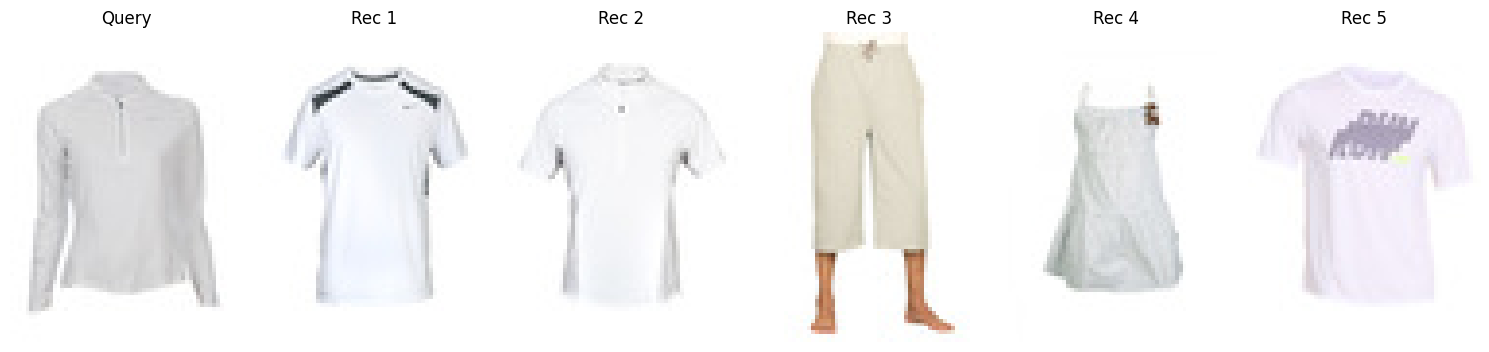

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 5))

# Show query image
plt.subplot(1, 6, 1)
plt.imshow(Image.open('/content/query.jpg'))
plt.title('Query')
plt.axis('off')

# Show recommendations
for i, idx in enumerate(top_indices):
    plt.subplot(1, 6, i+2)
    plt.imshow(Image.open(styles_df.iloc[idx]['image_path']))
    plt.title(f'Rec {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print(styles_df.iloc[top_indices][['productDisplayName', 'masterCategory']])


                              productDisplayName masterCategory
4615     Nike Men's As Walkthrough White T-shirt        Apparel
1521           Nike Men's As Spher White T-shirt        Apparel
2552       Urban Yoga Men Bottom Grey Yoga Pants        Apparel
2125        Doodle Kids Girl Printed White Dress        Apparel
1304  Nike Mens Challenger Graphic White T-shirt        Apparel
